In [52]:
from run_experiment import Experiment
from radar_plots import RadarPlot
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model, single_mtd_simulation, mtd_ai_simulation, multiple_mtd_simulation, specific_multiple_mtd_simulation
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from stacked_plots import StackedBarChart
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [53]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 15000
mtd_interval = [200]
network_size = [150]
total_nodes = 150
new_network = True

trial = 500


mtd_strategies = [
    CompleteTopologyShuffle,
    # HostTopologyShuffle,
    IPShuffle,
    OSDiversity,
    # PortShuffle,
    # OSDiversityAssignment,
    ServiceDiversity,
    # UserShuffle
]

result_head_path = '/Users/williamho/Documents/GitHub/MTDSim'

static_features = ["host_compromise_ratio", "total_number_of_ports", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
metrics = ["all_features"] + static_features + time_features



{'random': {'ASR': 1.4722222222222223, 'time_to_compromise': 1.4603948226782104, 'attack_path_exposure': 0.9348264463432924, 'ROA': 0.9697659132970131, 'risk': 0.9431901373556011}, 'alternative': {'ASR': 1.4583333333333335, 'time_to_compromise': 1.4542807503335515, 'attack_path_exposure': 0.933710809264223, 'ROA': 0.8804550194683819, 'risk': 0.9569099223197343}, 'simultaneous': {'ASR': 2.708333333333334, 'time_to_compromise': 1.7364291794035274, 'attack_path_exposure': 0.9365137503823221, 'ROA': 0.9942248916217096, 'risk': 1.061993912898598}}


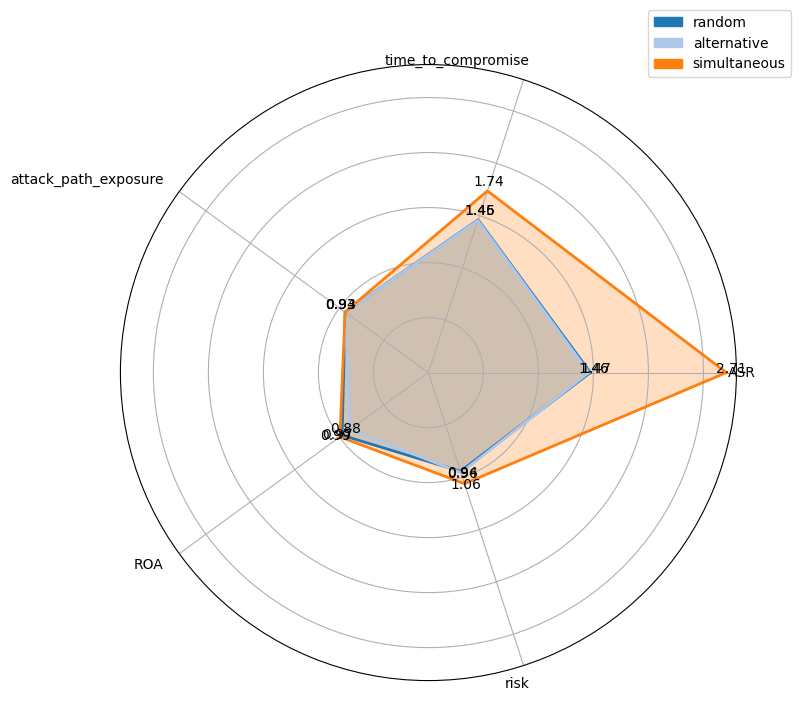

In [54]:
radar = RadarPlot("all_features",epsilon, start_time, finish_time, mtd_interval, network_size,total_nodes, new_network,  "other_scheme", trial, result_head_path)
schemes_data = pd.DataFrame(radar.multiple_scaled_pipeline(["random", "alternative", "simultaneous"],run_trial = False)).T.drop(columns=['MEF', 'host_compromise_ratio','network_size', 'exposed_endpoints',"mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()
print(schemes_data)
radar.plot_n_schemes(schemes_data)

In [55]:
other_schemes =pd.DataFrame(schemes_data)

In [56]:
other_schemes

random  alternative  simultaneous
ASR                   1.472222     1.458333      2.708333
time_to_compromise    1.460395     1.454281      1.736429
attack_path_exposure  0.934826     0.933711      0.936514
ROA                   0.969766     0.880455      0.994225
risk                  0.943190     0.956910      1.061994

In [57]:
import pandas as pd

# Create an empty DataFrame to store all the data for all metrics
all_model_data = pd.DataFrame()

for metric in metrics:
    models = [
        metric,
        f"{metric}_CompleteTopologyShuffle",
        f"{metric}_IPShuffle",
        f"{metric}_OSDiversity",
        f"{metric}_ServiceDiversity"
    ]
    
        
    # Initialize the chart for the current model
    chart = StackedBarChart(metric, epsilon, start_time, finish_time, mtd_interval, network_size, total_nodes, new_network, "overview", trial, result_head_path)
    weights = {'ASR': 1, 'time_to_compromise': 1, 'attack_path_exposure': 1, "ROA": 1, "risk": 1}  # Custom weights
    
    # Get data for current model
    schemes_data = pd.DataFrame(chart.multiple_scaled_pipeline(models, run_trial=False))


    
    
    # Concatenate the current schemes_data to all_model_data along the columns (axis=1)
    if all_model_data.empty:
        all_model_data = schemes_data
    else:
        all_model_data = pd.concat([all_model_data, schemes_data], axis=1)





In [58]:
# Now all_schemes_data contains the concatenated data from all models as columns
all_model_data

all_features  all_features_CompleteTopologyShuffle  \
mtd_interval                   1.000000                              1.000000   
MEF                            1.000000                              1.000000   
ASR                            1.500000                              1.472222   
time_to_compromise             1.536778                              1.475282   
host_compromise_ratio          0.847826                              0.847826   
network_size                   1.000000                              1.000000   
total_number_of_ports       1048.000000                           1050.000000   
attack_path_exposure           2.448235                              2.206705   
ROA                            1.159555                              1.048409   
risk                           1.034602                              0.991688   
shortest_path_variability      1.000000                              1.000000   
exposed_endpoints                   NaN                                   NaN   

                           all_features_IPShuffle  all_features_OSDiversity  \
mtd_interval                             1.000000                  1.000000   
MEF                                      1.000000                  1.000000   
ASR                                      1.583333                  1.500000   
time_to_compromise                       1.496946                  1.702592   
host_compromise_ratio                    0.847826                  0.847826   
network_size                             1.000000                  1.000000   
total_number_of_ports                 1049.000000               1051.000000   
attack_path_exposure                     1.904885                  2.693952   
ROA                                      1.168224                  1.126862   
risk                                     1.133469                  1.072817   
shortest_path_variability                1.000000                  1.000000   
exposed_endpoints                             NaN                       NaN   

                           all_features_ServiceDiversity  \
mtd_interval                                    1.000000   
MEF                                             1.000000   
ASR                                             1.500000   
time_to_compromise                              1.629319   
host_compromise_ratio                           0.847826   
network_size                                    1.000000   
total_number_of_ports                        1051.000000   
attack_path_exposure                            2.615209   
ROA                                             1.176116   
risk                                            1.090969   
shortest_path_variability                       1.000000   
exposed_endpoints                                    NaN   

                           host_compromise_ratio  \
mtd_interval                            1.000000   
MEF                                     1.000000   
ASR                                     1.527778   
time_to_compromise                      1.535351   
host_compromise_ratio                   0.847826   
network_size                            1.000000   
total_number_of_ports                        NaN   
attack_path_exposure                    2.460476   
ROA                                     1.156150   
risk                                    1.041980   
shortest_path_variability               1.000000   
exposed_endpoints                       1.000000   

                           host_compromise_ratio_CompleteTopologyShuffle  \
mtd_interval                                                    1.000000   
MEF                                                             1.000000   
ASR                                                             1.472222   
time_to_compromise                                              1.473507   
host_compromise_ratio                                           0.847826   
network_size                   

In [59]:
x_values = []
y_values = []
for metric in all_model_data.columns:
     # Check if the metric is "all_features"
    if metric == "all_features":
        model = "all_features"  # You can set the model name explicitly

    else:
        # Split the metric and join back if it is not in metrics
        model = "_".join(metric.split("_")[:-1]) if metric not in metrics else metric
    
   
    
    radar = RadarPlot(model, epsilon, start_time, finish_time, mtd_interval, network_size, total_nodes, new_network,  "other_scheme", trial, result_head_path)
    metric_data = radar.get_result(result_head_path, metric)
    
    print(metric, metric_data['MEF'].mean())
    x_values.append(metric)
    y_values.append(metric_data['MEF'].mean())


all_features 0.005058464008294251
all_features_CompleteTopologyShuffle 0.005037539663138434
all_features_IPShuffle 0.0050344233804002
all_features_OSDiversity 0.005067841158973668
all_features_ServiceDiversity 0.005076693274725651
host_compromise_ratio 0.005057795237792126
host_compromise_ratio_CompleteTopologyShuffle 0.005037711354231219
host_compromise_ratio_IPShuffle 0.0050339505813344985
host_compromise_ratio_OSDiversity 0.005067850641283683
host_compromise_ratio_ServiceDiversity 0.005076353875072051
total_number_of_ports 0.005057720359922268
total_number_of_ports_CompleteTopologyShuffle 0.005037644131965311
total_number_of_ports_IPShuffle 0.005034089870377813
total_number_of_ports_OSDiversity 0.005067489549839098
total_number_of_ports_ServiceDiversity 0.005076921631133407
attack_path_exposure 0.005057675303895956
attack_path_exposure_CompleteTopologyShuffle 0.005037676583023674
attack_path_exposure_IPShuffle 0.005033813286089999
attack_path_exposure_OSDiversity 0.00506730400938384

In [118]:
mtd_feq_data = pd.DataFrame((zip(x_values, y_values)))
mtd_feq_data.set_index(0, inplace=True)

In [119]:
import pandas as pd

def group_by_feature(df):
    # Initialize dictionaries to store median and standard deviation DataFrames
    medians = {}
    std_devs = {}

    for metric in metrics:
        # Find columns that contain the current metric as a substring
        related_columns = [col for col in df.columns if metric in col]
        # print(related_columns)
        if related_columns:
            # Calculate the median for each related column
            median_df = df[related_columns].median(axis=1)
            # print(median_df)
            medians[metric] = median_df

            # Calculate the standard deviation for each related column
            std_dev_df = df[related_columns].std(axis=1)
            std_devs[metric] = std_dev_df
    
    # Convert the results into DataFrames for better visualization
    medians_df = pd.DataFrame(medians)
    std_devs_df = pd.DataFrame(std_devs)

    return medians_df, std_devs_df

# Group by feature prefix and calculate the median and standard deviation
medians_df, std_devs_df = group_by_feature(mtd_feq_data.T)


<Axes: >

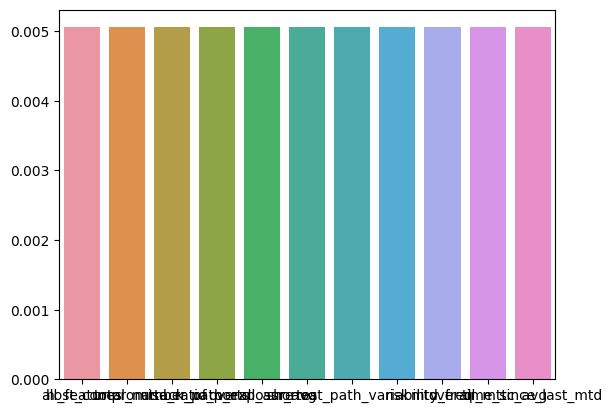

In [121]:
sns.barplot(medians_df)

In [60]:
import seaborn as sns

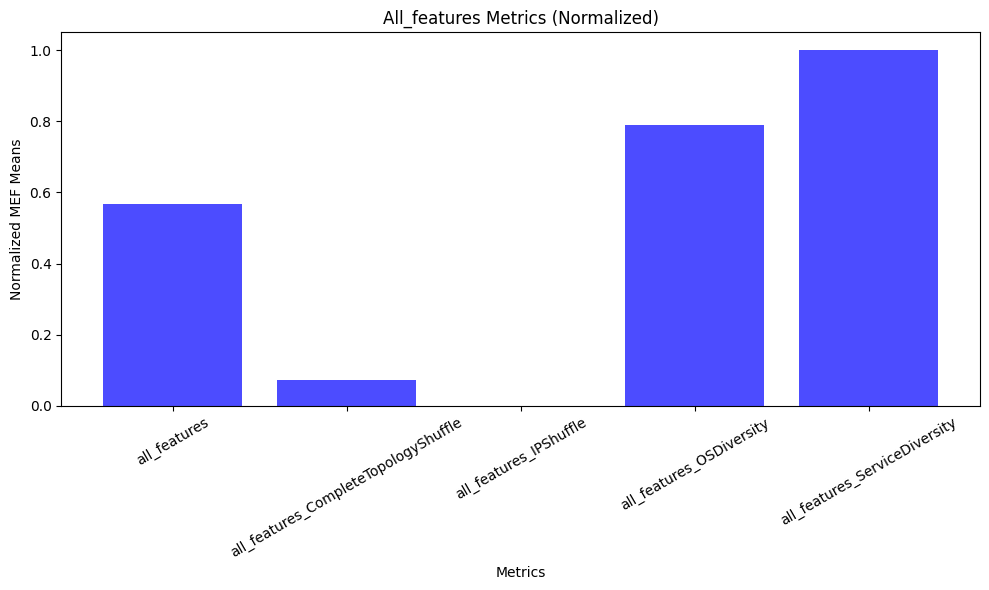

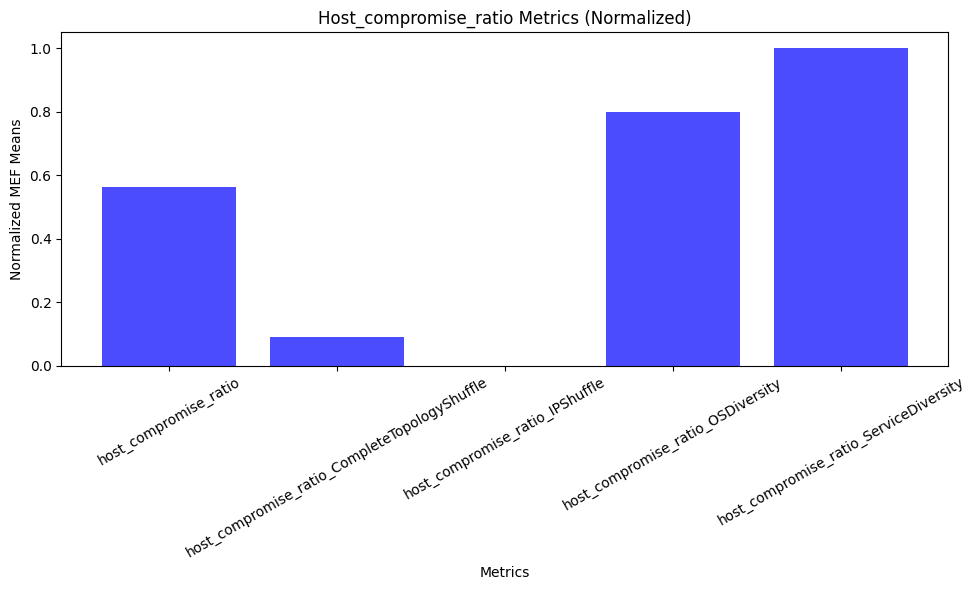

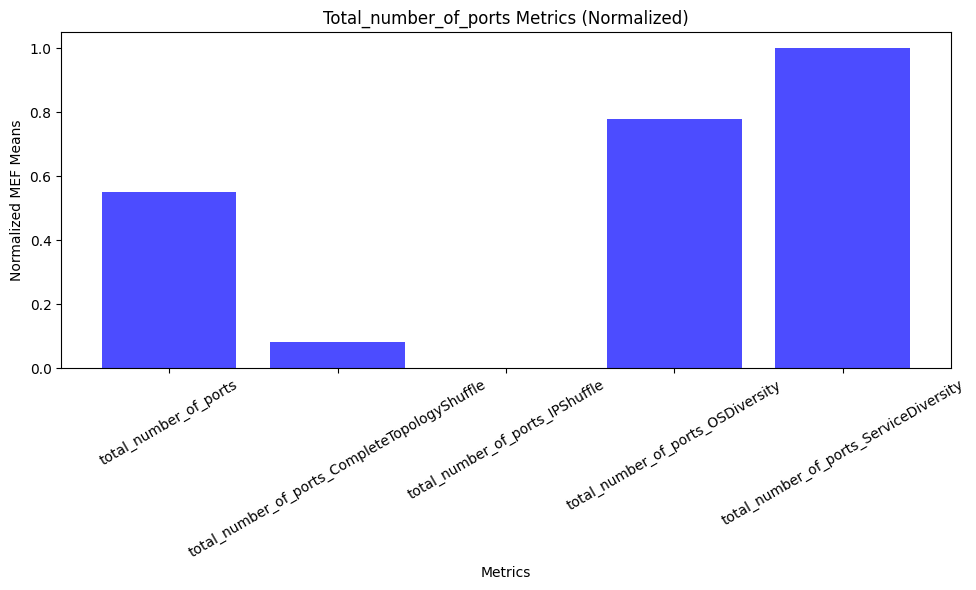

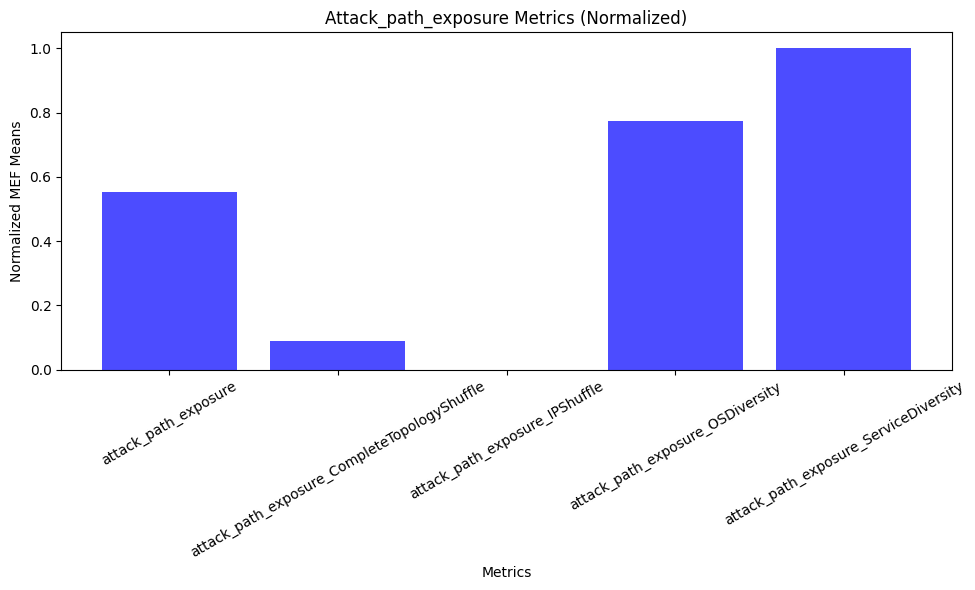

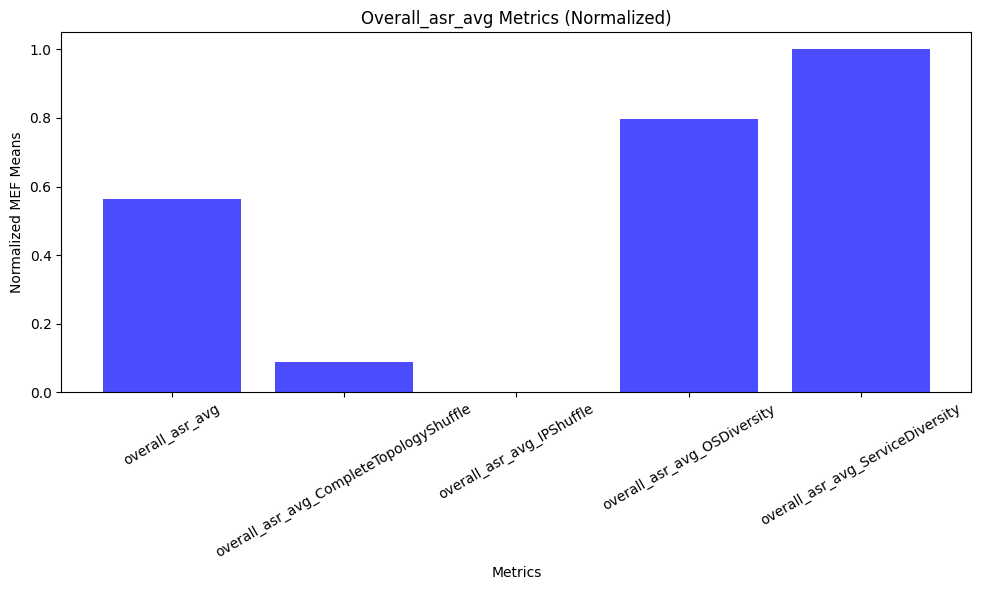

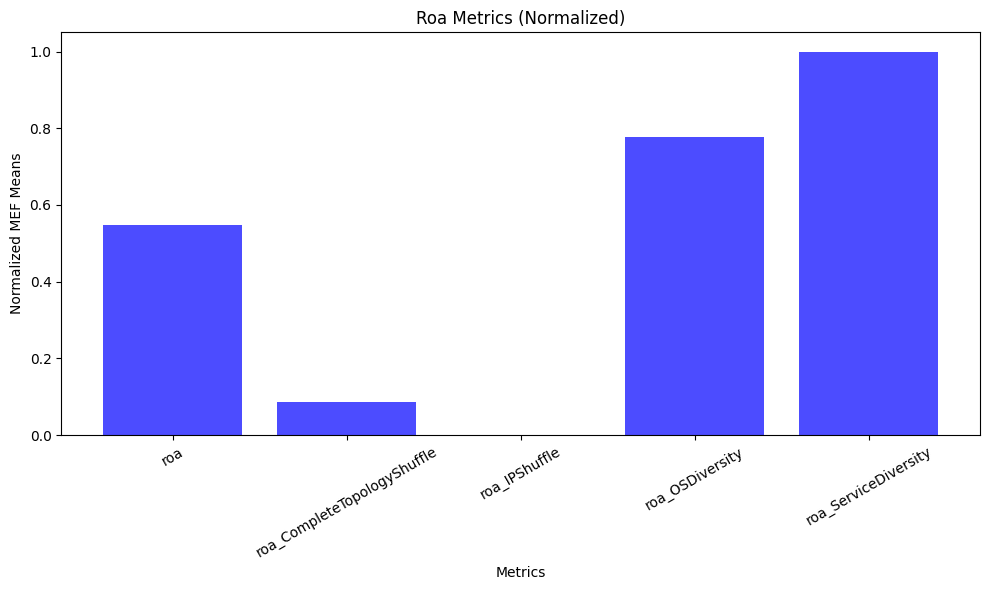

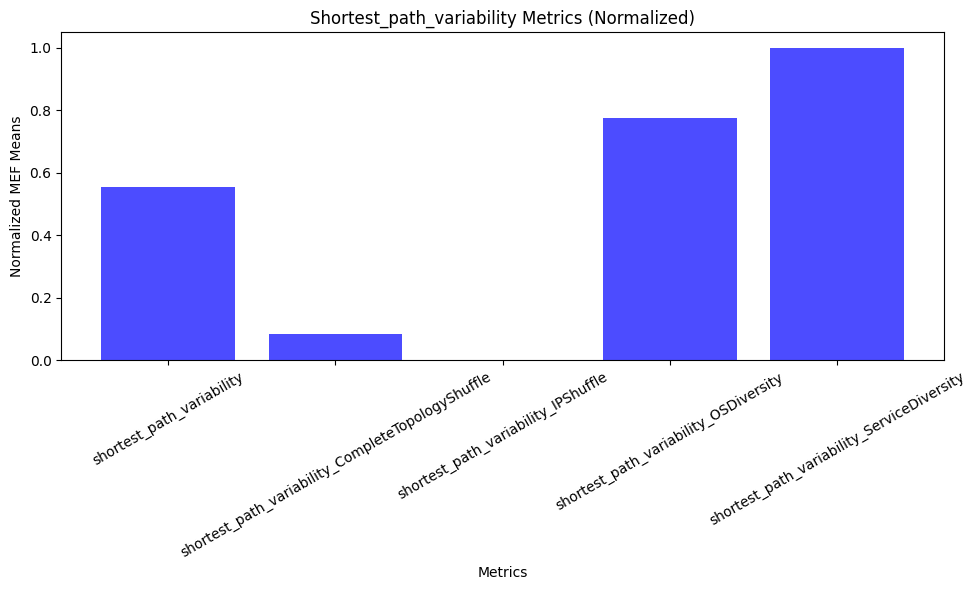

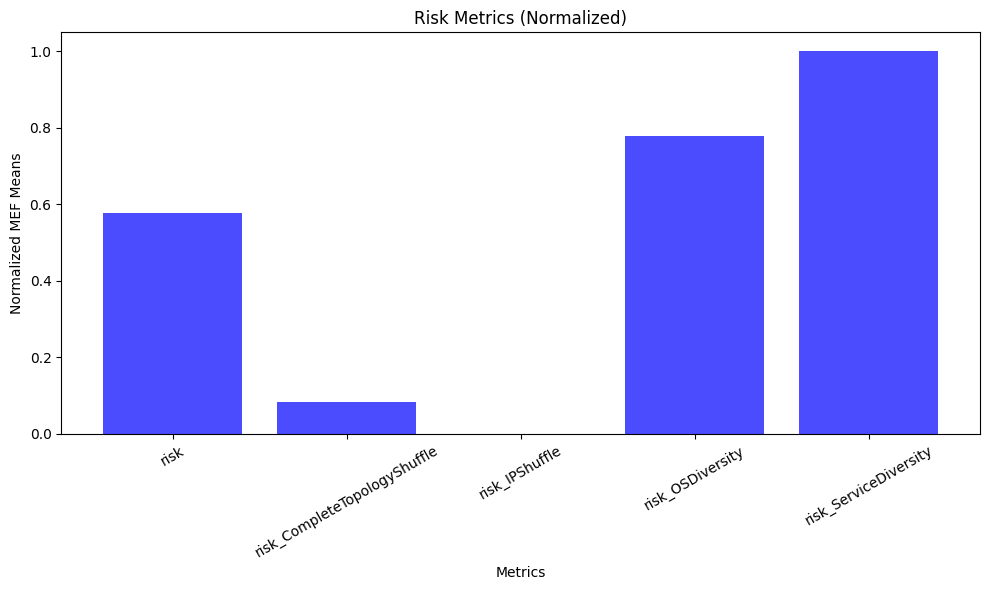

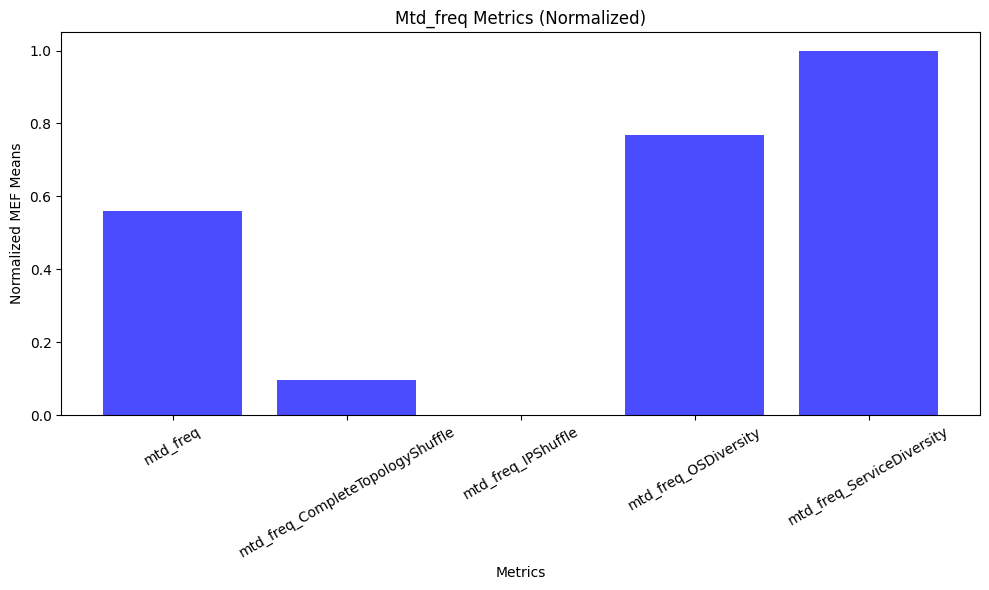

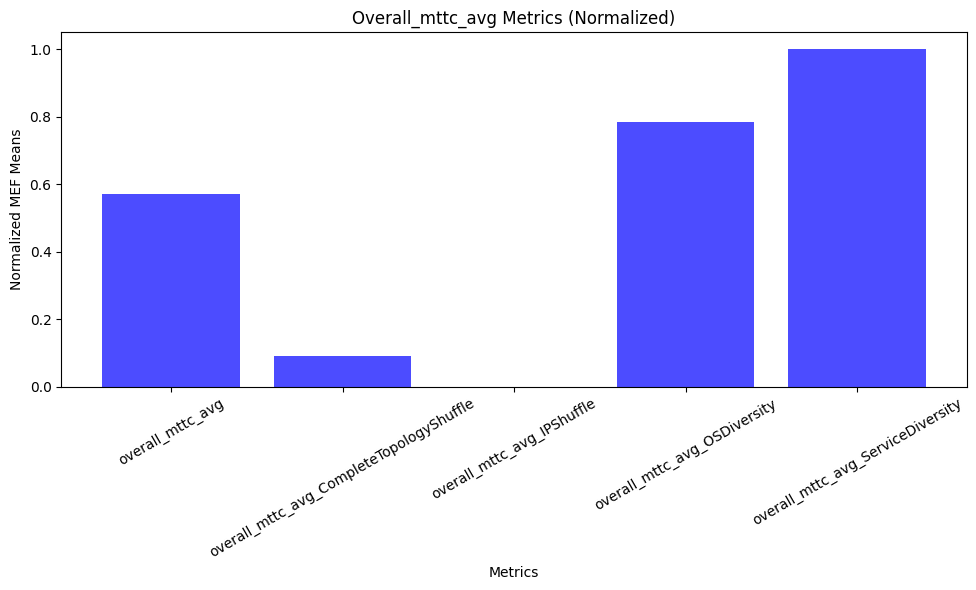

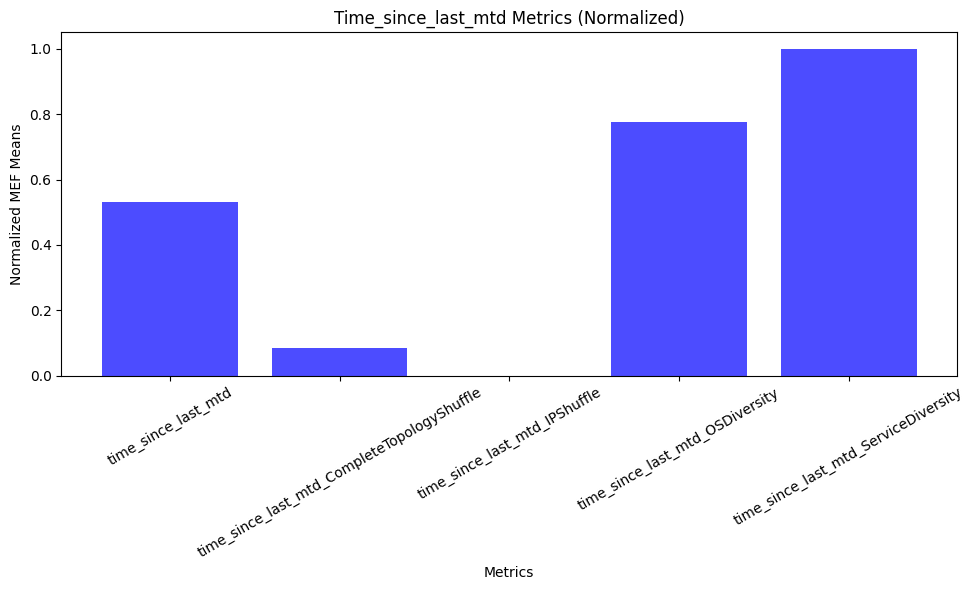

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Define the categories
static_features = ["host_compromise_ratio", "total_number_of_ports", "attack_path_exposure", "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
all_features = ["all_features"]
metrics = all_features + static_features + time_features

# Categorize the x and y values based on individual metrics
feature_categories = {feature: [] for feature in metrics}

for x, y in zip(x_values, y_values):
    for feature in metrics:
        if feature in x:
            feature_categories[feature].append((x, y))
            break

# Normalize the y-values for each feature
normalized_feature_categories = {}
for feature, data in feature_categories.items():
    y_vals = [item[1] for item in data]
    if y_vals:  # Check if there are values to normalize
        max_val = max(y_vals)
        min_val = min(y_vals)
        normalized_y_vals = [(y - min_val) / (max_val - min_val) if max_val > min_val else 0 for y in y_vals]
        normalized_feature_categories[feature] = [(item[0], norm_y) for item, norm_y in zip(data, normalized_y_vals)]
    else:
        normalized_feature_categories[feature] = []

# Plot for each feature in separate plots
for feature, data in normalized_feature_categories.items():
    if data:  # Only plot if there is data
        x_vals = [item[0] for item in data]
        y_vals = [item[1] for item in data]
        
        plt.figure(figsize=(10, 6))
        plt.bar(x_vals, y_vals, color='b', alpha=0.7)
        plt.title(f"{feature.capitalize()} Metrics (Normalized)")
        plt.ylabel("Normalized MEF Means")
        plt.xticks(rotation=30)
        plt.xlabel("Metrics")
        plt.tight_layout()
        
        # Show the plot for the current feature
        plt.show()


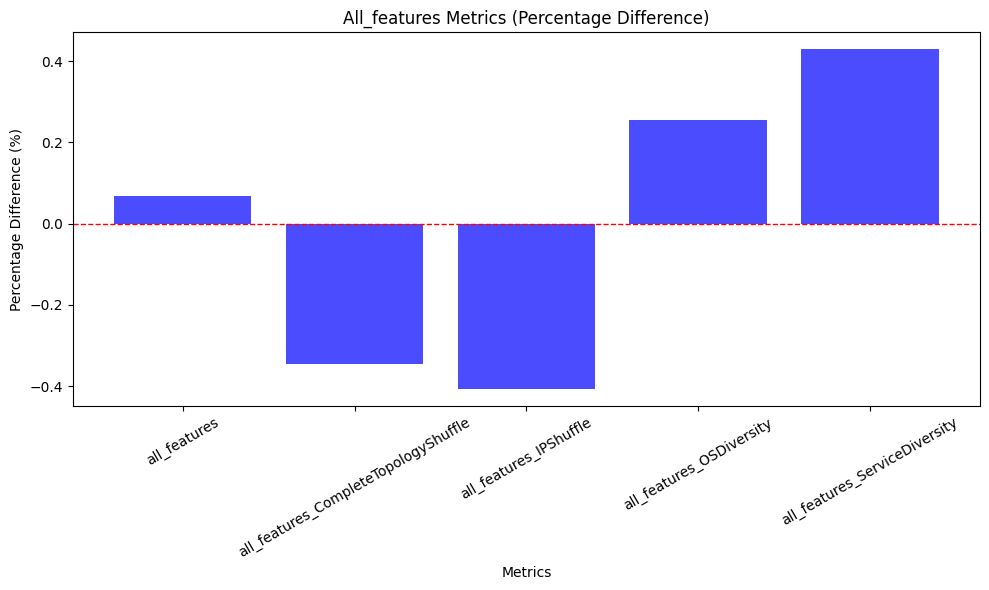

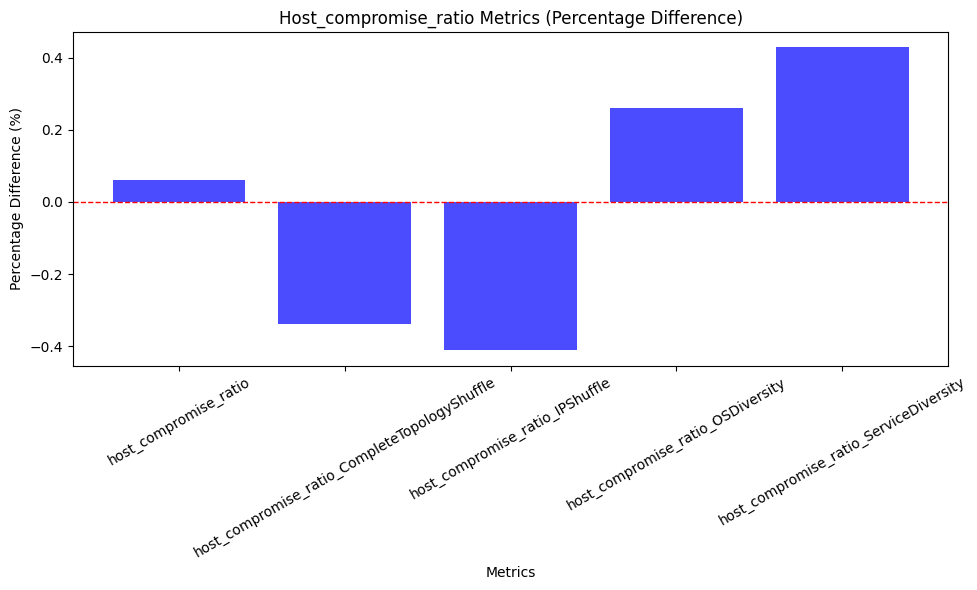

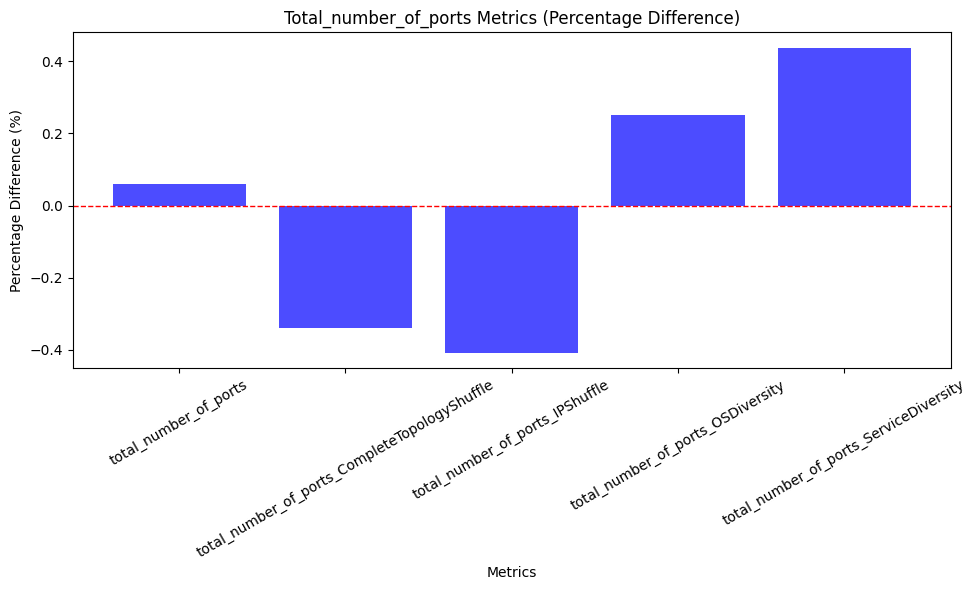

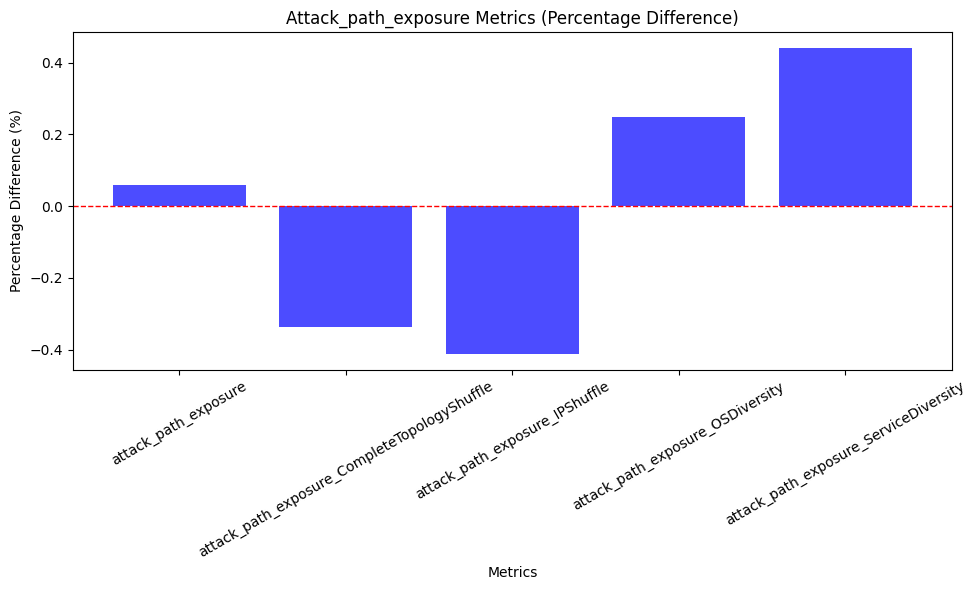

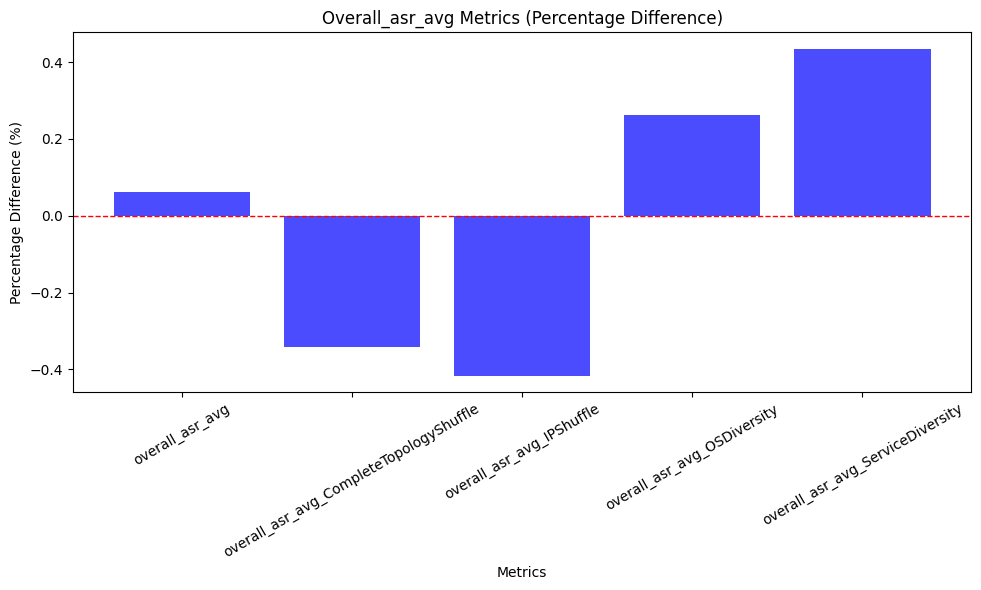

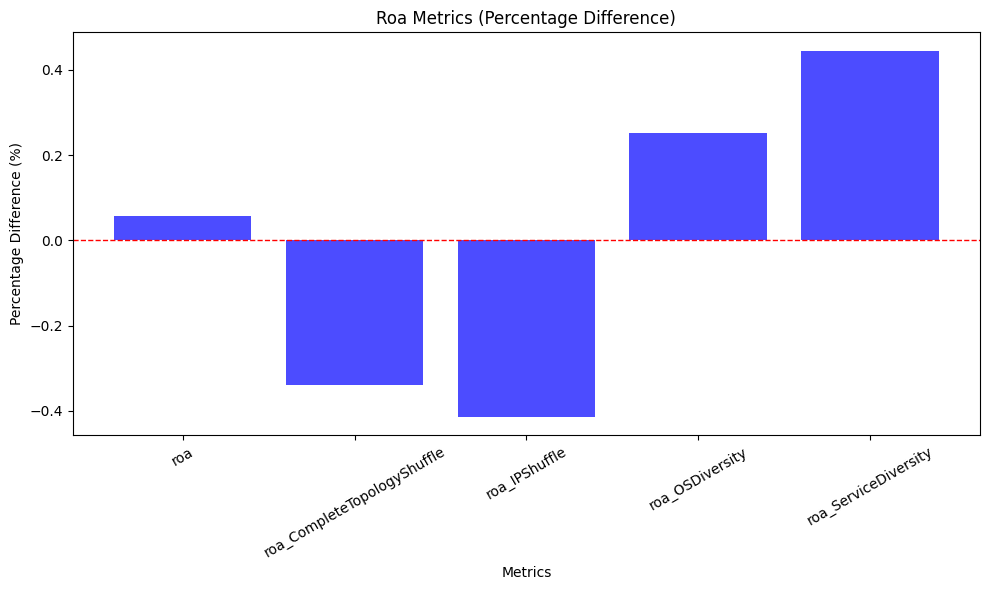

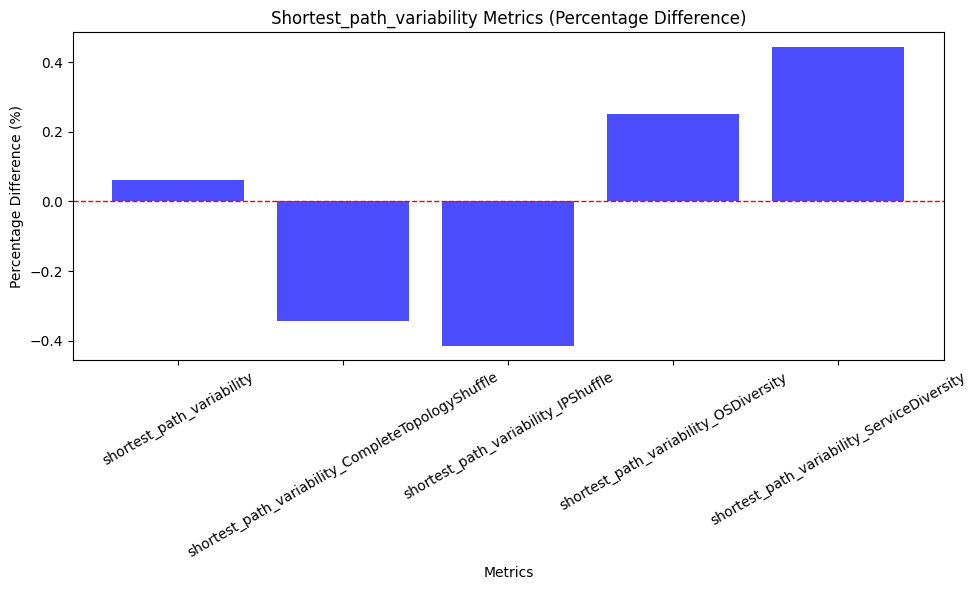

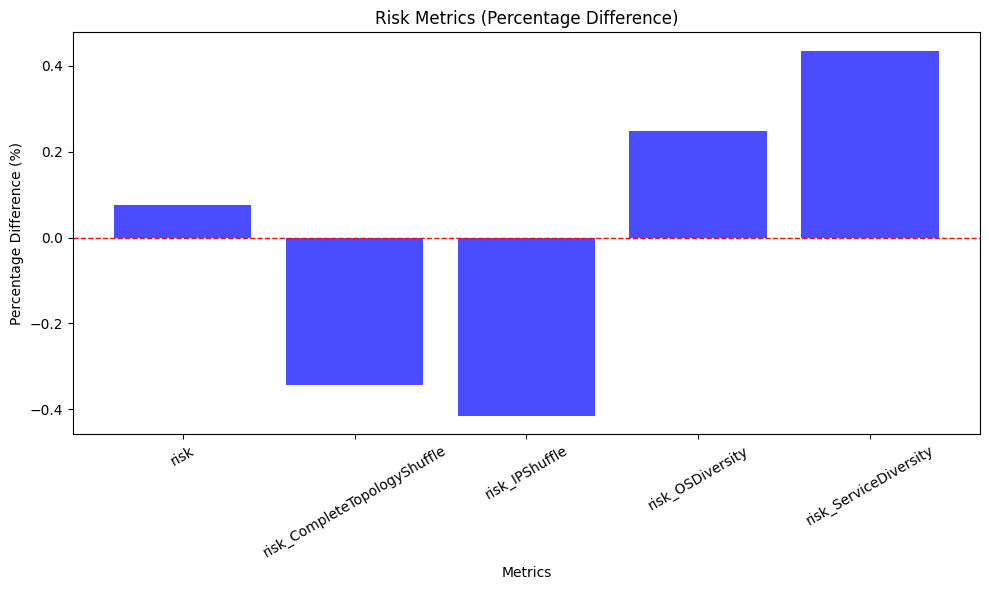

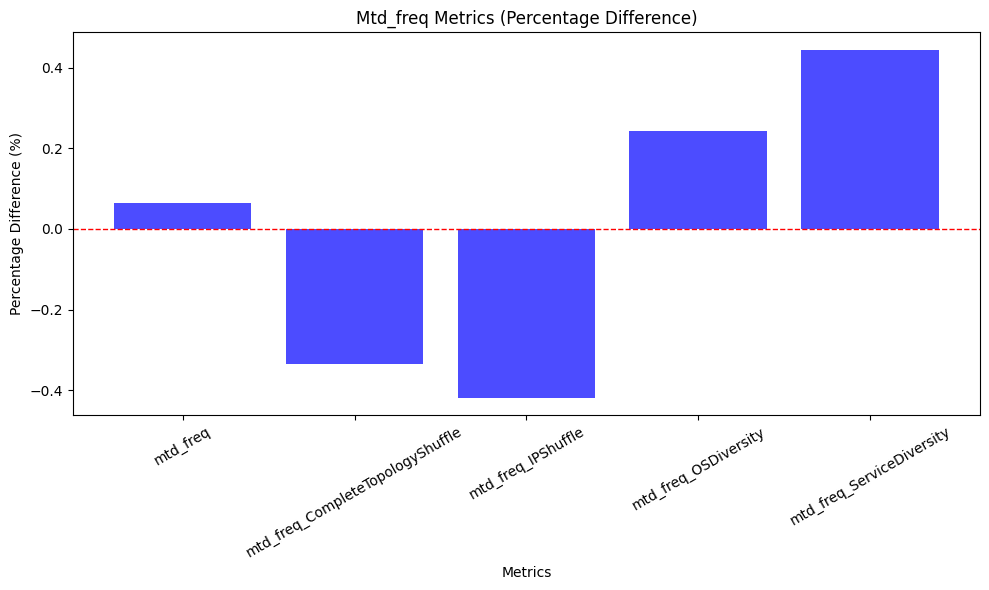

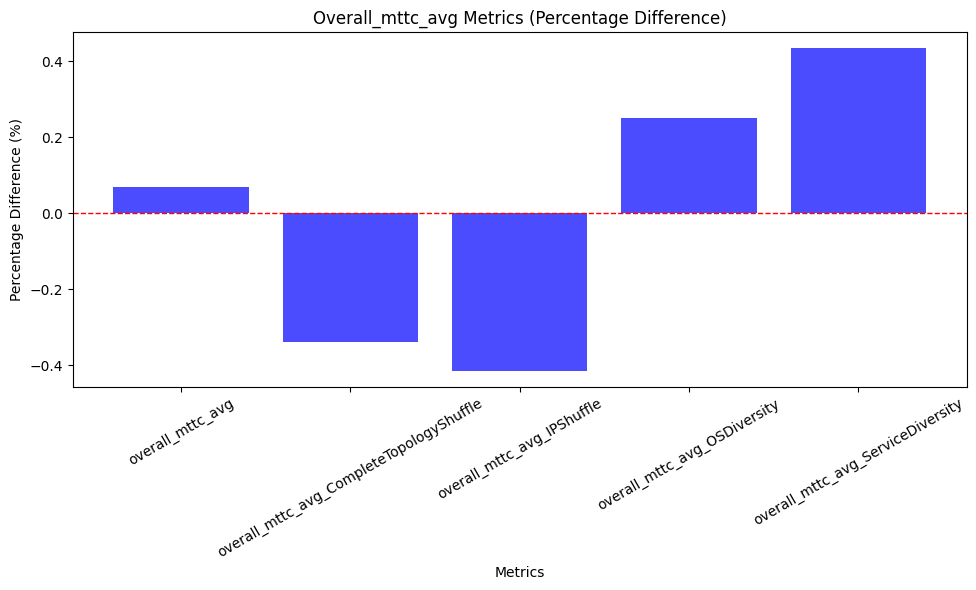

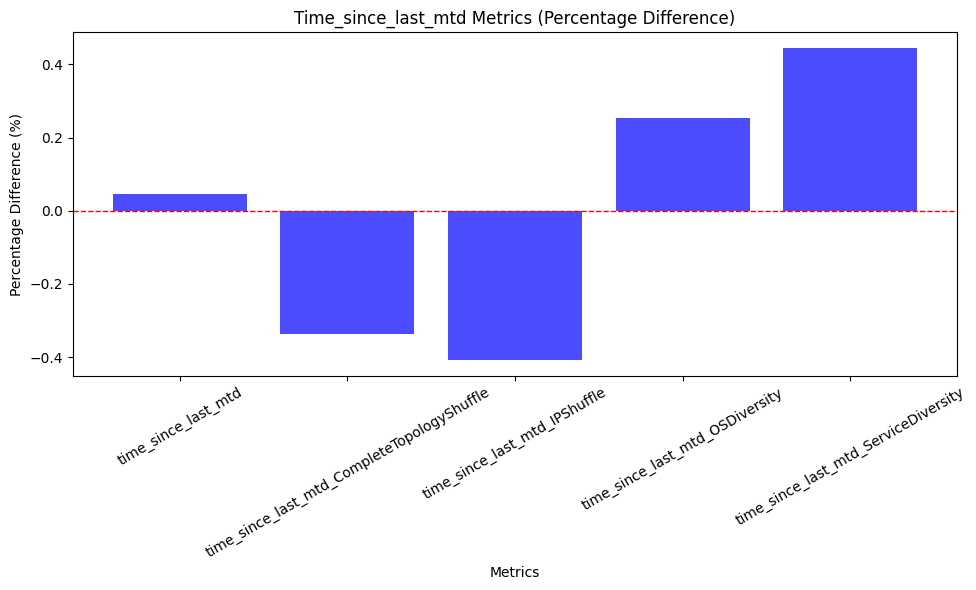

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Define the categories
static_features = ["host_compromise_ratio", "total_number_of_ports", "attack_path_exposure", "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
all_features = ["all_features"]
metrics = all_features + static_features + time_features

# Categorize the x and y values based on individual metrics
feature_categories = {feature: [] for feature in metrics}

for x, y in zip(x_values, y_values):
    for feature in metrics:
        if feature in x:
            feature_categories[feature].append((x, y))
            break

# Calculate percentage difference from the baseline for each feature
percentage_diff_categories = {}
for feature, data in feature_categories.items():
    y_vals = [item[1] for item in data]
    if y_vals:  # Check if there are values to calculate percentage differences
        baseline = np.mean(y_vals)  # You can change this to np.median(y_vals) if preferred
        percentage_diffs = [(y - baseline) / baseline * 100 if baseline != 0 else 0 for y in y_vals]
        percentage_diff_categories[feature] = [(item[0], perc_diff) for item, perc_diff in zip(data, percentage_diffs)]
    else:
        percentage_diff_categories[feature] = []

# Plot for each feature in separate plots using percentage differences
for feature, data in percentage_diff_categories.items():
    if data:  # Only plot if there is data
        x_vals = [item[0] for item in data]
        perc_diffs = [item[1] for item in data]
        
        plt.figure(figsize=(10, 6))
        plt.bar(x_vals, perc_diffs, color='b', alpha=0.7)
        plt.title(f"{feature.capitalize()} Metrics (Percentage Difference)")
        plt.ylabel("Percentage Difference (%)")
        plt.axhline(0, color='red', linewidth=1, linestyle='--')  # Add a horizontal line at 0
        plt.xticks(rotation=30)
        plt.xlabel("Metrics")
        plt.tight_layout()
        
        # Show the plot for the current feature
        plt.show()


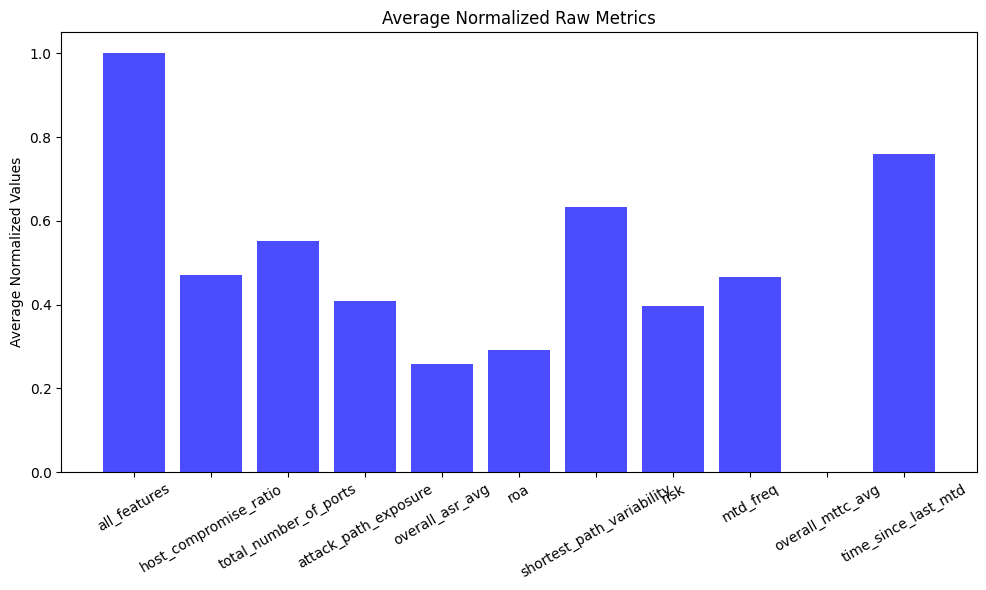

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Define the categories
static_features = ["host_compromise_ratio", "total_number_of_ports", "attack_path_exposure", "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
all_features = ["all_features"]
metrics = all_features + static_features + time_features


# Categorize the x and y values based on individual metrics
feature_categories = {feature: [] for feature in metrics}

for x, y in zip(x_values, y_values):
    for feature in metrics:
        if feature in x:
            feature_categories[feature].append((x, y))
            break

# Calculate the average raw values for each feature
average_raw_values = {}
for feature, data in feature_categories.items():
    y_vals = [item[1] for item in data]
    if y_vals:  # Check if there are values to average
        average_raw_values[feature] = np.mean(y_vals)

# Normalize the average raw values
if average_raw_values:  # Check if there are average values to normalize
    max_avg = max(average_raw_values.values())
    min_avg = min(average_raw_values.values())
    normalized_average_values = {
        feature: (avg - min_avg) / (max_avg - min_avg) if max_avg > min_avg else 0
        for feature, avg in average_raw_values.items()
    }
else:
    normalized_average_values = {}

# Prepare data for plotting
x_vals = list(normalized_average_values.keys())
y_vals = list(normalized_average_values.values())

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x_vals, y_vals, color='b', alpha=0.7)
plt.title("Average Normalized Raw Metrics")
plt.ylabel("Average Normalized Values")
plt.xticks(rotation=30)
plt.tight_layout()

# Show the plot
plt.show()


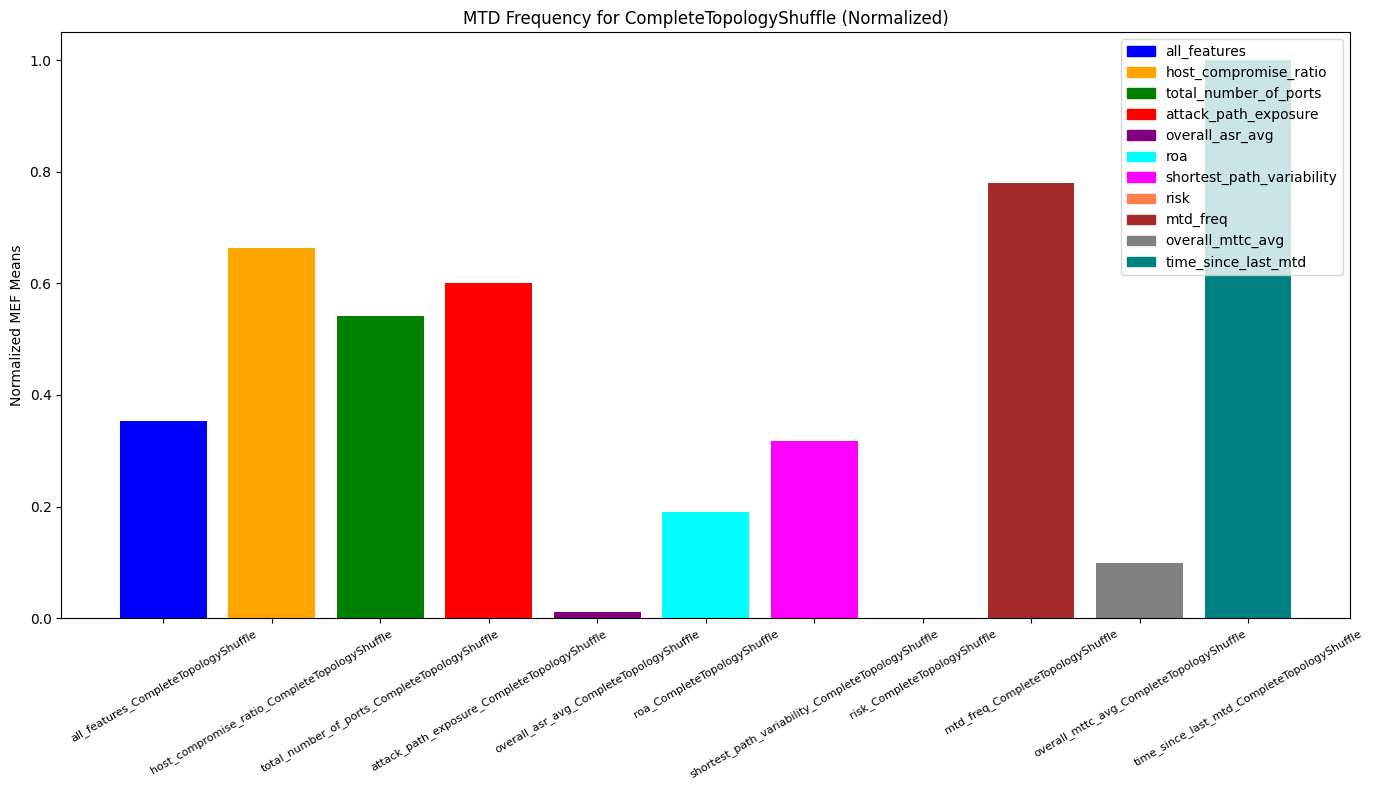

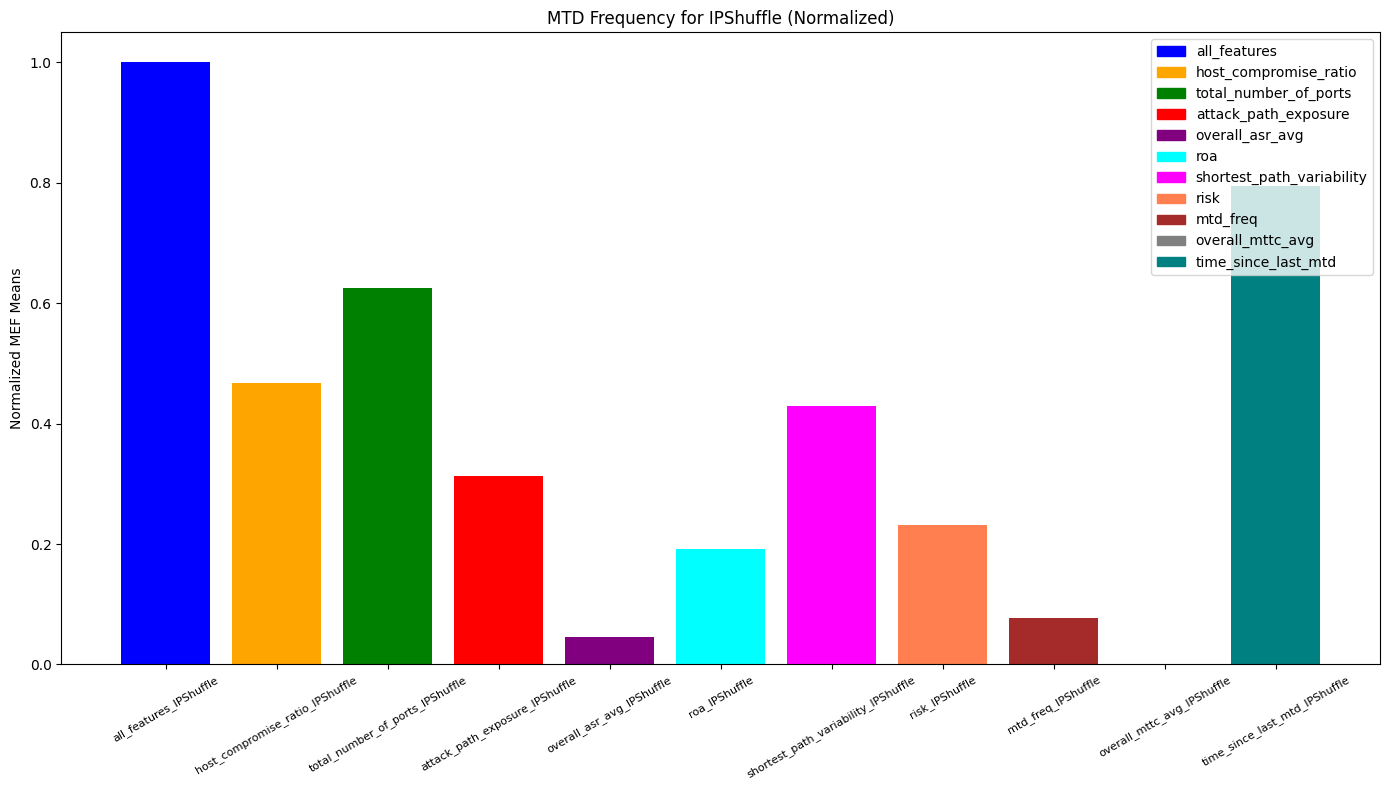

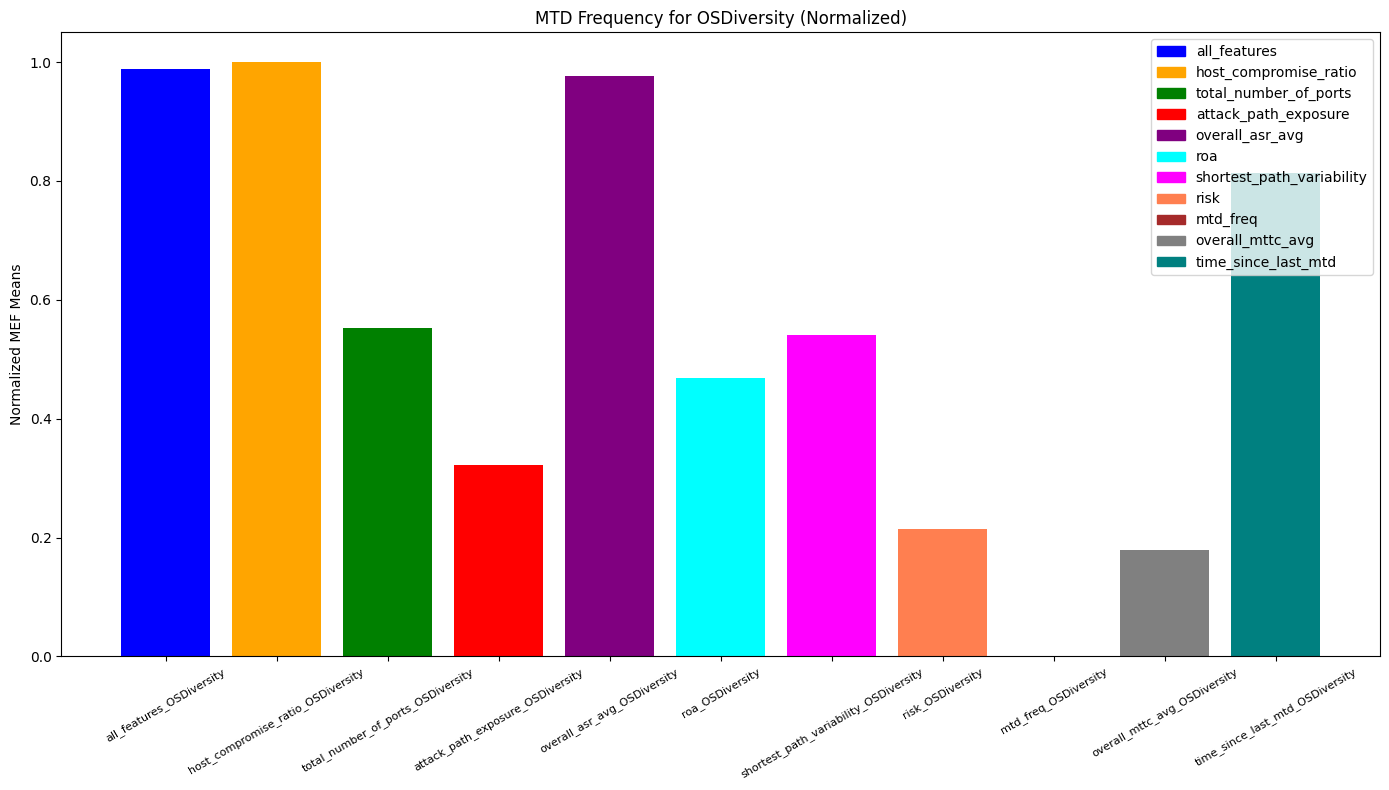

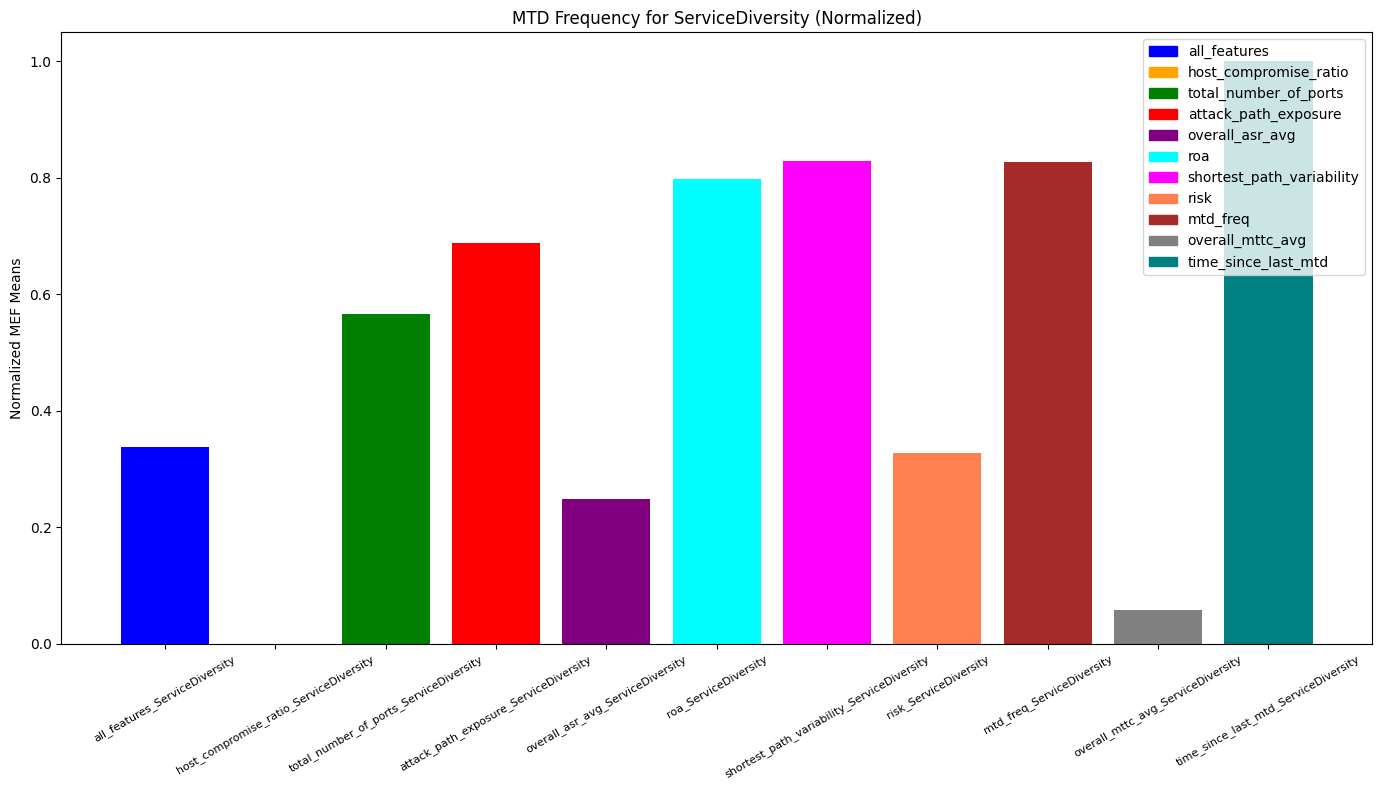

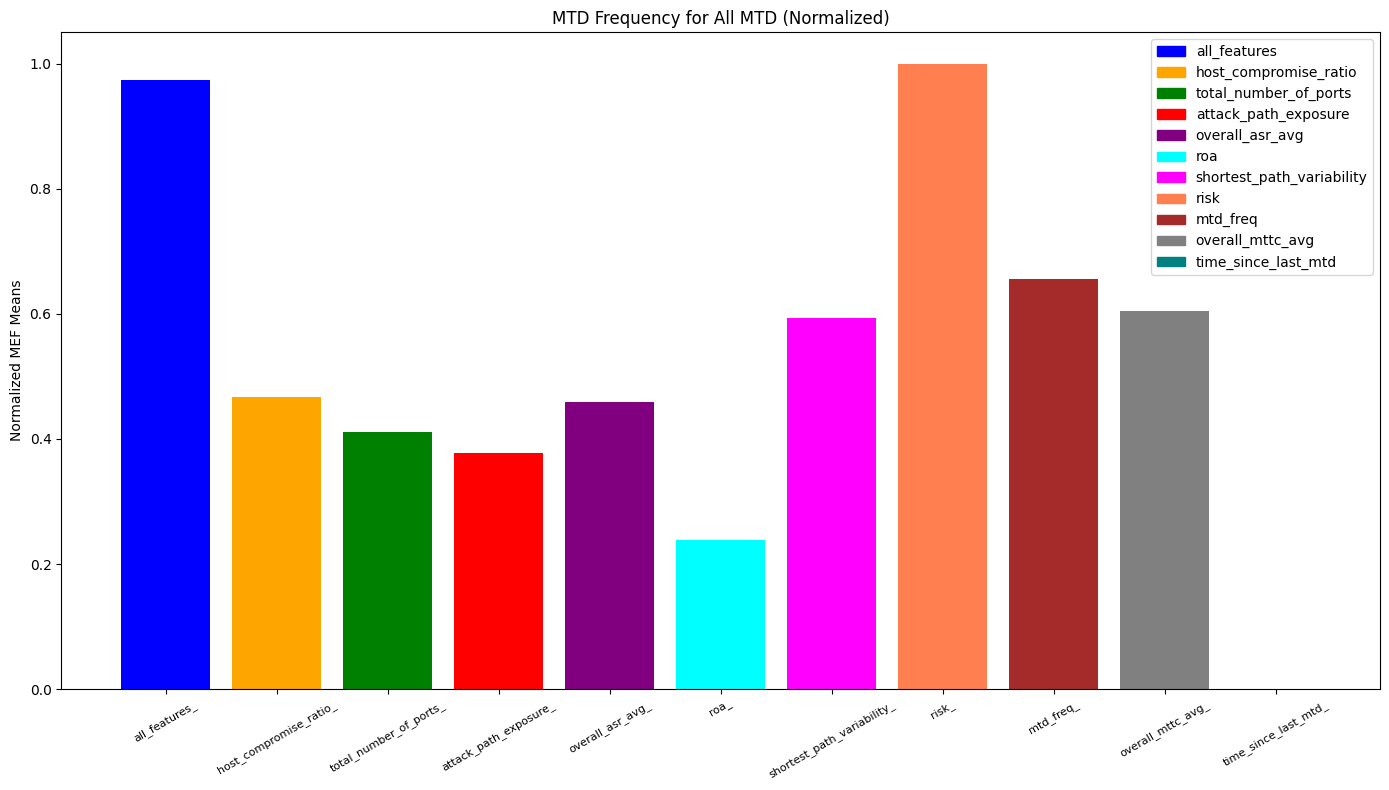

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Define the categories
mtd_types = ["CompleteTopologyShuffle", "IPShuffle", "OSDiversity", "ServiceDiversity", ""]
static_features = ["host_compromise_ratio", "total_number_of_ports", "attack_path_exposure", "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
all_features = ["all_features"]
metrics = all_features + static_features + time_features

# Define colors for each metric
metric_colors = {
    "all_features": "blue",
    "host_compromise_ratio": "orange",
    "total_number_of_ports": "green",
    "attack_path_exposure": "red",
    "overall_asr_avg": "purple",
    "roa": "cyan",
    "shortest_path_variability": "magenta",
    "risk": "#FF7F50",
    "mtd_freq": "brown",
    "overall_mttc_avg": "grey",
    "time_since_last_mtd": "teal"
}

# Categorize the x and y values based on MTD techniques
mtd_categories = {mtd: [] for mtd in mtd_types}

for x, y in zip(x_values, y_values):
    for mtd in mtd_types:
        if mtd in x:
            mtd_categories[mtd].append(y)
            break

# Normalize the y-values for each MTD technique
normalized_mtd_categories = {}
for mtd, y_vals in mtd_categories.items():
    if y_vals:  # Check if there are values to normalize
        max_val = max(y_vals)
        min_val = min(y_vals)
        normalized_y_vals = [(y - min_val) / (max_val - min_val) if max_val > min_val else 0 for y in y_vals]
        normalized_mtd_categories[mtd] = normalized_y_vals
    else:
        normalized_mtd_categories[mtd] = []

# Prepare for plotting the normalized MEF means by MTD technique
for mtd, y_vals in normalized_mtd_categories.items():
    if y_vals:  # Only plot if there is data
        # Create x-axis labels for each metric combined with the MTD technique
        x_vals = [f"{metric}_{mtd}" for metric in metrics]
        
        plt.figure(figsize=(14, 8))
        
        # Assign colors to each bar based on substring matching
        bar_colors = []
        for metric in x_vals:
            # Find a color based on substring matching
            color_found = False
            for key, color in metric_colors.items():
                if key in metric:  # Match by substring in the whole metric
                    bar_colors.append(color)
                    color_found = True
                    break
            if not color_found:
                bar_colors.append("black")  # Default color if no match found

        bars = plt.bar(x_vals, y_vals, color=bar_colors)

        # Correctly format the title for empty mtd case
        mtd_title = mtd if mtd else "All MTD"
        plt.title(f"MTD Frequency for {mtd_title} (Normalized)")
        plt.ylabel("Normalized MEF Means")
        plt.xticks(rotation=30, fontsize=8)  # Make x-labels smaller
        # plt.xlabel("Metrics")
        plt.tight_layout()

        # Create a legend indicating the metric for the current MTD technique
        handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in metric_colors.values()]
        plt.legend(handles, metric_colors.keys(), loc='upper right')  # Legend for metrics
        
        # Save the plot as a PNG file
        plt.savefig(f"MTD_Frequency_{mtd_title}.png")
        
        # Show the plot for the current MTD technique
        plt.show()


In [65]:
list(zip(x_values, y_values))

[('all_features', 0.005058464008294251),
 ('all_features_CompleteTopologyShuffle', 0.005037539663138434),
 ('all_features_IPShuffle', 0.0050344233804002),
 ('all_features_OSDiversity', 0.005067841158973668),
 ('all_features_ServiceDiversity', 0.005076693274725651),
 ('host_compromise_ratio', 0.005057795237792126),
 ('host_compromise_ratio_CompleteTopologyShuffle', 0.005037711354231219),
 ('host_compromise_ratio_IPShuffle', 0.0050339505813344985),
 ('host_compromise_ratio_OSDiversity', 0.005067850641283683),
 ('host_compromise_ratio_ServiceDiversity', 0.005076353875072051),
 ('total_number_of_ports', 0.005057720359922268),
 ('total_number_of_ports_CompleteTopologyShuffle', 0.005037644131965311),
 ('total_number_of_ports_IPShuffle', 0.005034089870377813),
 ('total_number_of_ports_OSDiversity', 0.005067489549839098),
 ('total_number_of_ports_ServiceDiversity', 0.005076921631133407),
 ('attack_path_exposure', 0.005057675303895956),
 ('attack_path_exposure_CompleteTopologyShuffle', 0.005037

In [66]:
data = all_model_data.T.drop(columns=['MEF', 'host_compromise_ratio', 'network_size', 'exposed_endpoints', "total_number_of_ports","mtd_interval", 'shortest_path_variability'], axis = 1).T.to_dict()

In [67]:
chart.process_weighted_metrics(other_schemes)

ASR  time_to_compromise  attack_path_exposure       ROA  \
random        1.472222            1.460395              0.934826  0.969766   
alternative   1.458333            1.454281              0.933711  0.880455   
simultaneous  2.708333            1.736429              0.936514  0.994225   

                  risk       sum    zscore    minmax  
random        0.943190  5.780400 -0.527605  0.055143  
alternative   0.956910  5.683690 -0.625705  0.000000  
simultaneous  1.061994  7.437495  1.153311  1.000000

Standard deviation for each metric:
ASR                     0.717712
time_to_compromise      0.161162
attack_path_exposure    0.001411
ROA                     0.059886
risk                    0.064994
dtype: float64

Overall 'sum' standard deviation: 0.99



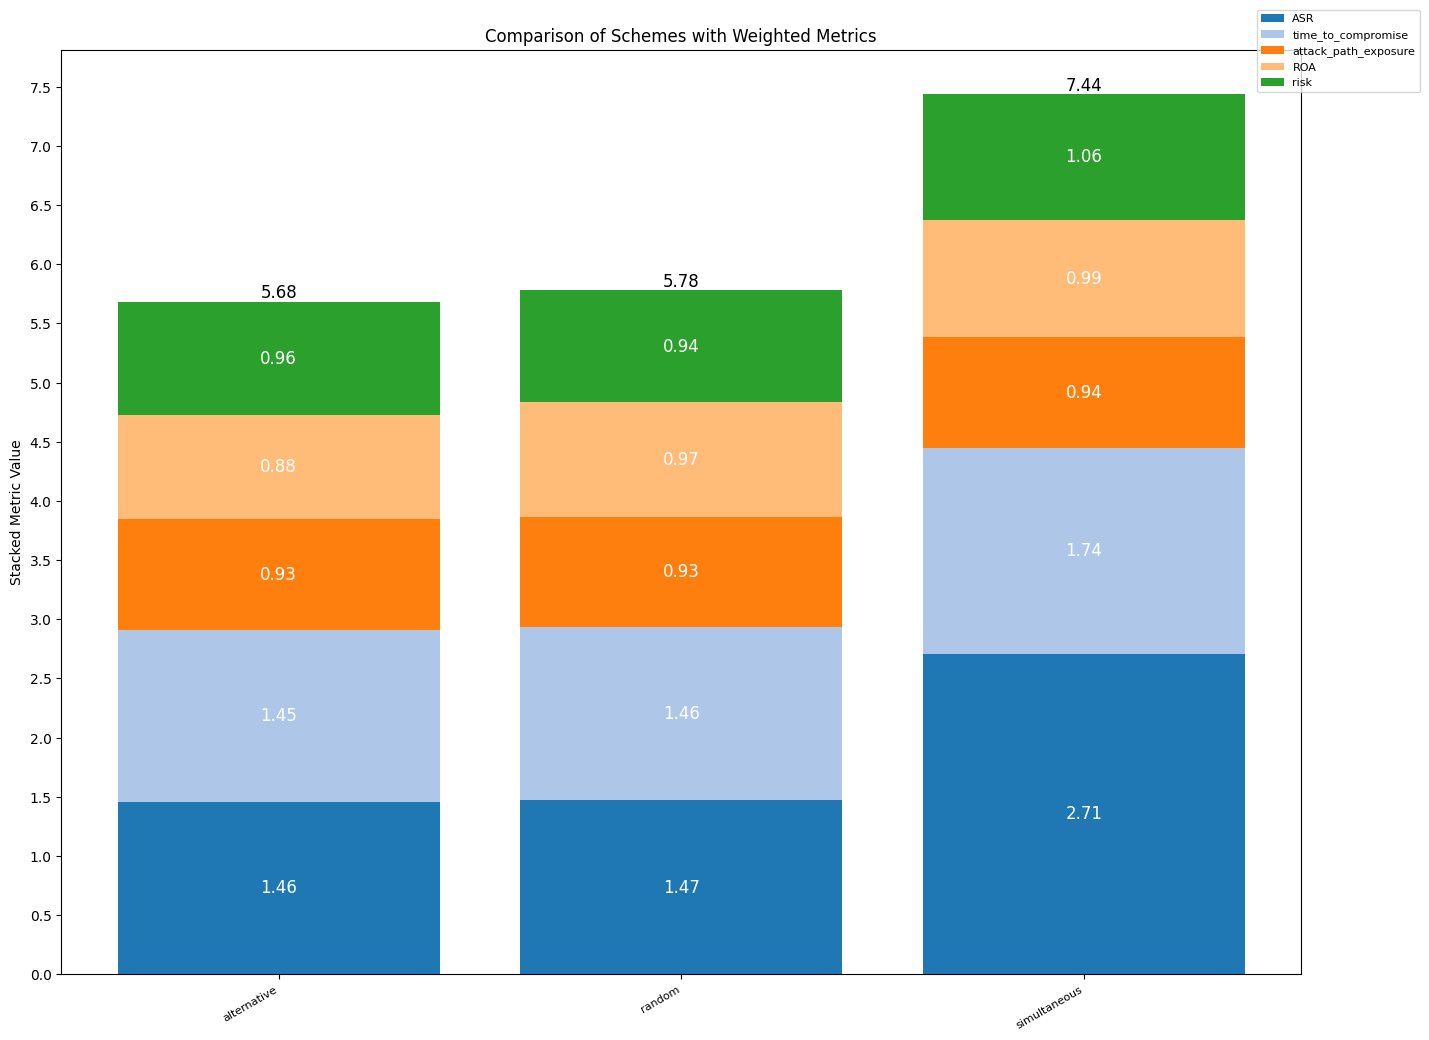

In [68]:
chart.plot_n_schemes()

In [69]:
combined_data = pd.concat([pd.DataFrame(data), other_schemes], axis=1)
chart.process_weighted_metrics(data)

ASR  \
all_features                                       1.500000   
all_features_CompleteTopologyShuffle               1.472222   
all_features_IPShuffle                             1.583333   
all_features_OSDiversity                           1.500000   
all_features_ServiceDiversity                      1.500000   
host_compromise_ratio                              1.527778   
host_compromise_ratio_CompleteTopologyShuffle      1.472222   
host_compromise_ratio_IPShuffle                    1.666667   
host_compromise_ratio_OSDiversity                  1.500000   
host_compromise_ratio_ServiceDiversity             1.500000   
total_number_of_ports                              1.500000   
total_number_of_ports_CompleteTopologyShuffle      1.472222   
total_number_of_ports_IPShuffle                    1.611111   
total_number_of_ports_OSDiversity                  1.500000   
total_number_of_ports_ServiceDiversity             1.500000   
attack_path_exposure                               1.500000   
attack_path_exposure_CompleteTopologyShuffle       1.458333   
attack_path_exposure_IPShuffle                     1.611111   
attack_path_exposure_OSDiversity                   1.527778   
attack_path_exposure_ServiceDiversity              1.472222   
overall_asr_avg                                    1.500000   
overall_asr_avg_CompleteTopologyShuffle            1.472222   
overall_asr_avg_IPShuffle                          1.666667   
overall_asr_avg_OSDiversity                        1.500000   
overall_asr_avg_ServiceDiversity                   1.500000   
roa                                                1.524298   
roa_CompleteTopologyShuffle                        1.472222   
roa_IPShuffle                                      1.650000   
roa_OSDiversity                                    1.500000   
roa_ServiceDiversity                               1.500000   
shortest_path_variability                          1.500000   
shortest_path_variability_CompleteTopologyShuffle  1.472222   
shortest_path_variability_IPShuffle                1.625000   
shortest_path_variability_OSDiversity              1.500000   
shortest_path_variability_ServiceDiversity         1.500000   
risk                                               1.500000   
risk_CompleteTopologyShuffle                       1.472222   
risk_IPShuffle                                     1.625000   
risk_OSDiversity                                   1.500000   
risk_ServiceDiversity                              1.500000   
mtd_freq                                           1.524298   
mtd_freq_CompleteTopologyShuffle                   1.458333   
mtd_freq_IPShuffle                                 1.638889   
mtd_freq_OSDiversity                               1.527778   
mtd_freq_ServiceDiversity                          1.500000   
overall_mttc_avg                                   1.500000   
overall_mttc_avg_CompleteTopologyShuffle           1.472222   
overall_mttc_avg_IPShuffle                         1.625000   
overall_mttc_avg_OSDiversity                       1.527778   
overall_mttc_avg_ServiceDiversity                  1.500000   
time_since_last_mtd                                1.500000   
time_since_last_mtd_CompleteTopologyShuffle        1.472222   
time_since_last_mtd_IPShuffle                      1.611111   
time_since_last_mtd_OSDiversity                    1.500000   
time_since_last_mtd_ServiceDiversity               1.489510   

                                                   time_to_compromise  \
all_features                                                 1.536778   
all_features_CompleteTopologyShuffle                         1.475282   
all_features_IPShuffle                                       1.496946   
all_features_OSDiversity                                     1.702592   
all_features_ServiceDiversity                                1.629319   
host_compromise_ratio                                        1.535351   
host_compromise_

Standard deviation for each metric:
ASR                     0.057332
time_to_compromise      0.085555
attack_path_exposure    0.283673
ROA                     0.047865
risk                    0.039407
dtype: float64

Overall 'sum' standard deviation: 0.35



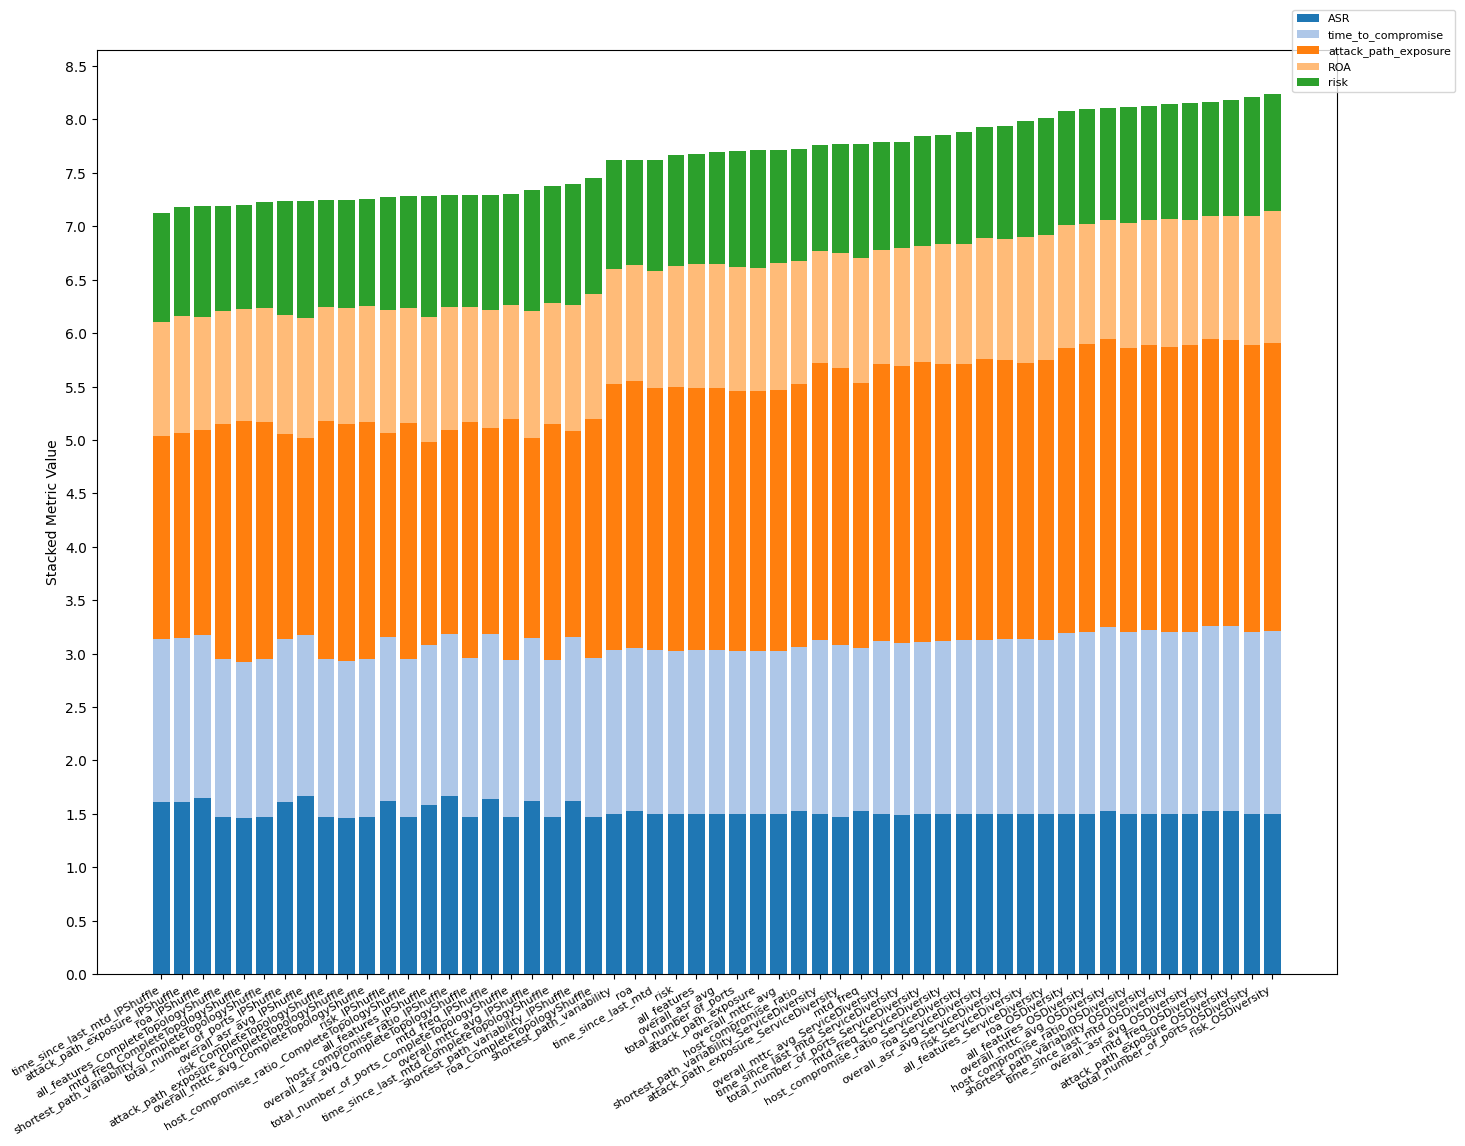

In [70]:
chart.plot_n_schemes(name = "All models", title=None, show_numbers=False)

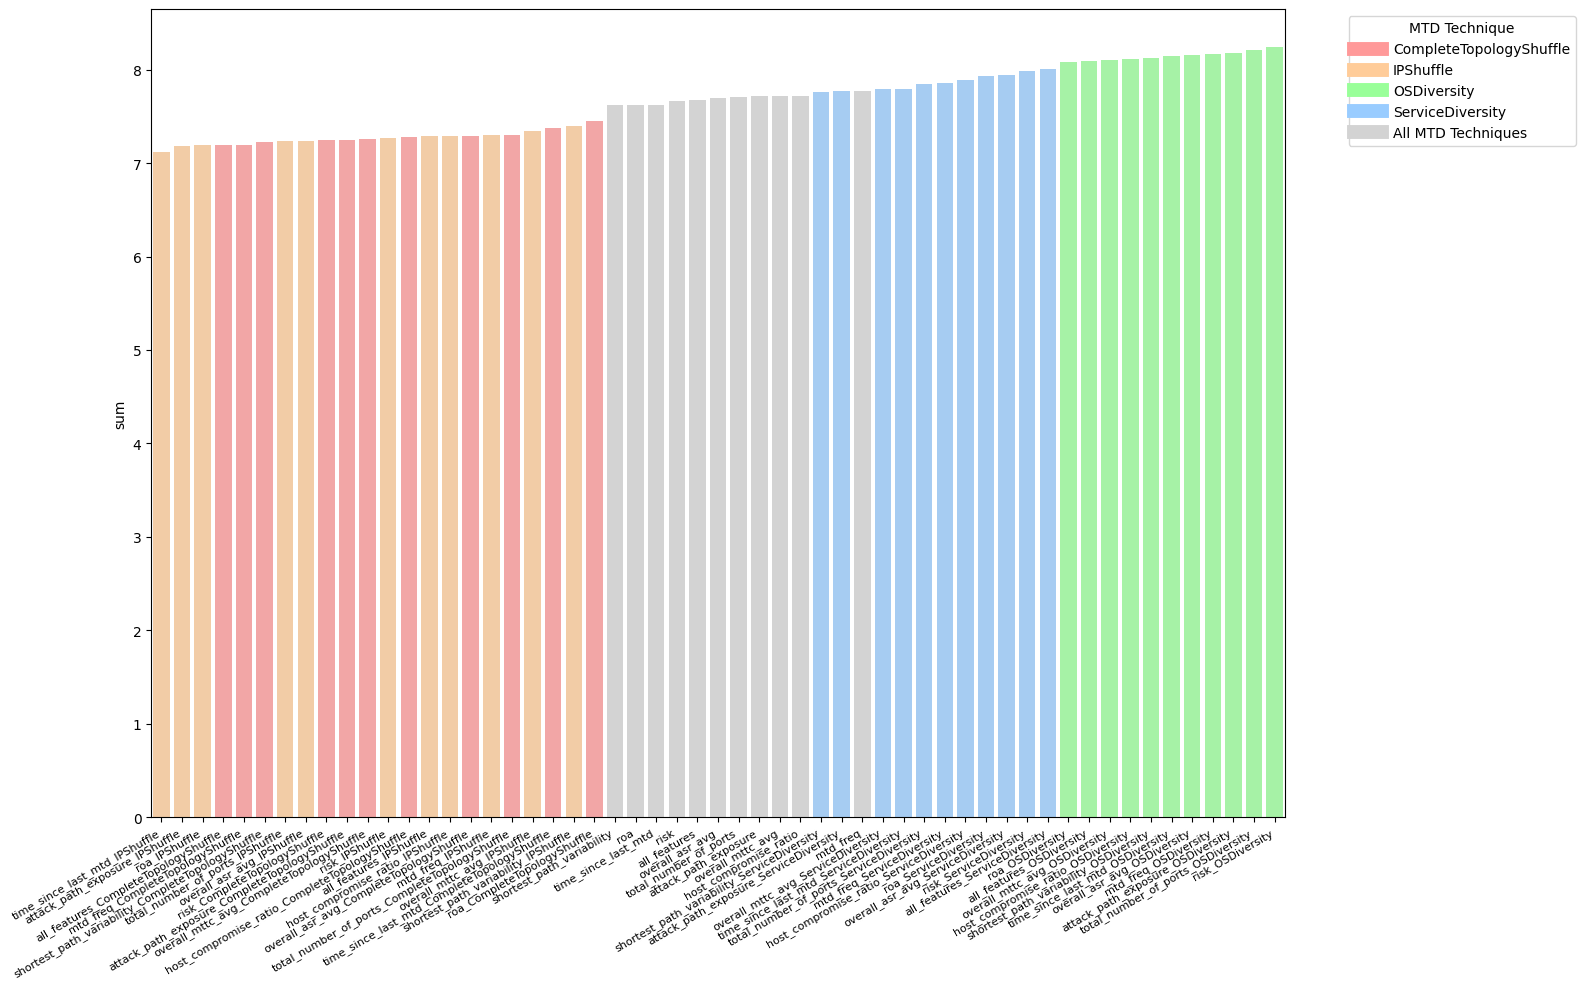

In [71]:
chart.mtd_techniques_chart('sum')

In [72]:
combined_data

all_features  all_features_CompleteTopologyShuffle  \
ASR                       1.500000                              1.472222   
time_to_compromise        1.536778                              1.475282   
attack_path_exposure      2.448235                              2.206705   
ROA                       1.159555                              1.048409   
risk                      1.034602                              0.991688   

                      all_features_IPShuffle  all_features_OSDiversity  \
ASR                                 1.583333                  1.500000   
time_to_compromise                  1.496946                  1.702592   
attack_path_exposure                1.904885                  2.693952   
ROA                                 1.168224                  1.126862   
risk                                1.133469                  1.072817   

                      all_features_ServiceDiversity  host_compromise_ratio  \
ASR                                        1.500000               1.527778   
time_to_compromise                         1.629319               1.535351   
attack_path_exposure                       2.615209               2.460476   
ROA                                        1.176116               1.156150   
risk                                       1.090969               1.041980   

                      host_compromise_ratio_CompleteTopologyShuffle  \
ASR                                                        1.472222   
time_to_compromise                                         1.473507   
attack_path_exposure                                       2.211664   
ROA                                                        1.078217   
risk                                                       1.046188   

                      host_compromise_ratio_IPShuffle  \
ASR                                          1.666667   
time_to_compromise                           1.514567   
attack_path_exposure                         1.916010   
ROA                                          1.150830   
risk                                         1.040440   

                      host_compromise_ratio_OSDiversity  \
ASR                                            1.500000   
time_to_compromise                             1.704895   
attack_path_exposure                           2.659974   
ROA                                            1.167001   
risk                                           1.081417   

                      host_compromise_ratio_ServiceDiversity  ...  \
ASR                                                 1.500000  ...   
time_to_compromise                                  1.625636  ...   
attack_path_exposure                                2.589975  ...   
ROA                                                 1.122988  ...   
risk                                                1.046215  ...   

                      overall_mttc_avg_OSDiversity  \
ASR                                       1.527778   
time_to_compromise                        1.724911   
attack_path_exposure                      2.689045   
ROA                                       1.121795   
risk                                      1.040615   

                      overall_mttc_avg_ServiceDiversity  time_since_last_mtd  \
ASR                                            1.500000             1.500000   
time_to_compromise                             1.622033             1.530234   
attack_path_exposure                           2.592249             2.460476   
ROA                                            1.064459             1.089260   
risk                                           1.010882             1.043271   

                      time_since_last_mtd_CompleteTopologyShuffle  \
ASR                                                      1.472222   
time_to_compromise                                       1.467154   
attack_path_exposure                                     2.211664   
ROA                          

In [73]:
# chart.plot_n_schemes(show_numbers=False)

In [74]:
data = chart.weighted_data.T

Standard deviation for each metric:
ASR                     0.042127
time_to_compromise      0.095518
attack_path_exposure    0.321760
ROA                     0.052340
risk                    0.054134
dtype: float64

Overall 'sum' standard deviation: 2.35



<Figure size 1600x1200 with 0 Axes>

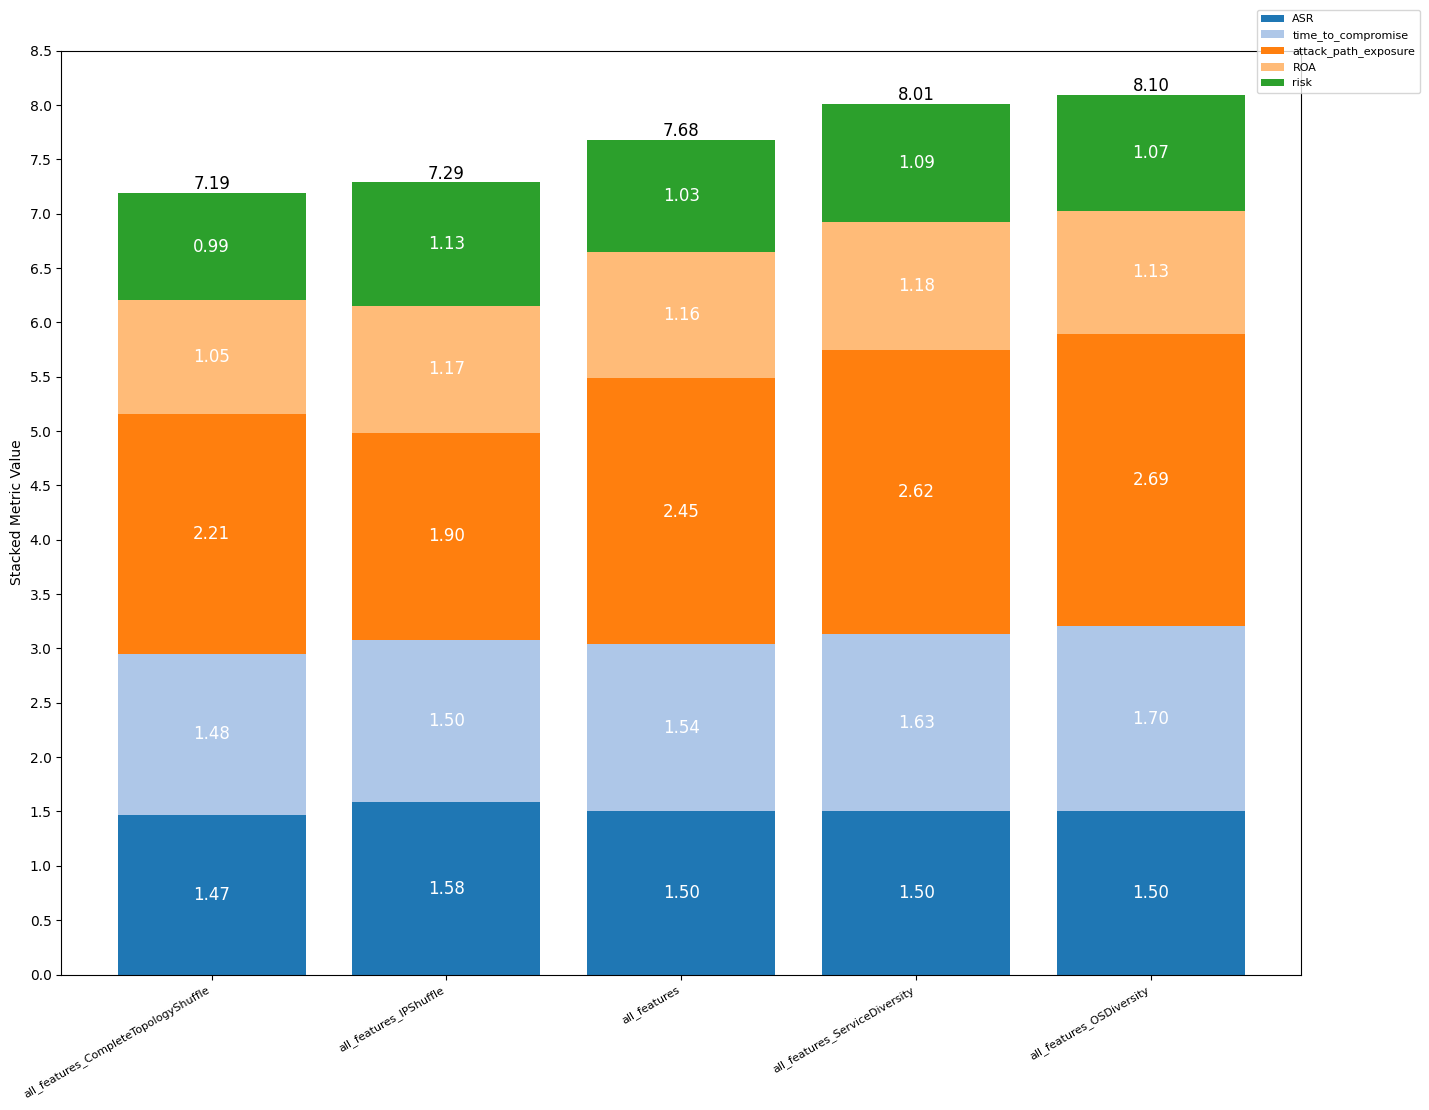

Standard deviation for each metric:
ASR                     0.077080
time_to_compromise      0.093372
attack_path_exposure    0.304881
ROA                     0.035674
risk                    0.017057
dtype: float64

Overall 'sum' standard deviation: 2.11



<Figure size 1600x1200 with 0 Axes>

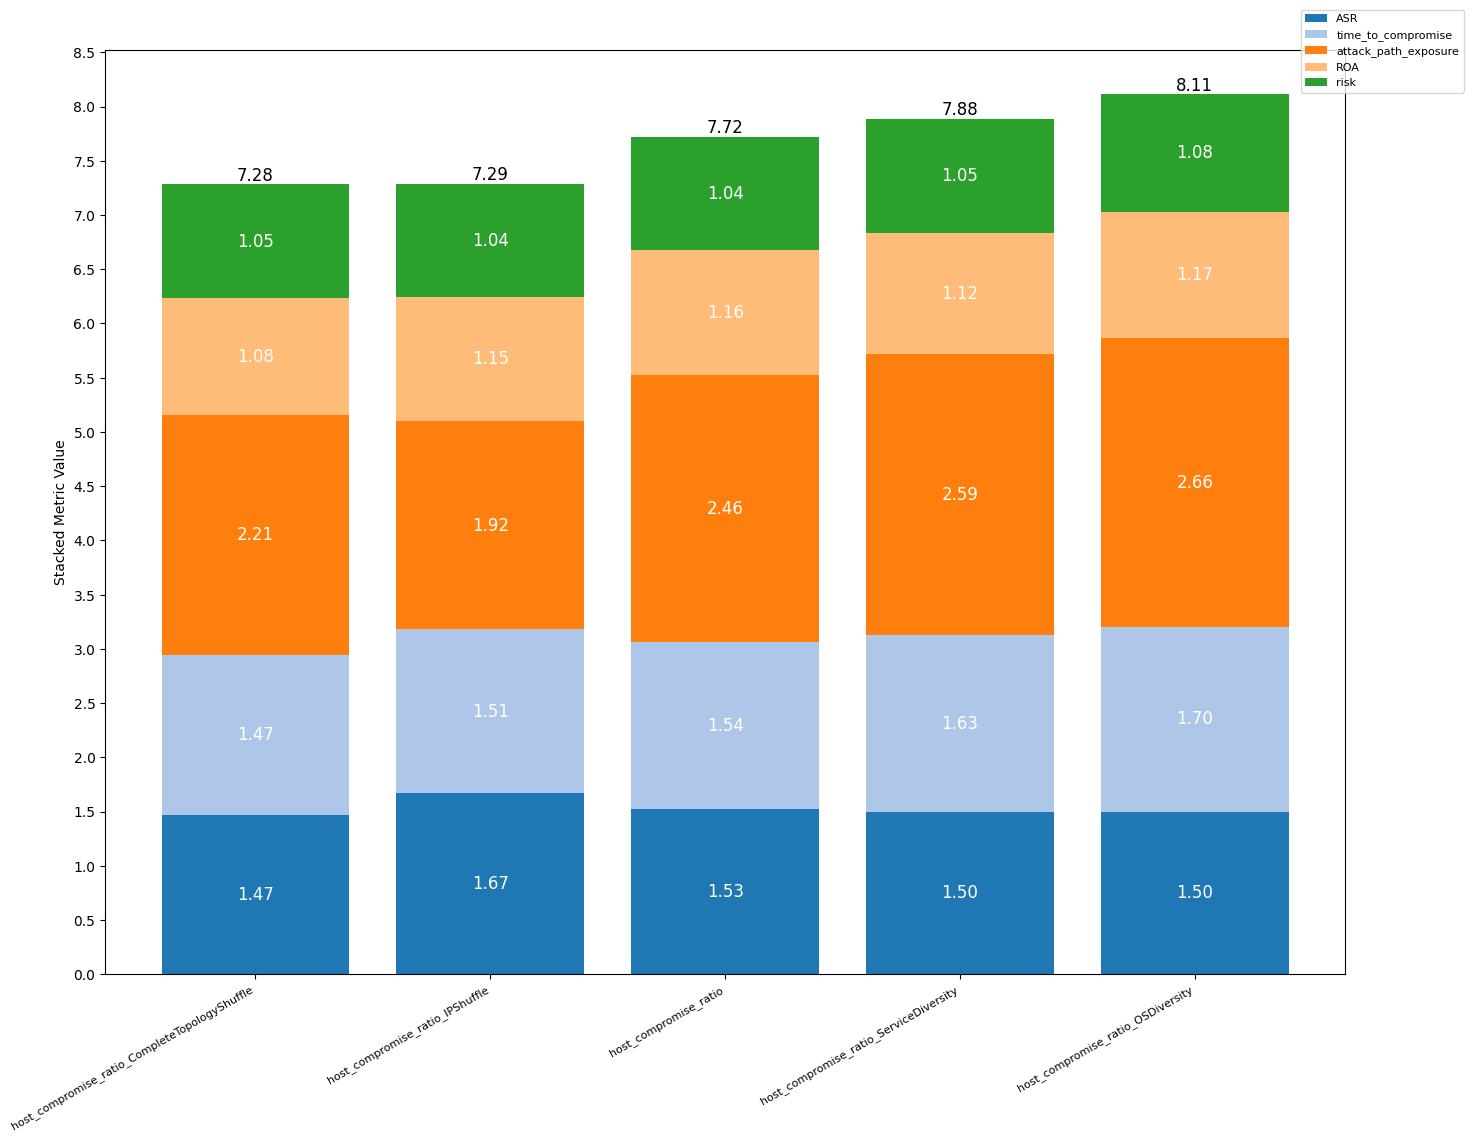

Standard deviation for each metric:
ASR                     0.054149
time_to_compromise      0.088646
attack_path_exposure    0.308666
ROA                     0.060496
risk                    0.031999
dtype: float64

Overall 'sum' standard deviation: 2.31



<Figure size 1600x1200 with 0 Axes>

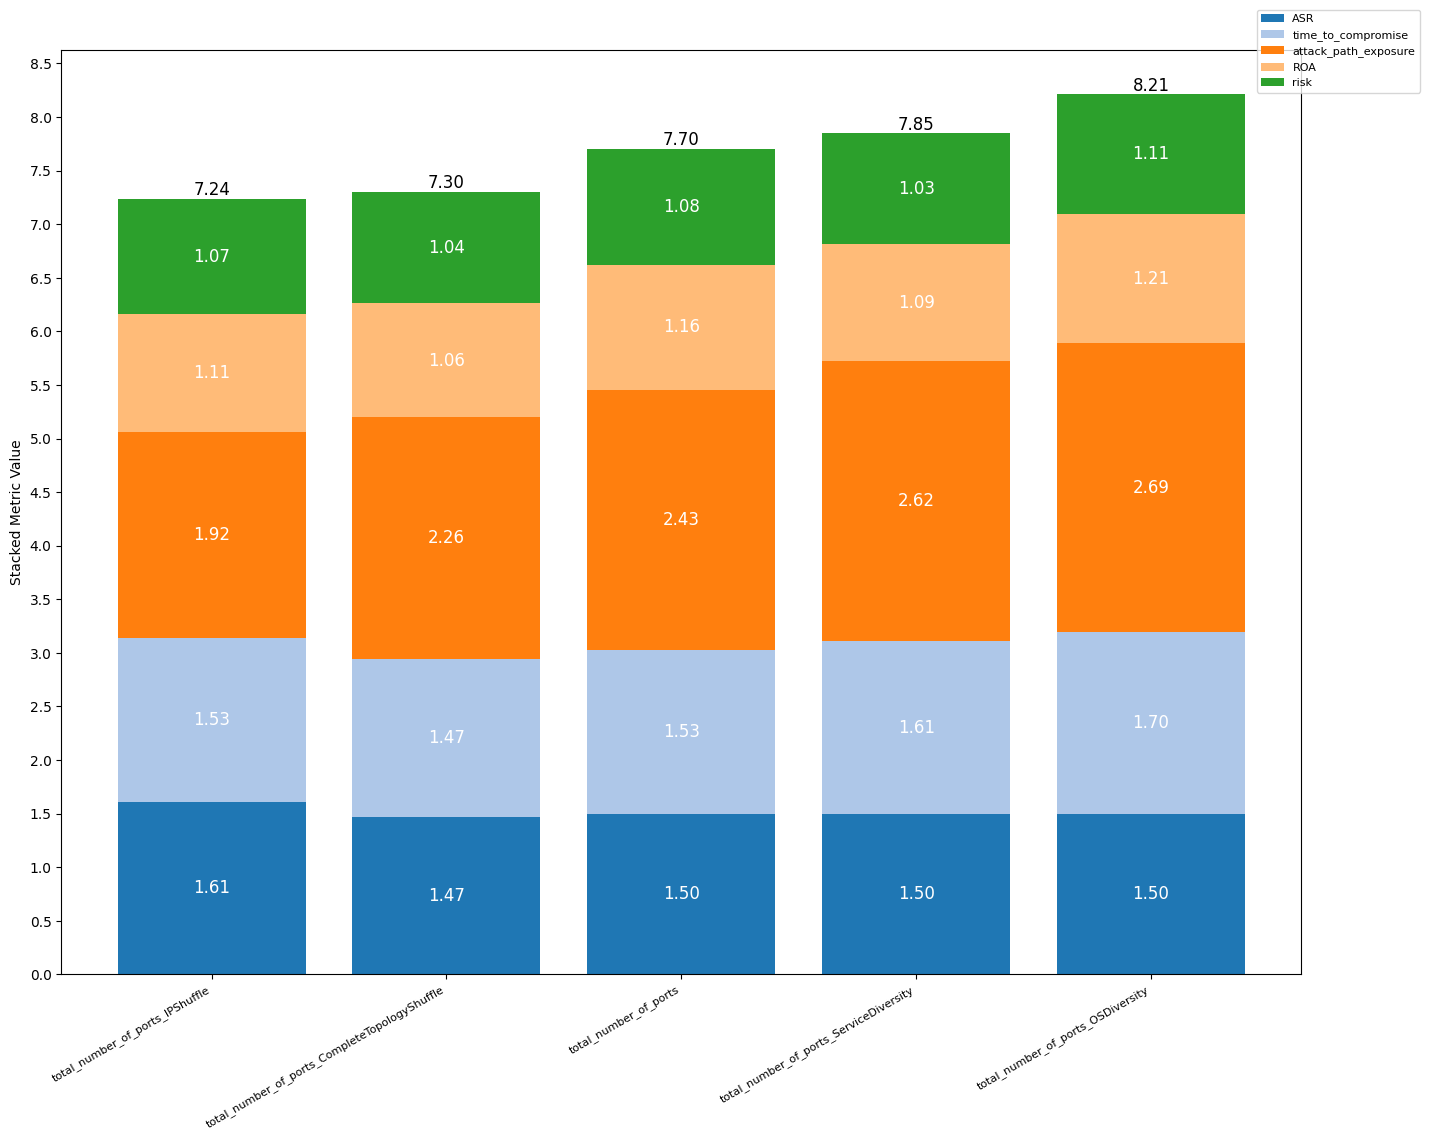

Standard deviation for each metric:
ASR                     0.060540
time_to_compromise      0.097437
attack_path_exposure    0.309325
ROA                     0.041478
risk                    0.041519
dtype: float64

Overall 'sum' standard deviation: 2.36



<Figure size 1600x1200 with 0 Axes>

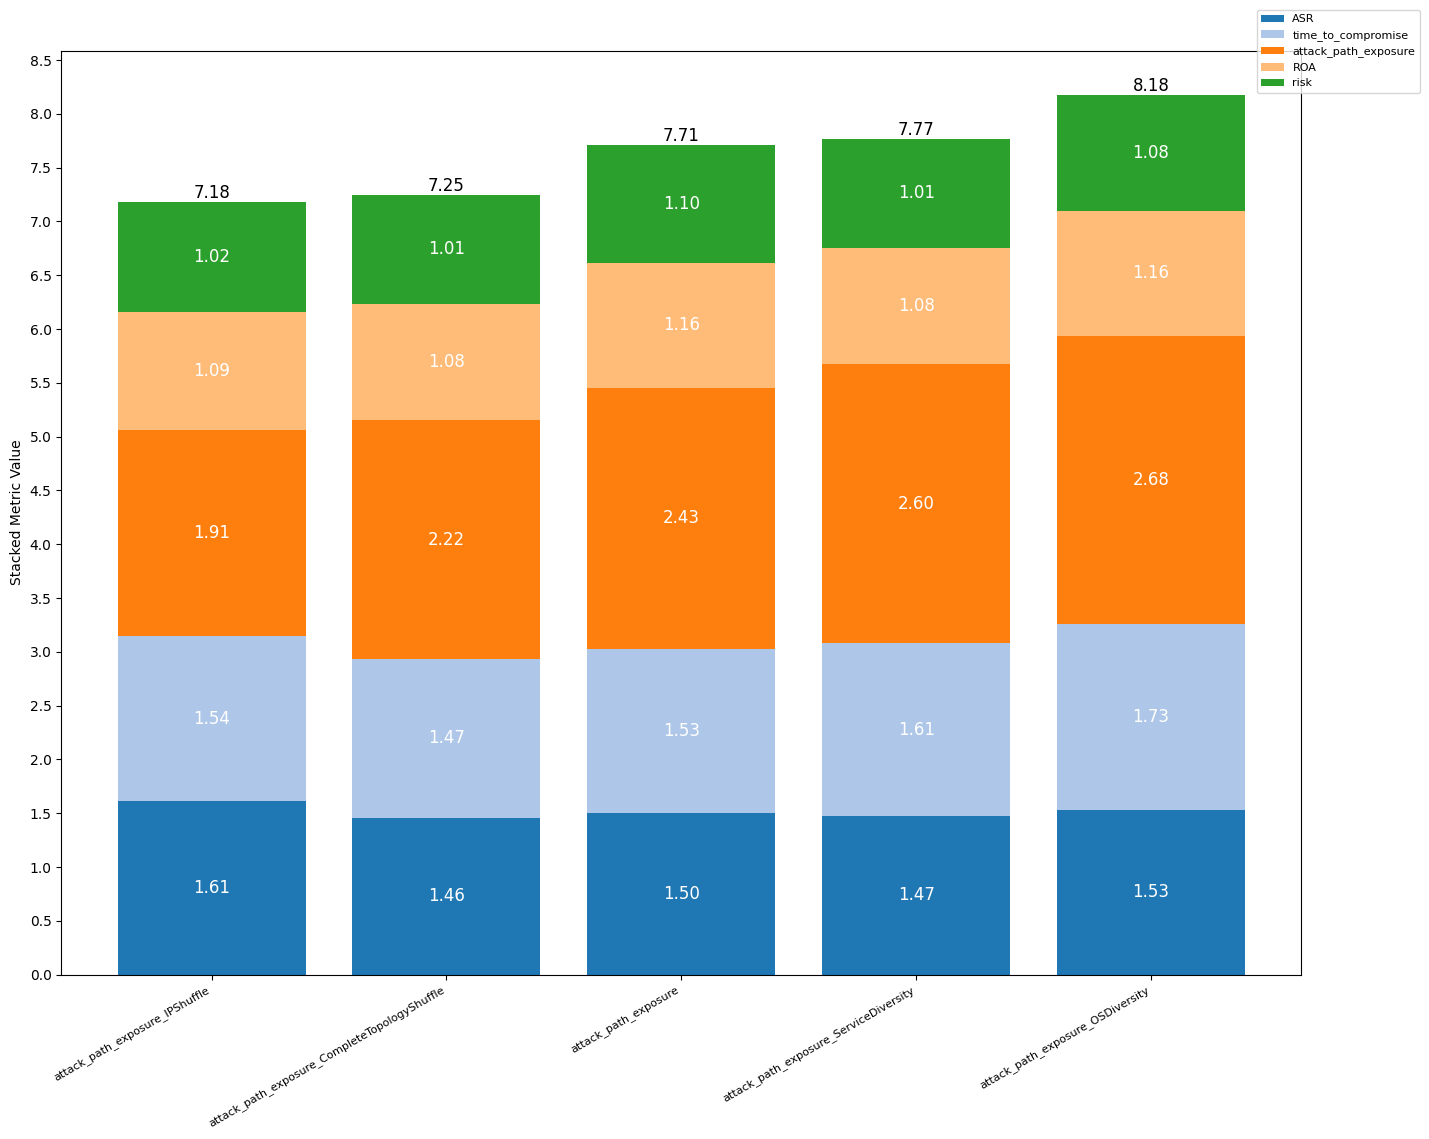

Standard deviation for each metric:
ASR                     0.078567
time_to_compromise      0.092533
attack_path_exposure    0.342173
ROA                     0.035651
risk                    0.024377
dtype: float64

Overall 'sum' standard deviation: 2.29



<Figure size 1600x1200 with 0 Axes>

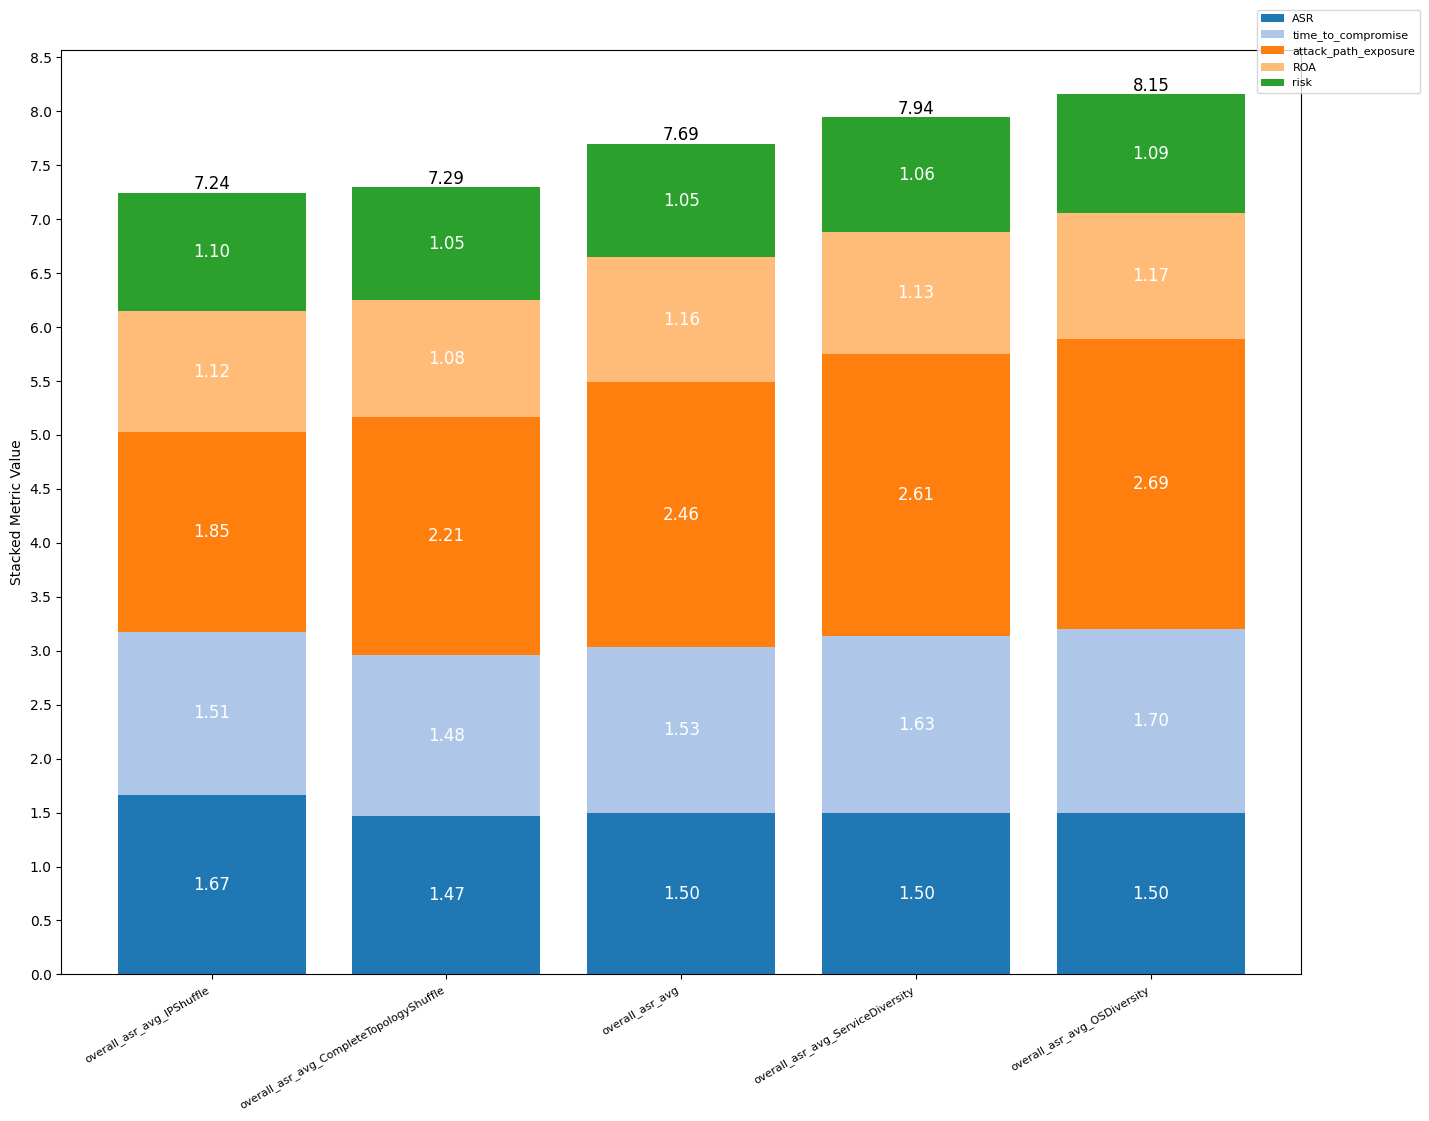

Standard deviation for each metric:
ASR                     0.069943
time_to_compromise      0.087402
attack_path_exposure    0.311376
ROA                     0.045451
risk                    0.040571
dtype: float64

Overall 'sum' standard deviation: 2.06



<Figure size 1600x1200 with 0 Axes>

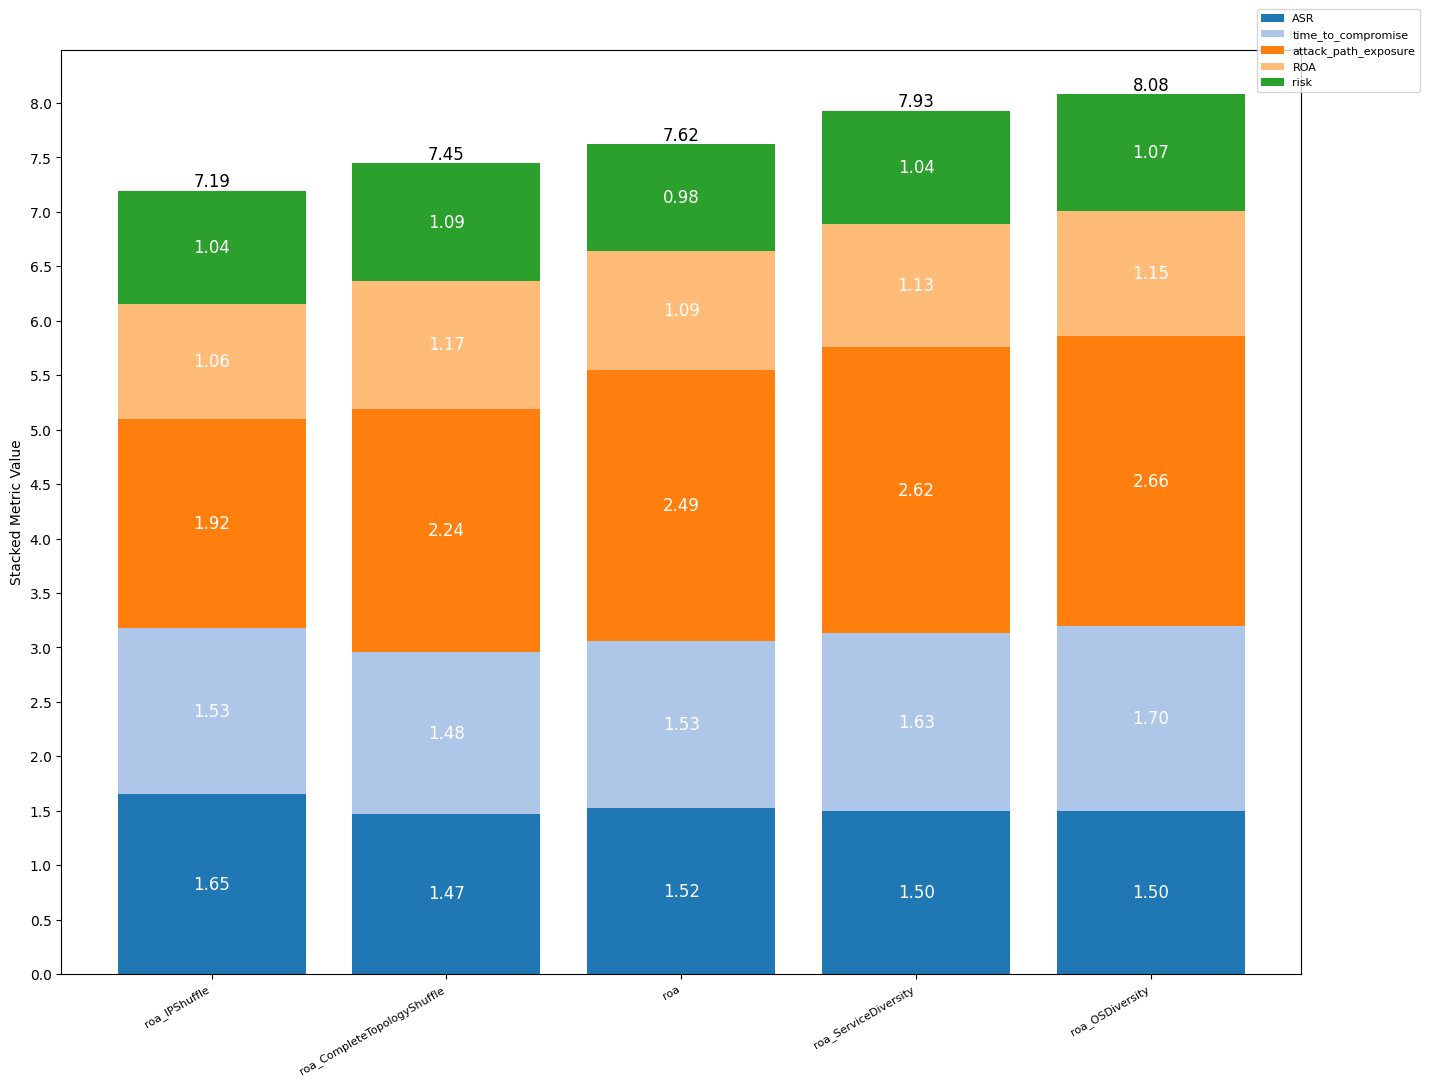

Standard deviation for each metric:
ASR                     0.060221
time_to_compromise      0.097449
attack_path_exposure    0.302451
ROA                     0.061883
risk                    0.059809
dtype: float64

Overall 'sum' standard deviation: 1.99



<Figure size 1600x1200 with 0 Axes>

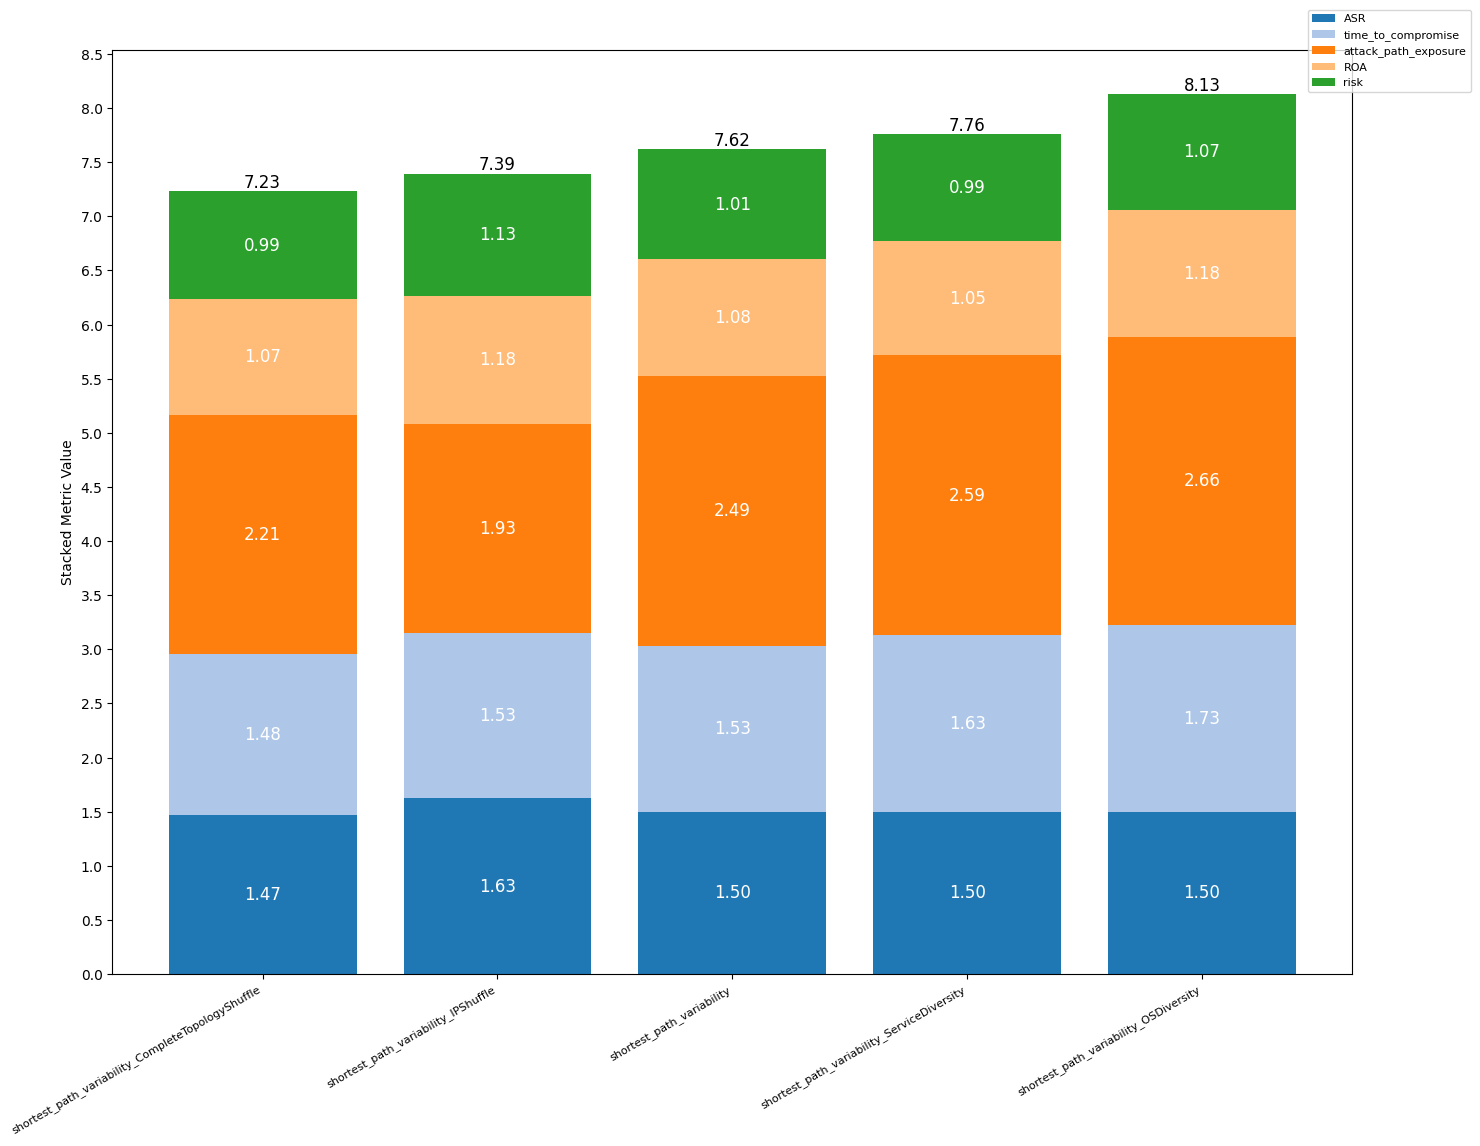

Standard deviation for each metric:
ASR                     0.060221
time_to_compromise      0.095502
attack_path_exposure    0.312361
ROA                     0.064150
risk                    0.036828
dtype: float64

Overall 'sum' standard deviation: 2.50



<Figure size 1600x1200 with 0 Axes>

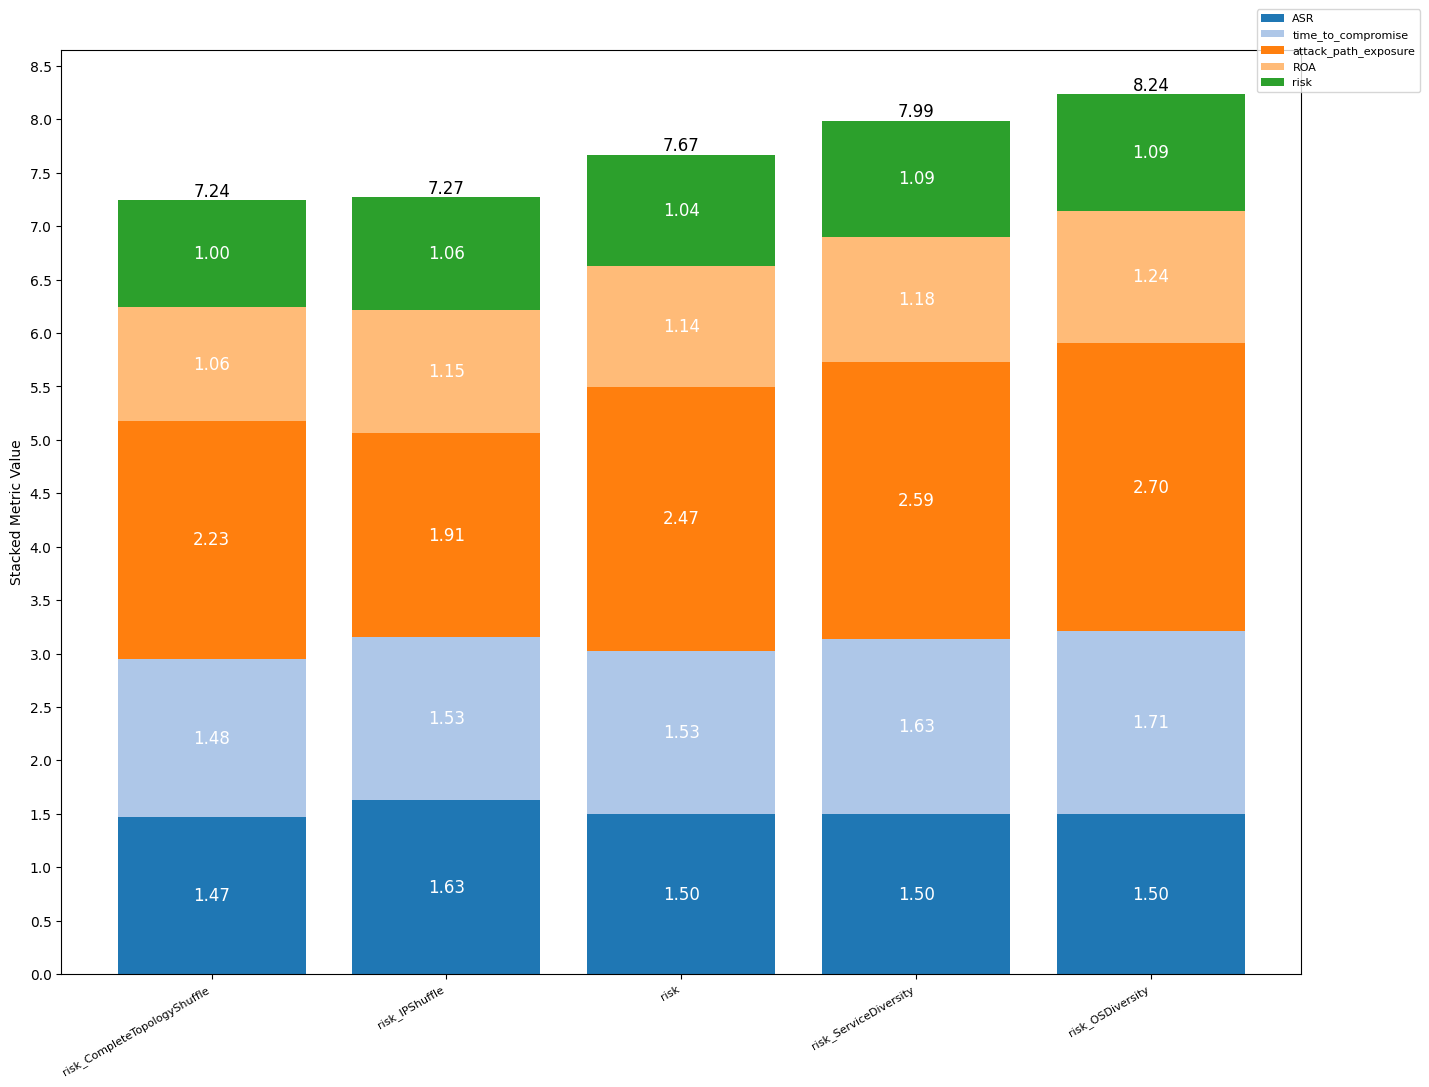

Standard deviation for each metric:
ASR                     0.066952
time_to_compromise      0.102035
attack_path_exposure    0.302352
ROA                     0.050850
risk                    0.041878
dtype: float64

Overall 'sum' standard deviation: 2.31



<Figure size 1600x1200 with 0 Axes>

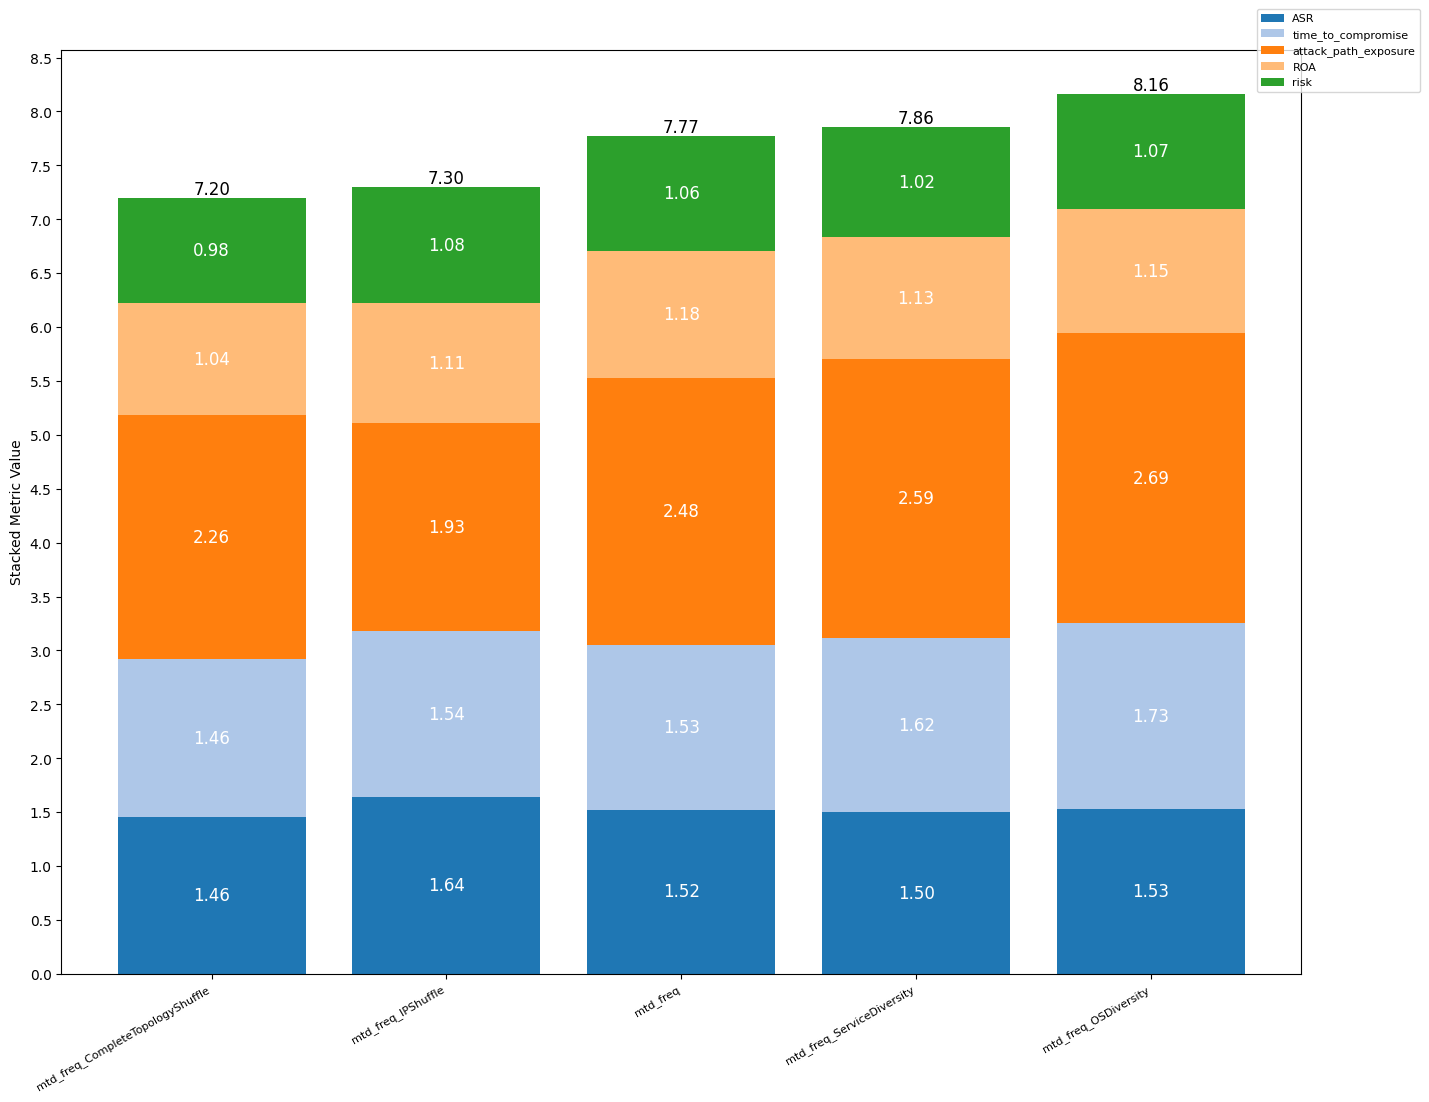

Standard deviation for each metric:
ASR                     0.059252
time_to_compromise      0.098540
attack_path_exposure    0.327177
ROA                     0.058417
risk                    0.052261
dtype: float64

Overall 'sum' standard deviation: 1.98



<Figure size 1600x1200 with 0 Axes>

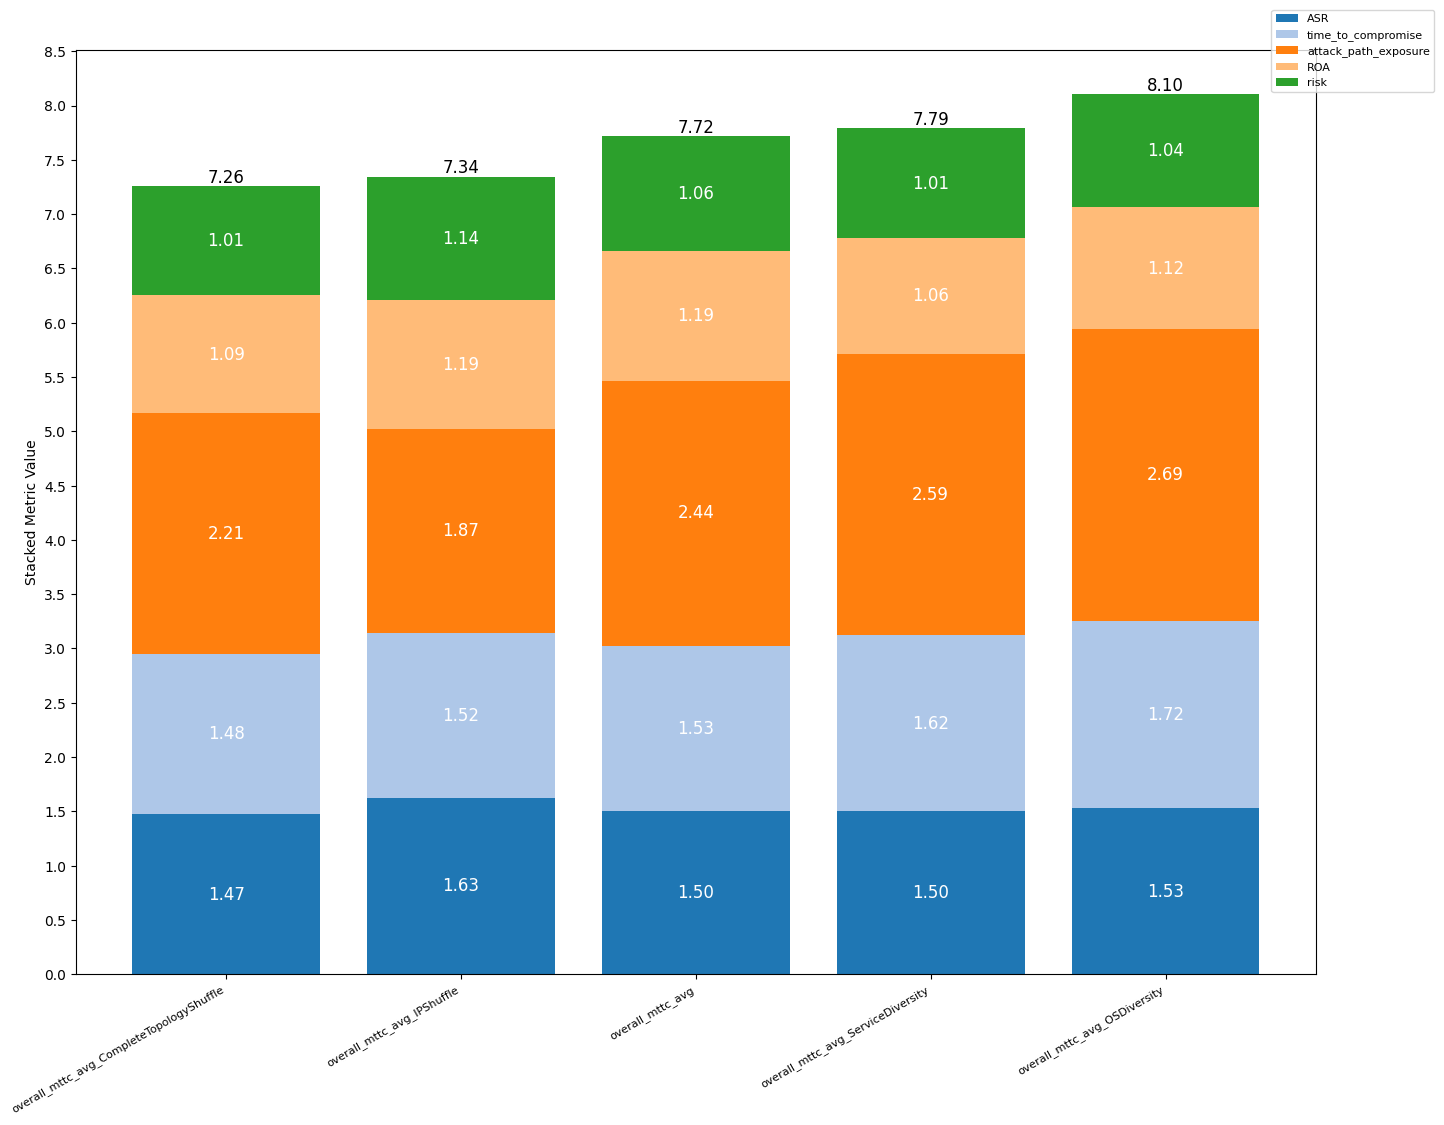

Standard deviation for each metric:
ASR                     0.055150
time_to_compromise      0.092192
attack_path_exposure    0.310102
ROA                     0.050813
risk                    0.043024
dtype: float64

Overall 'sum' standard deviation: 2.25



<Figure size 1600x1200 with 0 Axes>

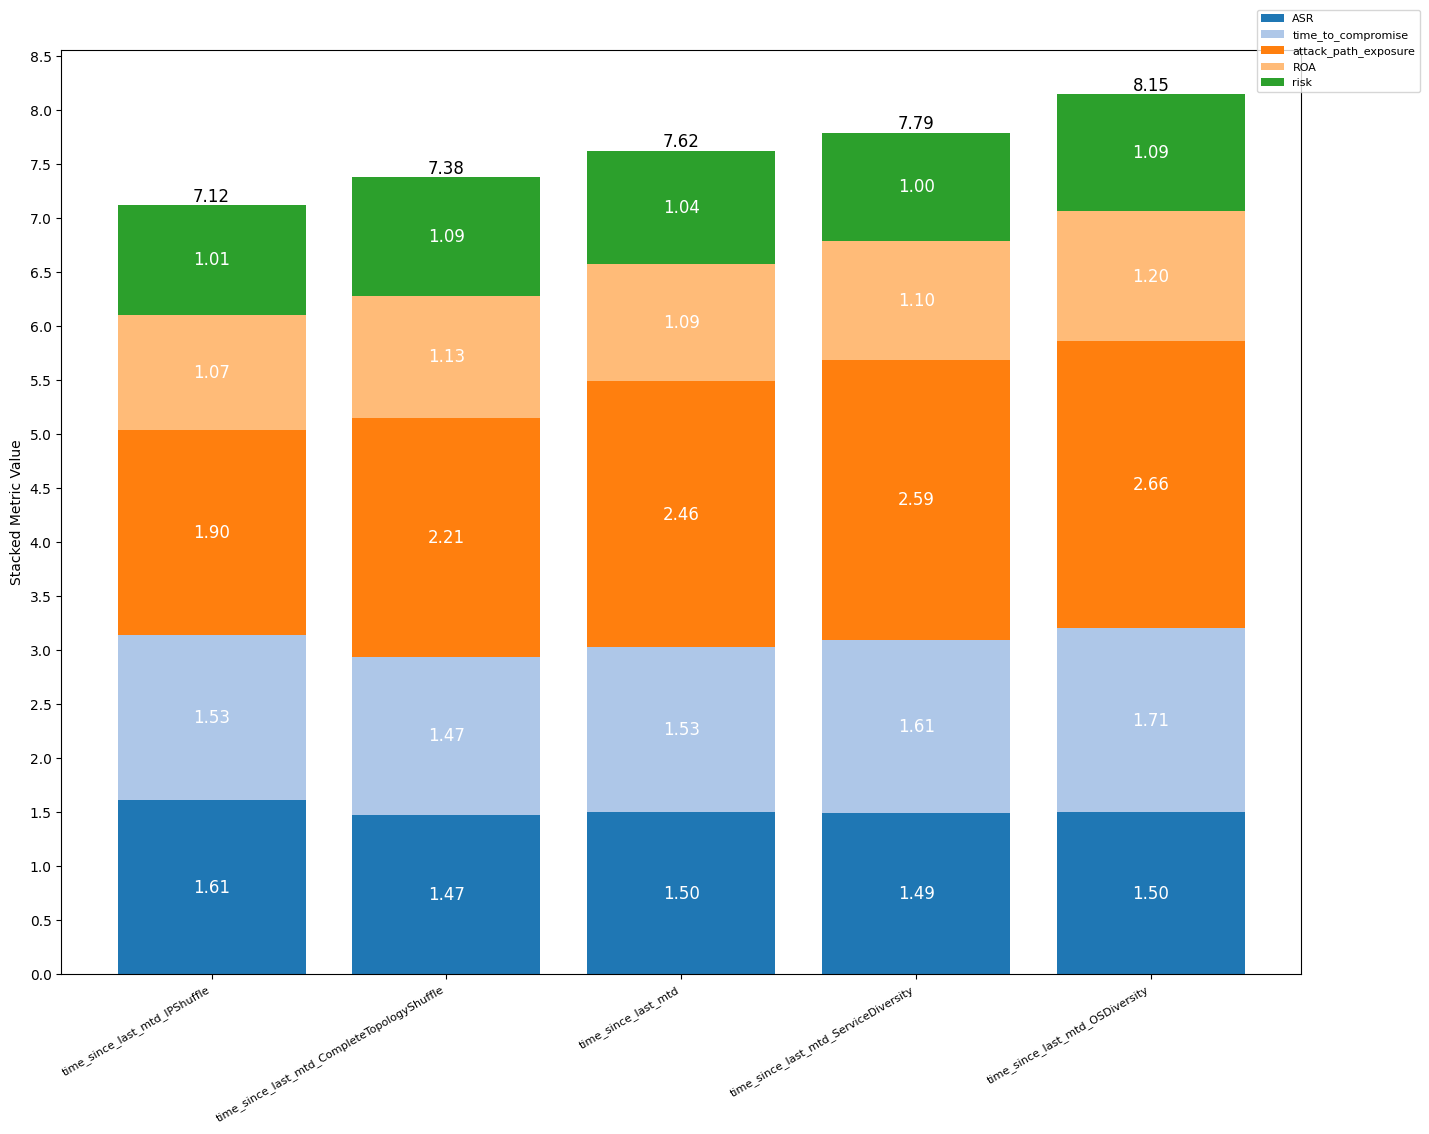

In [75]:

for metric in metrics:  
    data_copy = data
    metric_data = data_copy.filter(regex=metric)
    chart.process_weighted_metrics(metric_data)
    # Create a new figure for each metric
    plt.figure(figsize=(16, 12))  # Adjust the size as needed

    # Plot the schemes for the current metric
    chart.plot_n_schemes(name = metric, title=None)
    
    # Show the plot for the current metric
    plt.show()




In [76]:
mtd_schemes = ["CompleteTopologyShuffle",
        "IPShuffle",
        "OSDiversity",
        "ServiceDiversity"
    ]

Standard deviation for each metric:
ASR                     0.005618
time_to_compromise      0.006520
attack_path_exposure    0.018750
ROA                     0.037961
risk                    0.039224
dtype: float64

Overall 'sum' standard deviation: 0.44



<Figure size 1600x1200 with 0 Axes>

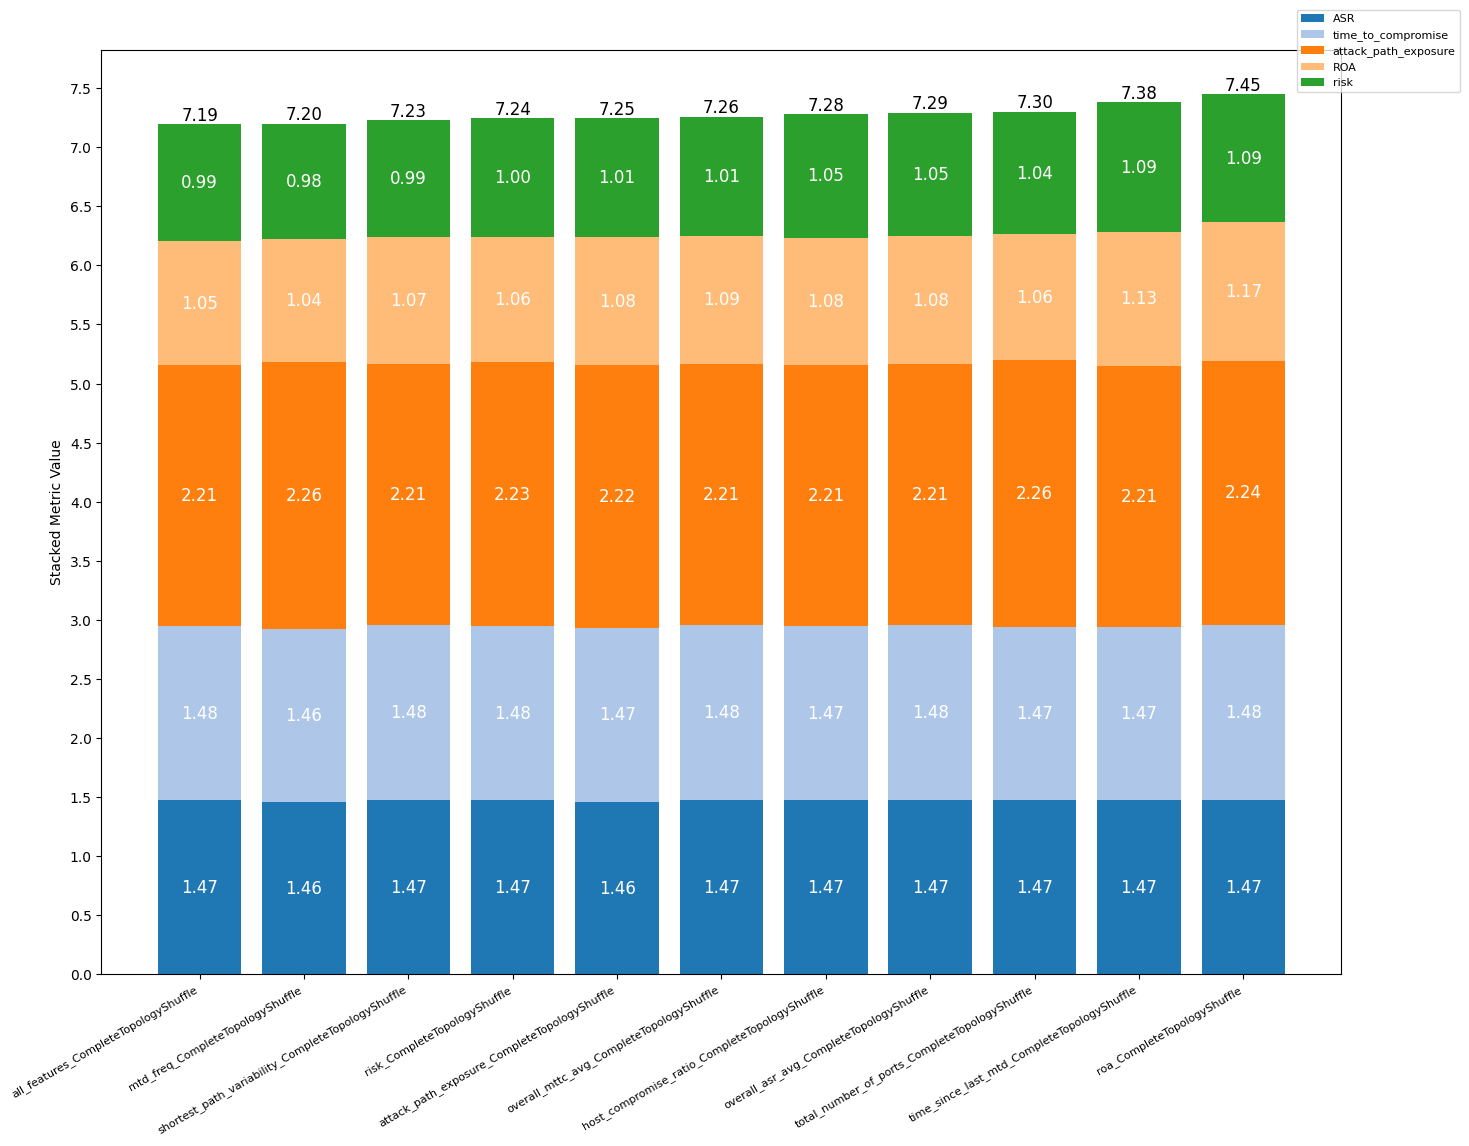

Index(['all_features_CompleteTopologyShuffle',
       'host_compromise_ratio_CompleteTopologyShuffle',
       'total_number_of_ports_CompleteTopologyShuffle',
       'attack_path_exposure_CompleteTopologyShuffle',
       'overall_asr_avg_CompleteTopologyShuffle',
       'roa_CompleteTopologyShuffle',
       'shortest_path_variability_CompleteTopologyShuffle',
       'risk_CompleteTopologyShuffle', 'mtd_freq_CompleteTopologyShuffle',
       'overall_mttc_avg_CompleteTopologyShuffle',
       'time_since_last_mtd_CompleteTopologyShuffle'],
      dtype='object')
Standard deviation for each metric:
ASR                     0.025431
time_to_compromise      0.012917
attack_path_exposure    0.025544
ROA                     0.044855
risk                    0.044294
dtype: float64

Overall 'sum' standard deviation: 0.44



<Figure size 1600x1200 with 0 Axes>

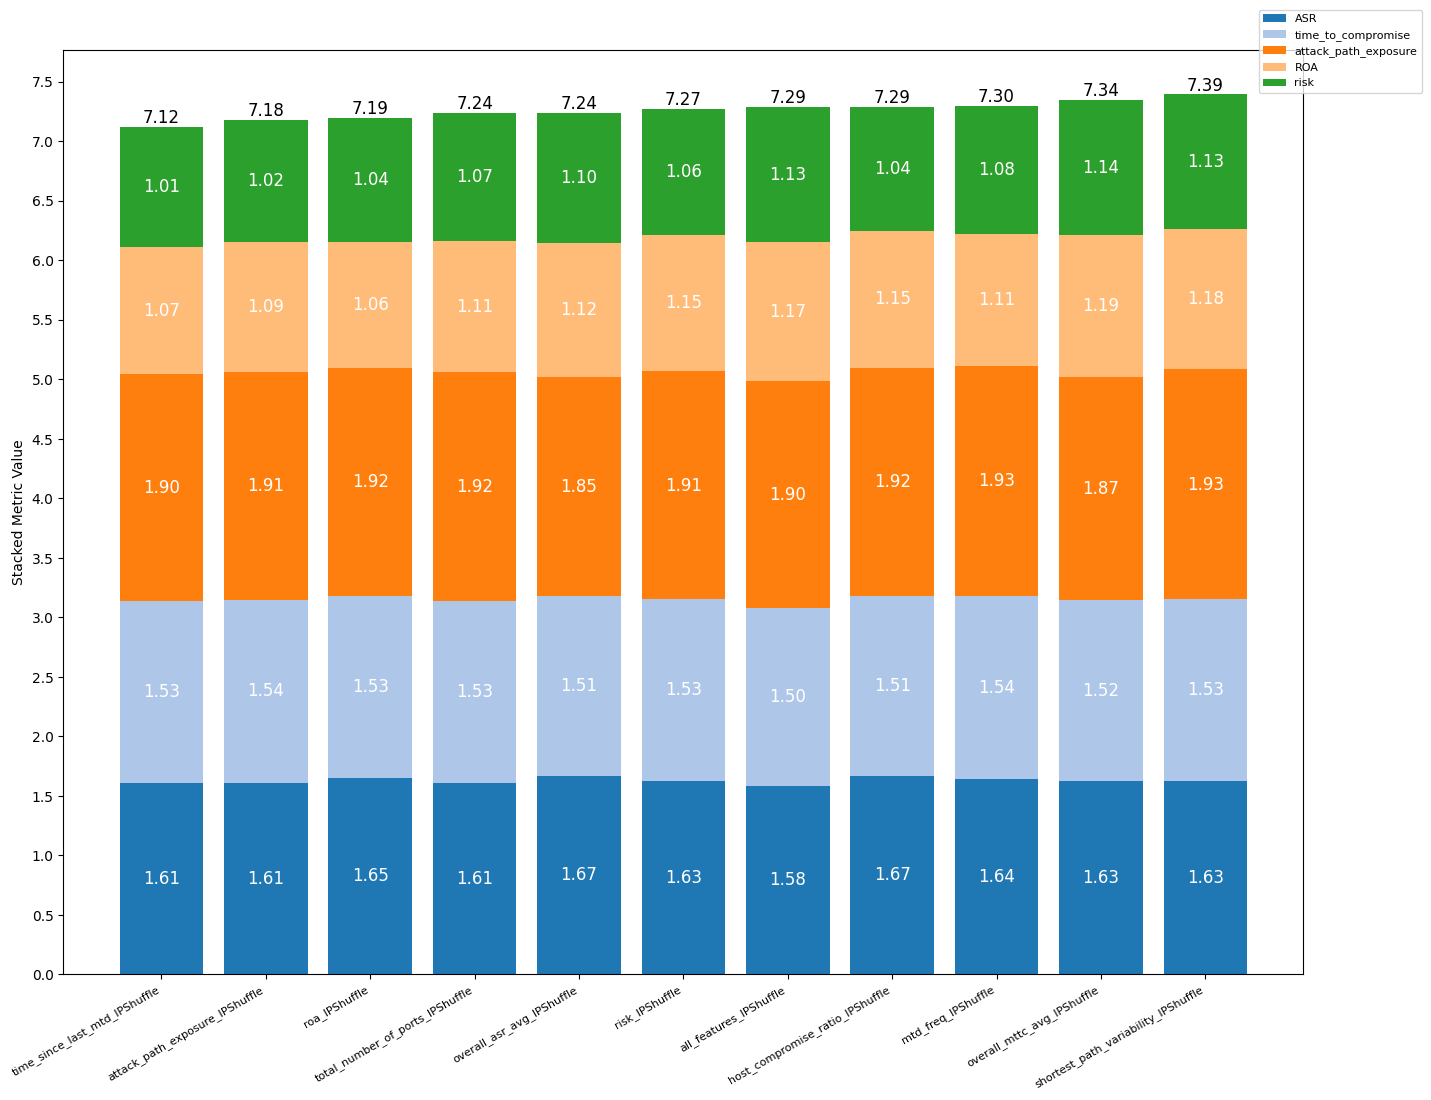

Index(['all_features_IPShuffle', 'host_compromise_ratio_IPShuffle',
       'total_number_of_ports_IPShuffle', 'attack_path_exposure_IPShuffle',
       'overall_asr_avg_IPShuffle', 'roa_IPShuffle',
       'shortest_path_variability_IPShuffle', 'risk_IPShuffle',
       'mtd_freq_IPShuffle', 'overall_mttc_avg_IPShuffle',
       'time_since_last_mtd_IPShuffle'],
      dtype='object')
Standard deviation for each metric:
ASR                     0.012975
time_to_compromise      0.012666
attack_path_exposure    0.014834
ROA                     0.034863
risk                    0.018573
dtype: float64

Overall 'sum' standard deviation: 0.28



<Figure size 1600x1200 with 0 Axes>

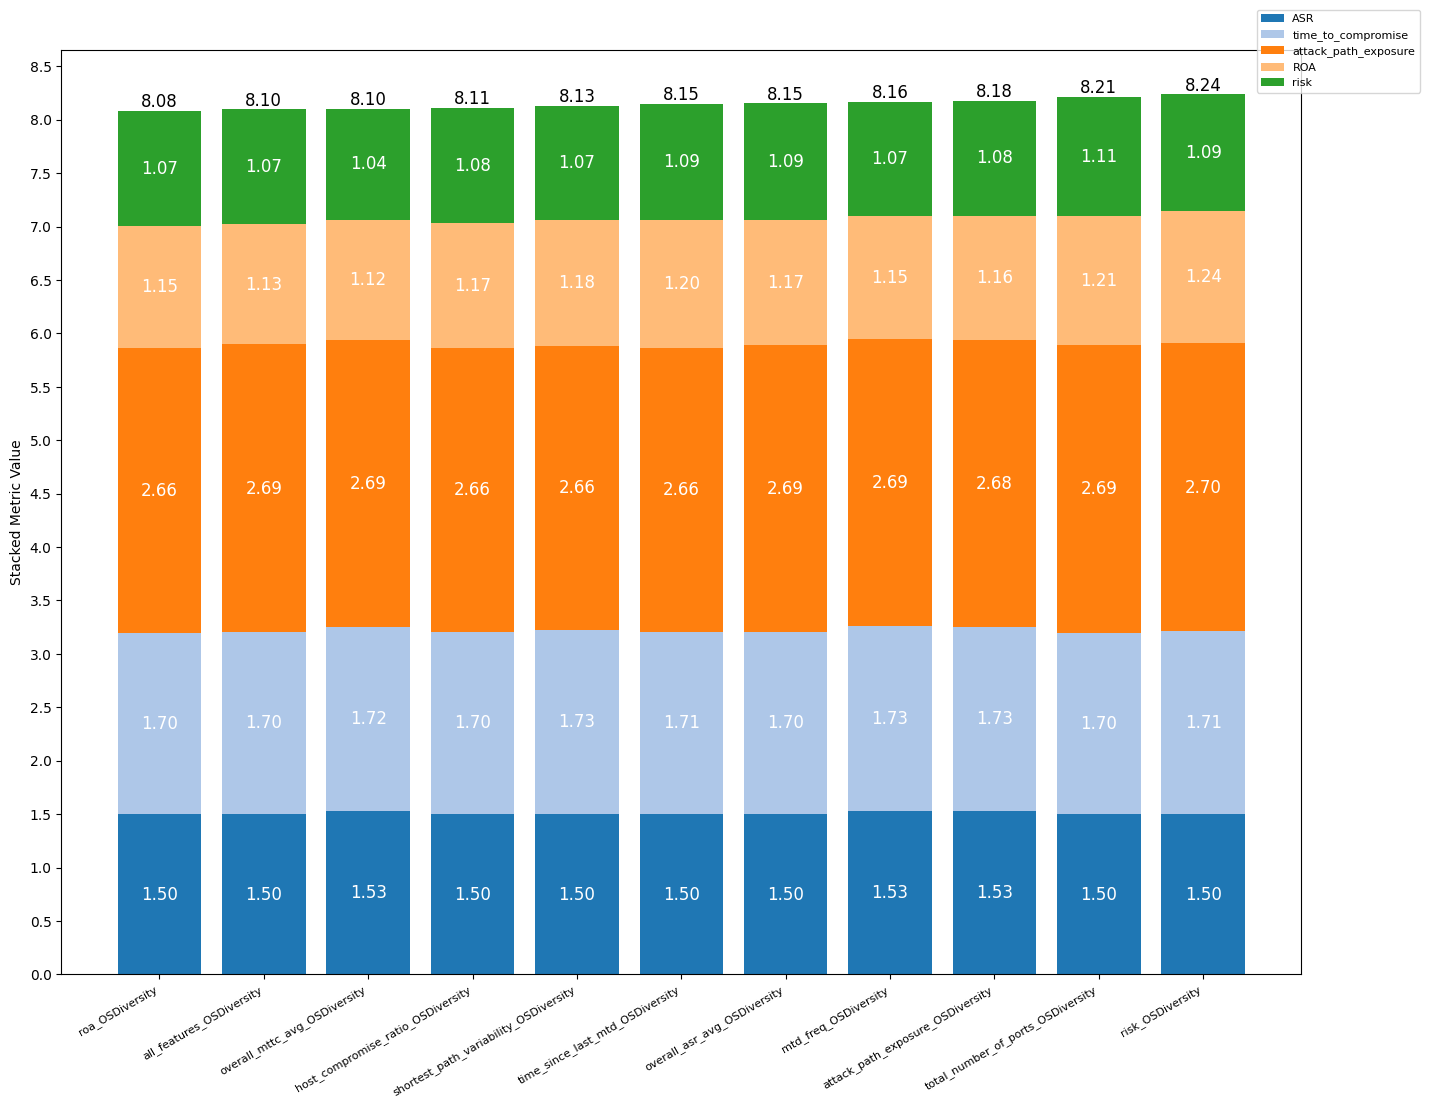

Index(['all_features_OSDiversity', 'host_compromise_ratio_OSDiversity',
       'total_number_of_ports_OSDiversity', 'attack_path_exposure_OSDiversity',
       'overall_asr_avg_OSDiversity', 'roa_OSDiversity',
       'shortest_path_variability_OSDiversity', 'risk_OSDiversity',
       'mtd_freq_OSDiversity', 'overall_mttc_avg_OSDiversity',
       'time_since_last_mtd_OSDiversity'],
      dtype='object')
Standard deviation for each metric:
ASR                     0.008652
time_to_compromise      0.010087
attack_path_exposure    0.013715
ROA                     0.041543
risk                    0.034329
dtype: float64

Overall 'sum' standard deviation: 0.51



<Figure size 1600x1200 with 0 Axes>

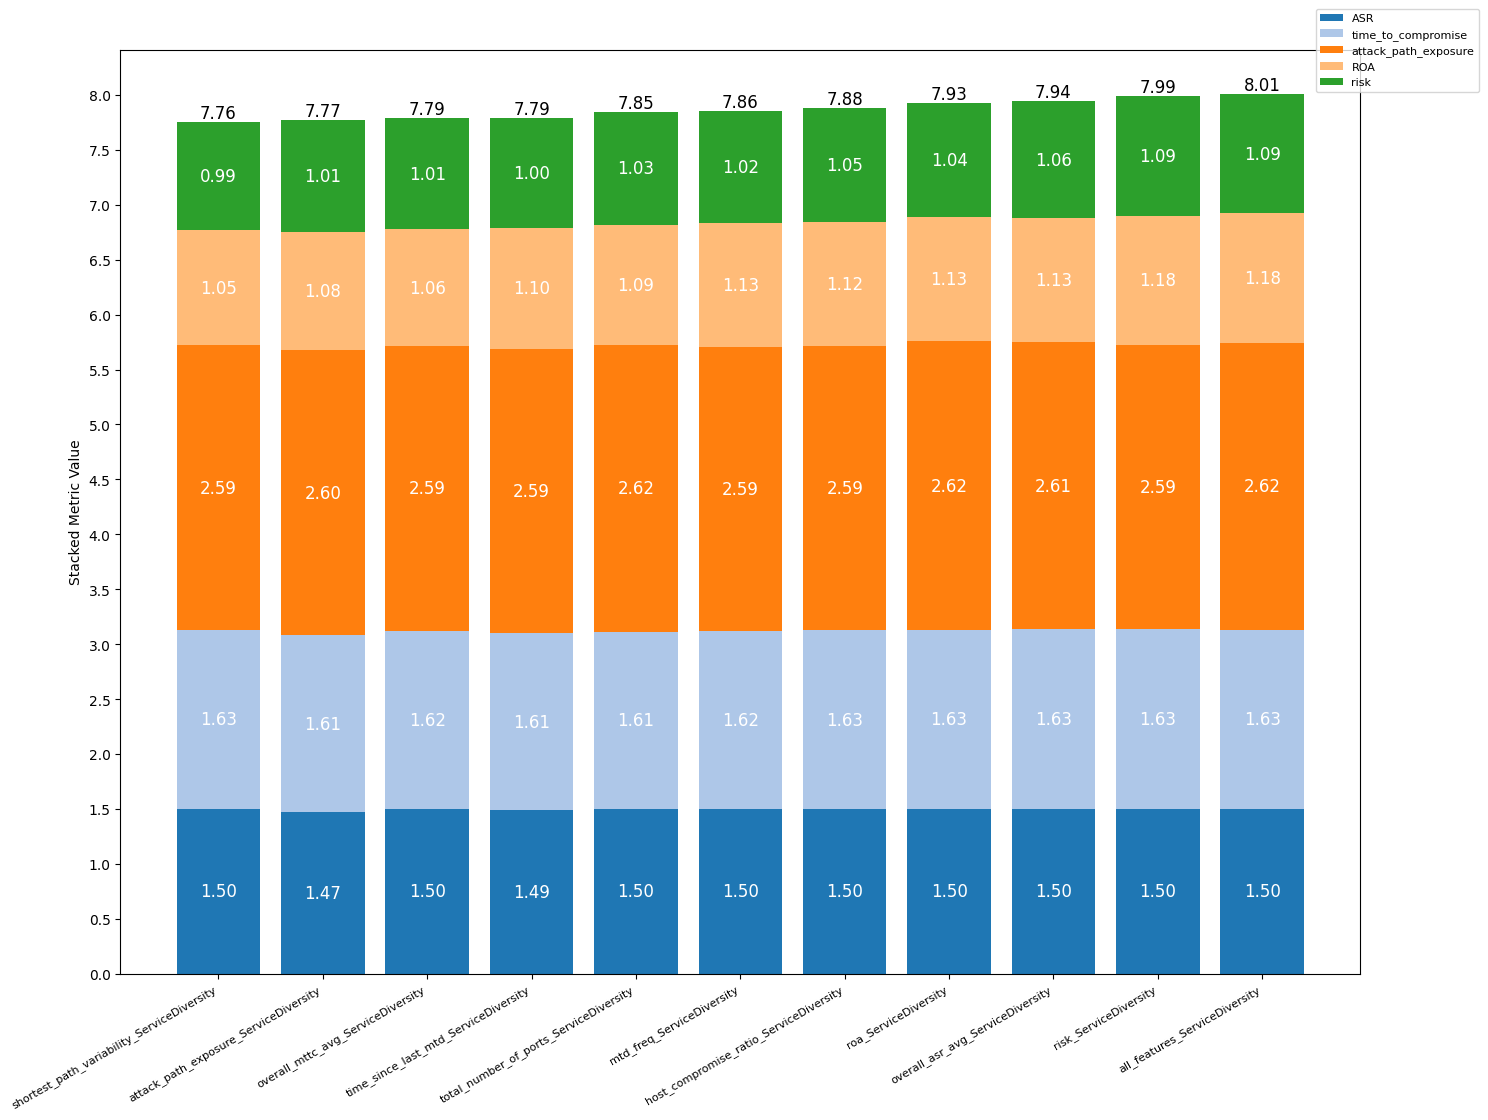

Index(['all_features_ServiceDiversity',
       'host_compromise_ratio_ServiceDiversity',
       'total_number_of_ports_ServiceDiversity',
       'attack_path_exposure_ServiceDiversity',
       'overall_asr_avg_ServiceDiversity', 'roa_ServiceDiversity',
       'shortest_path_variability_ServiceDiversity', 'risk_ServiceDiversity',
       'mtd_freq_ServiceDiversity', 'overall_mttc_avg_ServiceDiversity',
       'time_since_last_mtd_ServiceDiversity'],
      dtype='object')


In [77]:

for mtd in mtd_schemes:  
    data_copy = data
    metric_data = data_copy.filter(regex=mtd)
    chart.process_weighted_metrics(metric_data)
    # Create a new figure for each metric
    plt.figure(figsize=(16, 12))  # Adjust the size as needed

    # Plot the schemes for the current metric
    chart.plot_n_schemes(name = mtd, title=None)
    print(metric_data.columns)
    # Show the plot for the current metric
    plt.show()



Standard deviation for each metric:
ASR                     0.011925
time_to_compromise      0.003730
attack_path_exposure    0.022997
ROA                     0.038168
risk                    0.031684
dtype: float64

Overall 'sum' standard deviation: 0.28



<Figure size 1600x1200 with 0 Axes>

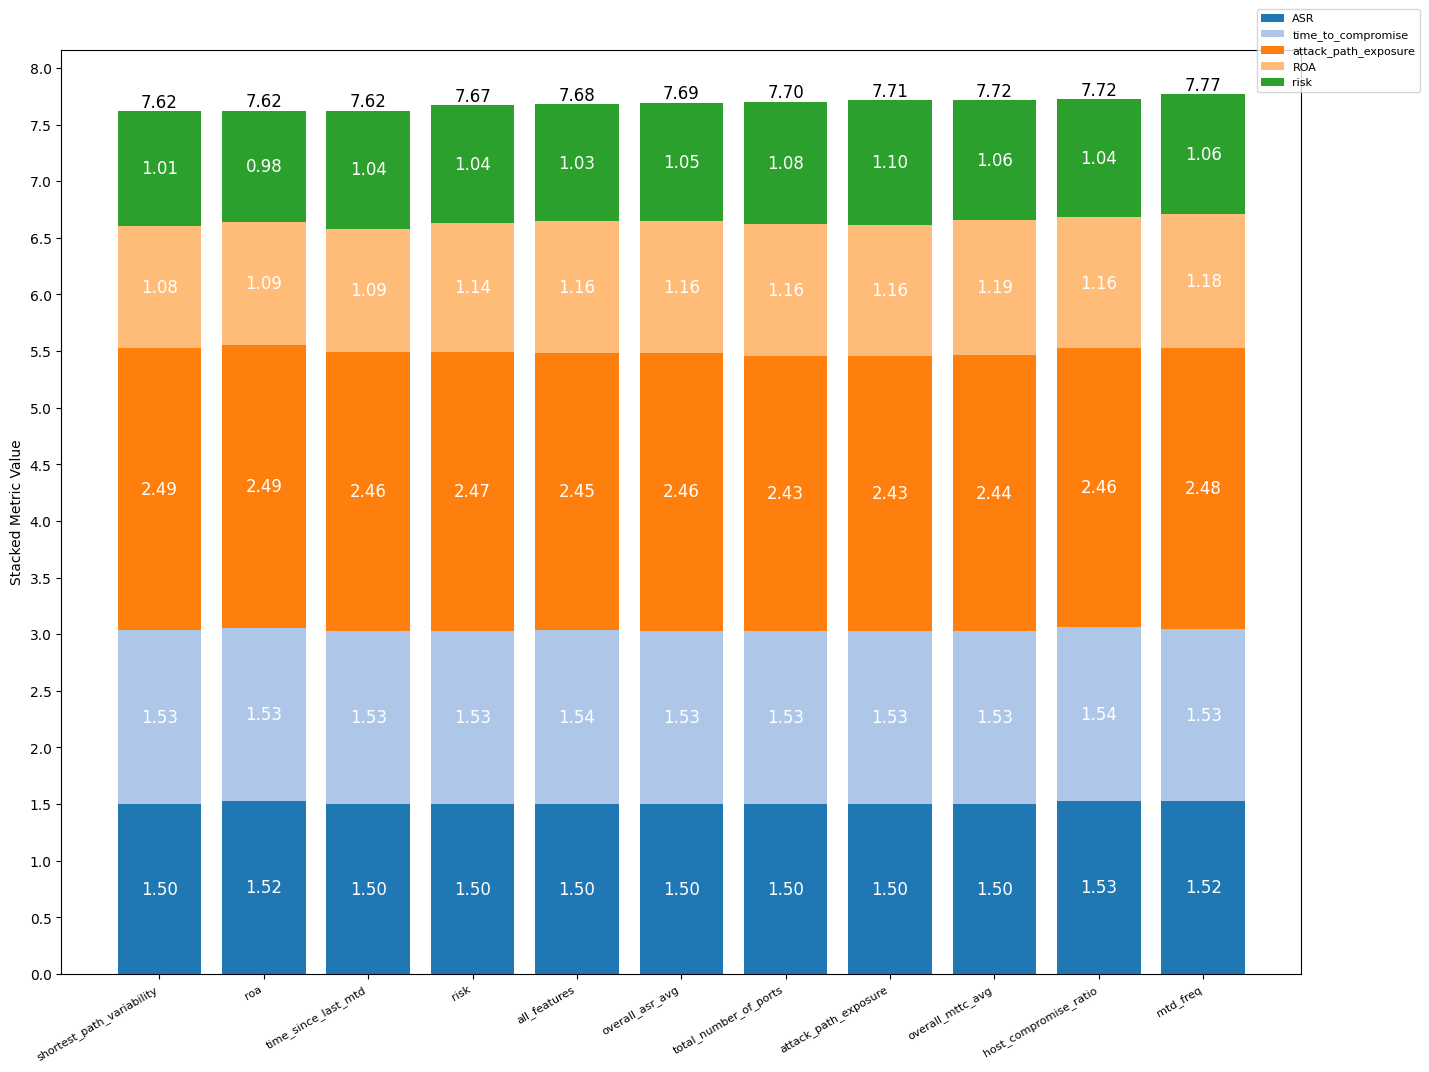

Index(['host_compromise_ratio', 'total_number_of_ports',
       'attack_path_exposure', 'overall_asr_avg', 'roa',
       'shortest_path_variability', 'risk', 'mtd_freq', 'overall_mttc_avg',
       'time_since_last_mtd', 'all_features'],
      dtype='object')


In [78]:
static_features = ["host_compromise_ratio", "total_number_of_ports", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
time_features = ["mtd_freq", "overall_mttc_avg", "time_since_last_mtd"]
metric = static_features + time_features + ['all_features']
data_copy = data
metric_data = data_copy[metric]
chart.process_weighted_metrics(metric_data)
# Create a new figure for each metric
plt.figure(figsize=(16, 12))  # Adjust the size as needed

# Plot the schemes for the current metric
chart.plot_n_schemes(name = "All_MTD", title=None)
print(metric_data.columns)
# Show the plot for the current metric
plt.show()

In [79]:
import pandas as pd

def group_by_feature(df):
    # Initialize dictionaries to store median and standard deviation DataFrames
    medians = {}
    std_devs = {}

    for metric in metrics:
        # Find columns that contain the current metric as a substring
        related_columns = [col for col in df.columns if metric in col]
        # print(related_columns)
        if related_columns:
            # Calculate the median for each related column
            median_df = df[related_columns].median(axis=1)
            # print(median_df)
            medians[metric] = median_df

            # Calculate the standard deviation for each related column
            std_dev_df = df[related_columns].std(axis=1)
            std_devs[metric] = std_dev_df
    
    # Convert the results into DataFrames for better visualization
    medians_df = pd.DataFrame(medians)
    std_devs_df = pd.DataFrame(std_devs)

    return medians_df, std_devs_df

# Group by feature prefix and calculate the median and standard deviation
medians_df, std_devs_df = group_by_feature(data)


In [80]:
data[['all_features', 'all_features_CompleteTopologyShuffle', 'all_features_IPShuffle', 'all_features_OSDiversity', 'all_features_ServiceDiversity']].T['sum'].median()

7.679169148220228

In [81]:
data[['all_features']].T['sum'].median()

7.679169148220228

In [82]:
medians_df

all_features  host_compromise_ratio  \
ASR                       1.500000               1.500000   
time_to_compromise        1.536778               1.535351   
attack_path_exposure      2.448235               2.460476   
ROA                       1.159555               1.150830   
risk                      1.072817               1.046188   
sum                       7.679169               7.721734   
zscore                    0.088562               0.209456   
minmax                    0.500258               0.538382   

                      total_number_of_ports  attack_path_exposure  \
ASR                                1.500000              1.500000   
time_to_compromise                 1.529136              1.538282   
attack_path_exposure               2.428102              2.428102   
ROA                                1.105656              1.092327   
risk                               1.070484              1.024170   
sum                                7.702047              7.713696   
zscore                             0.153538              0.186625   
minmax                             0.520748              0.531182   

                      overall_asr_avg       roa  shortest_path_variability  \
ASR                          1.500000  1.500000                   1.500000   
time_to_compromise           1.529911  1.530499                   1.533368   
attack_path_exposure         2.456382  2.494779                   2.491621   
ROA                          1.132470  1.133929                   1.078448   
risk                         1.060955  1.040997                   1.014949   
sum                          7.693699  7.622968                   7.618386   
zscore                       0.129829 -0.071060                  -0.084074   
minmax                       0.513271  0.449920                   0.445816   

                          risk  mtd_freq  overall_mttc_avg  \
ASR                   1.500000  1.524298          1.500000   
time_to_compromise    1.526909  1.543244          1.526821   
attack_path_exposure  2.467158  2.481152          2.440142   
ROA                   1.148476  1.128444          1.121795   
risk                  1.055540  1.062859          1.040615   
sum                   7.669121  7.770475          7.716802   
zscore                0.060024  0.347889          0.195447   
minmax                0.491258  0.582037          0.533964   

                      time_since_last_mtd  
ASR                              1.500000  
time_to_compromise               1.530234  
attack_path_exposure             2.460476  
ROA                              1.103751  
risk                             1.043271  
sum                              7.623241  
zscore                          -0.070285  
minmax                           0.450165

In [83]:
data_copy = medians_df.T.sort_values(by='sum').T

In [84]:
import seaborn as sns

In [85]:
data_copy

shortest_path_variability       roa  \
ASR                                    1.500000  1.500000   
time_to_compromise                     1.533368  1.530499   
attack_path_exposure                   2.491621  2.494779   
ROA                                    1.078448  1.133929   
risk                                   1.014949  1.040997   
sum                                    7.618386  7.622968   
zscore                                -0.084074 -0.071060   
minmax                                 0.445816  0.449920   

                      time_since_last_mtd      risk  all_features  \
ASR                              1.500000  1.500000      1.500000   
time_to_compromise               1.530234  1.526909      1.536778   
attack_path_exposure             2.460476  2.467158      2.448235   
ROA                              1.103751  1.148476      1.159555   
risk                             1.043271  1.055540      1.072817   
sum                              7.623241  7.669121      7.679169   
zscore                          -0.070285  0.060024      0.088562   
minmax                           0.450165  0.491258      0.500258   

                      overall_asr_avg  total_number_of_ports  \
ASR                          1.500000               1.500000   
time_to_compromise           1.529911               1.529136   
attack_path_exposure         2.456382               2.428102   
ROA                          1.132470               1.105656   
risk                         1.060955               1.070484   
sum                          7.693699               7.702047   
zscore                       0.129829               0.153538   
minmax                       0.513271               0.520748   

                      attack_path_exposure  overall_mttc_avg  \
ASR                               1.500000          1.500000   
time_to_compromise                1.538282          1.526821   
attack_path_exposure              2.428102          2.440142   
ROA                               1.092327          1.121795   
risk                              1.024170          1.040615   
sum                               7.713696          7.716802   
zscore                            0.186625          0.195447   
minmax                            0.531182          0.533964   

                      host_compromise_ratio  mtd_freq  
ASR                                1.500000  1.524298  
time_to_compromise                 1.535351  1.543244  
attack_path_exposure               2.460476  2.481152  
ROA                                1.150830  1.128444  
risk                               1.046188  1.062859  
sum                                7.721734  7.770475  
zscore                             0.209456  0.347889  
minmax                             0.538382  0.582037

In [86]:
std_devs_df.T

ASR  time_to_compromise  attack_path_exposure  \
all_features               0.042127            0.095518              0.321760   
host_compromise_ratio      0.077080            0.093372              0.304881   
total_number_of_ports      0.054149            0.088646              0.308666   
attack_path_exposure       0.060540            0.097437              0.309325   
overall_asr_avg            0.078567            0.092533              0.342173   
roa                        0.069943            0.087402              0.311376   
shortest_path_variability  0.060221            0.097449              0.302451   
risk                       0.060221            0.095502              0.312361   
mtd_freq                   0.066952            0.102035              0.302352   
overall_mttc_avg           0.059252            0.098540              0.327177   
time_since_last_mtd        0.055150            0.092192              0.310102   

                                ROA      risk       sum    zscore    minmax  
all_features               0.052340  0.054134  0.409327  1.162571  0.366621  
host_compromise_ratio      0.035674  0.017057  0.367710  1.044372  0.329346  
total_number_of_ports      0.060496  0.031999  0.402633  1.143559  0.360625  
attack_path_exposure       0.041478  0.041519  0.411221  1.167952  0.368318  
overall_asr_avg            0.035651  0.024377  0.398380  1.131481  0.356817  
roa                        0.045451  0.040571  0.358385  1.017887  0.320994  
shortest_path_variability  0.061883  0.059809  0.346443  0.983969  0.310298  
risk                       0.064150  0.036828  0.436712  1.240352  0.391150  
mtd_freq                   0.050850  0.041878  0.403318  1.145506  0.361240  
overall_mttc_avg           0.058417  0.052261  0.345364  0.980905  0.309332  
time_since_last_mtd        0.050813  0.043024  0.392432  1.114587  0.351489

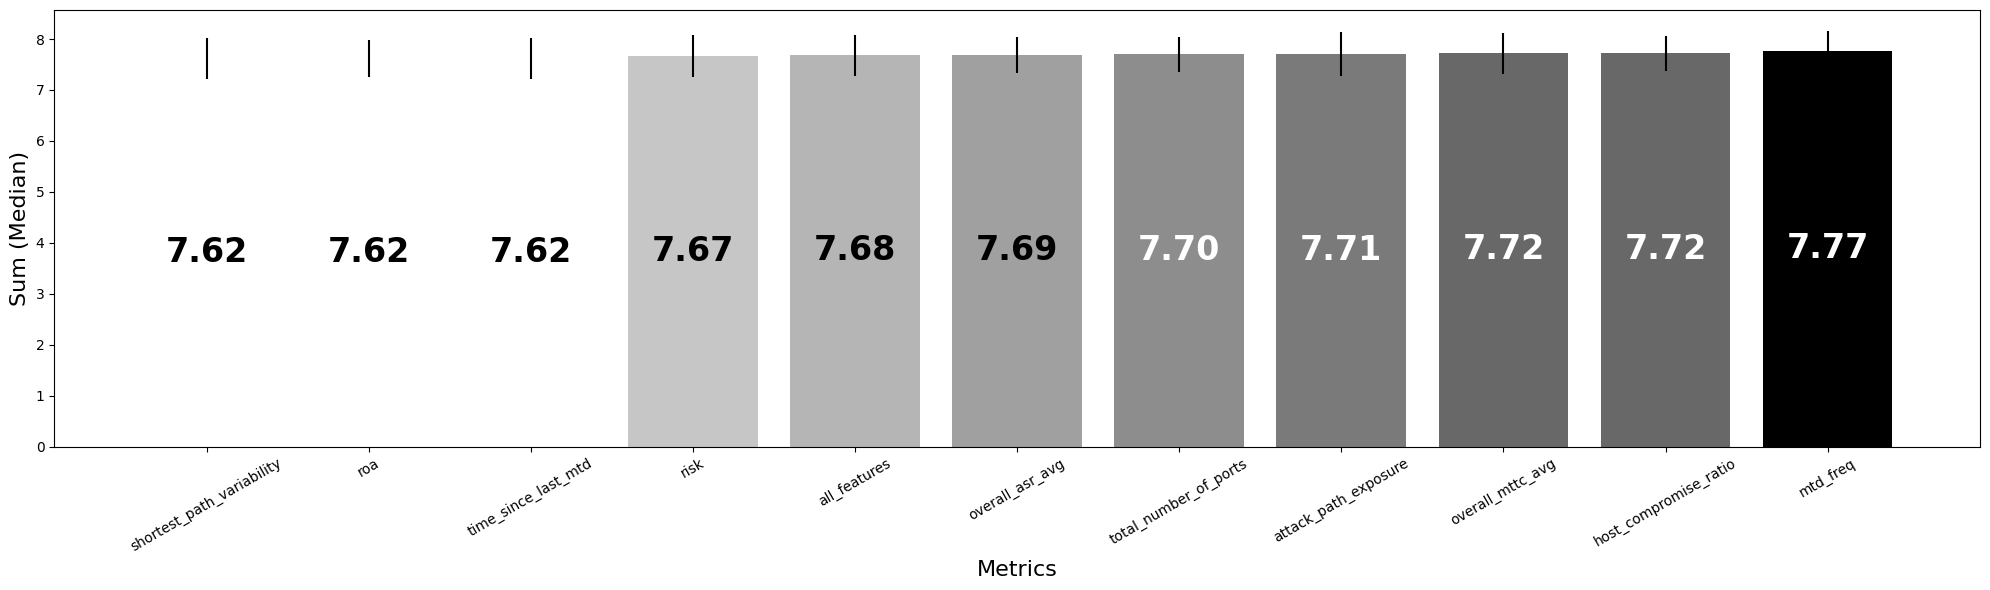

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data_copy' is a DataFrame containing metric data, and 'std_devs_df' contains standard deviations.

# Extract metric data and sort by 'sum'
metric_data = data_copy.T['sum'].sort_values()
metric_data = np.round(metric_data, 2)
# Normalize the data for grayscale shading
norm = plt.Normalize(vmin=metric_data.min(), vmax=metric_data.max())
cmap = plt.get_cmap("Greys")  # Use the Greys colormap for black shades

# Create a new figure
plt.figure(figsize=(20, 6))  # Adjust the size as needed

# Generate colors based on the grayscale colormap
bar_colors = cmap(norm(metric_data.values))

# Create a seaborn barplot with grayscale shades
ax = sns.barplot(x=metric_data.index, y=metric_data.values, palette=bar_colors)

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Add numerical values in the center of the bars
for i, value in enumerate(metric_data.values):
    # Set text color: dark bars get white text, light bars get black text
    text_color = 'white' if norm(value) > 0.5 else 'black'
    ax.text(i, value / 2, f'{value:.2f}', ha='center', va='center', color=text_color, fontsize=24, weight='bold')

# Add error bars using standard deviations
yerr = std_devs_df.T['sum'][:len(metric_data)]  # Ensure the yerr length matches metric_data
ax.errorbar(metric_data.index, metric_data.values, yerr=yerr, fmt='none', color='black')

# Set title and labels
plt.xlabel('Metrics', fontsize=16)
plt.ylabel(f'Sum (Median)', fontsize=16)

# Show the plot for the current metric
plt.tight_layout()
plt.savefig("Overview.png")
plt.show()


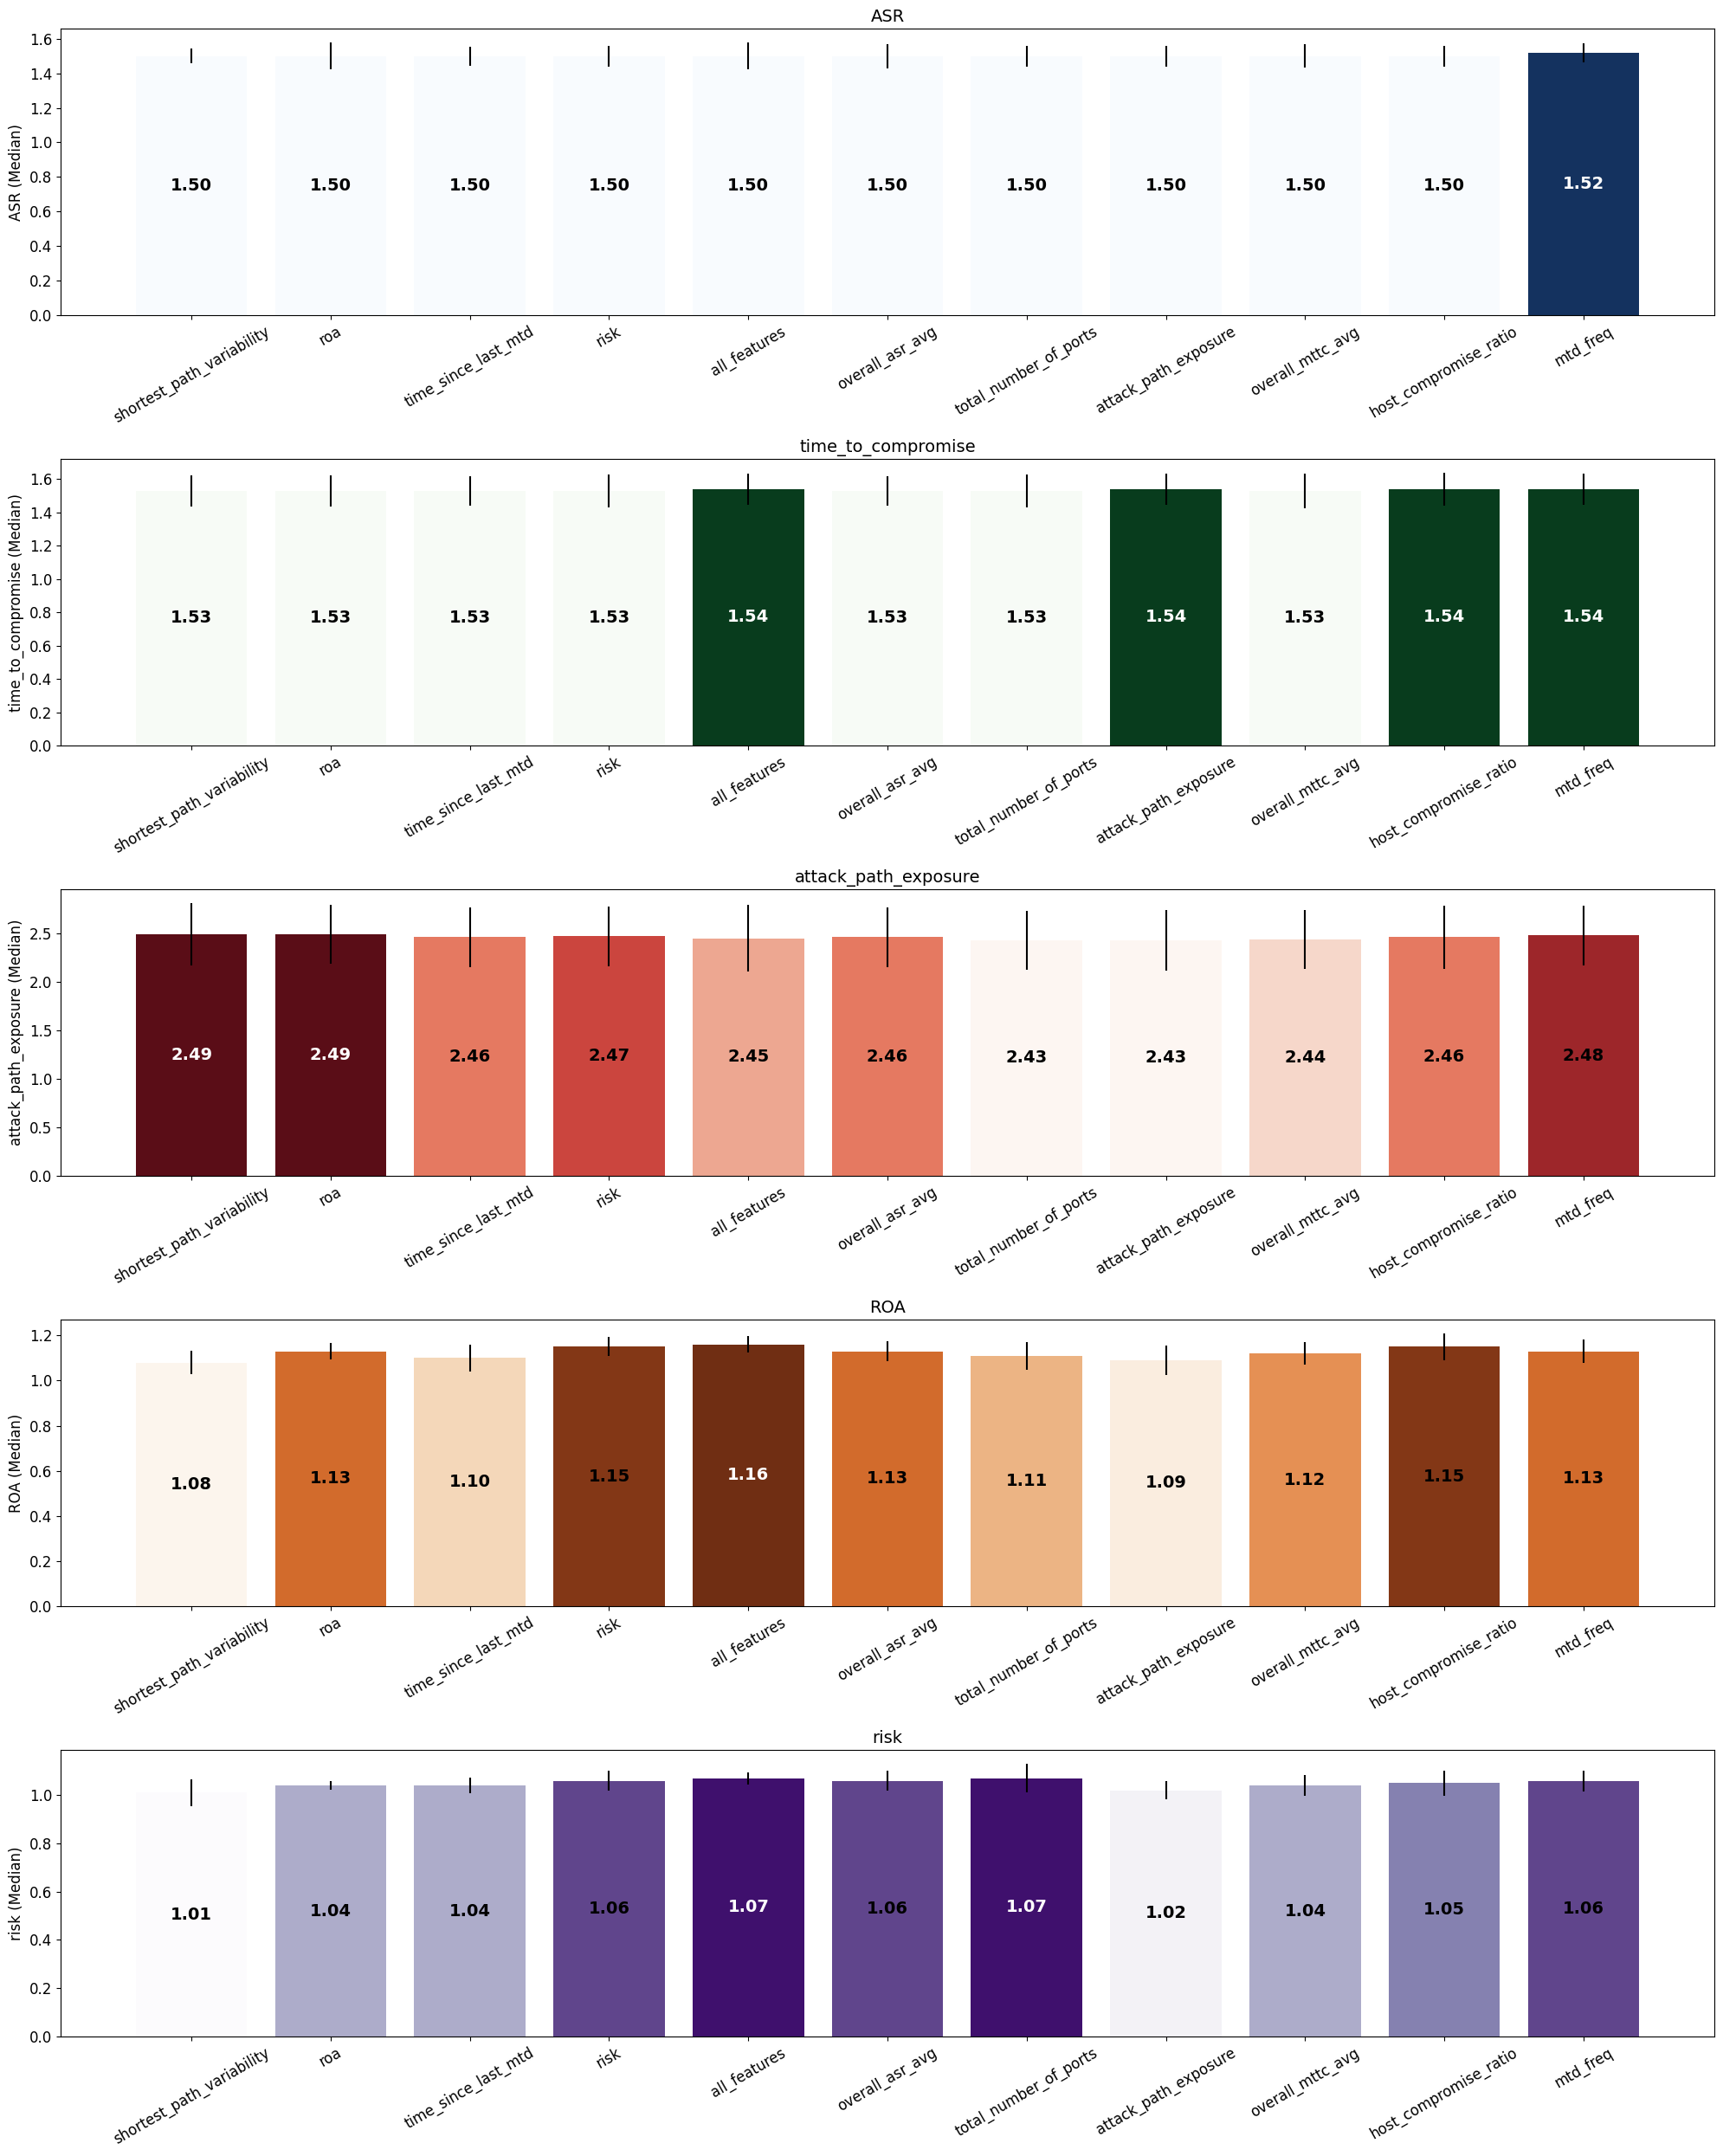

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define a different colormap for each evaluation metric
colormap_dict = {
    "ASR": "Blues",
    "time_to_compromise": "Greens",
    "attack_path_exposure": "Reds",
    "ROA": "Oranges",
    "risk": "Purples"
}

evaluation_metrics = ["ASR", "time_to_compromise", "attack_path_exposure", "ROA", "risk"]

# Create a figure with subplots
fig, axes = plt.subplots(len(evaluation_metrics), 1, figsize=(20, 25), sharex=False)  # No shared x-axis

for ax, evaluation_metric in zip(axes, evaluation_metrics):
    # Extract metric data for the current evaluation metric
    metric_data = data_copy.T[evaluation_metric]
    metric_data = np.round(metric_data, 2)
    # Normalize the data for shading using the specific range for the current metric set
    lower_percentile = np.percentile(metric_data.values, 5)
    upper_percentile = np.percentile(metric_data.values, 95)
    norm = plt.Normalize(vmin=lower_percentile, vmax=upper_percentile)  # Normalization for current metric set

    # Select the colormap for the current metric
    cmap = plt.get_cmap(colormap_dict[evaluation_metric])

    # Create a seaborn barplot with shades based on the individual metric values
    bar_colors = cmap(norm(metric_data.values))
    sns.barplot(x=metric_data.index, y=metric_data.values, palette=bar_colors, ax=ax)

    # Add numerical values in the center of the bars
    for i, value in enumerate(metric_data.values):
        # Set text color: dark bars get white text, light bars get black text
        text_color = 'white' if norm(value) > 0.95 else 'black'
        ax.text(i, value / 2, f'{value:.2f}', ha='center', va='center', color=text_color, fontsize=14, weight='bold')

    # Add error bars using standard deviations
    yerr = std_devs_df.T[evaluation_metric][:len(metric_data)]  # Ensure yerr length matches metric_data
    ax.errorbar(metric_data.index, metric_data.values, yerr=yerr, fmt='none', color='black')

    # Set title and labels for each subplot
    ax.set_title(f'{evaluation_metric}', fontsize=14)
    ax.set_ylabel(f'{evaluation_metric} (Median)', fontsize=12)

# Set common x-ticks for all subplots and increase tick font size
for ax in axes:
    ax.tick_params(axis='x', rotation=30, labelsize=12)  # Set labelsize to your desired font size
    ax.tick_params(axis='y', labelsize=12)  # Optionally increase y-axis tick size as well

# Adjust layout
plt.tight_layout()
plt.savefig("All_Metrics_Overview.png")
plt.show()


In [89]:
other_schemes

random  alternative  simultaneous
ASR                   1.472222     1.458333      2.708333
time_to_compromise    1.460395     1.454281      1.736429
attack_path_exposure  0.934826     0.933711      0.936514
ROA                   0.969766     0.880455      0.994225
risk                  0.943190     0.956910      1.061994

In [90]:
trimmed_data = data_copy.T.drop(['sum', 'zscore', 'minmax'], axis=1).T


In [91]:
comparison_data = pd.concat([trimmed_data, other_schemes], axis=1)


In [92]:
comparison_data

shortest_path_variability       roa  \
ASR                                    1.500000  1.500000   
time_to_compromise                     1.533368  1.530499   
attack_path_exposure                   2.491621  2.494779   
ROA                                    1.078448  1.133929   
risk                                   1.014949  1.040997   

                      time_since_last_mtd      risk  all_features  \
ASR                              1.500000  1.500000      1.500000   
time_to_compromise               1.530234  1.526909      1.536778   
attack_path_exposure             2.460476  2.467158      2.448235   
ROA                              1.103751  1.148476      1.159555   
risk                             1.043271  1.055540      1.072817   

                      overall_asr_avg  total_number_of_ports  \
ASR                          1.500000               1.500000   
time_to_compromise           1.529911               1.529136   
attack_path_exposure         2.456382               2.428102   
ROA                          1.132470               1.105656   
risk                         1.060955               1.070484   

                      attack_path_exposure  overall_mttc_avg  \
ASR                               1.500000          1.500000   
time_to_compromise                1.538282          1.526821   
attack_path_exposure              2.428102          2.440142   
ROA                               1.092327          1.121795   
risk                              1.024170          1.040615   

                      host_compromise_ratio  mtd_freq    random  alternative  \
ASR                                1.500000  1.524298  1.472222     1.458333   
time_to_compromise                 1.535351  1.543244  1.460395     1.454281   
attack_path_exposure               2.460476  2.481152  0.934826     0.933711   
ROA                                1.150830  1.128444  0.969766     0.880455   
risk                               1.046188  1.062859  0.943190     0.956910   

                      simultaneous  
ASR                       2.708333  
time_to_compromise        1.736429  
attack_path_exposure      0.936514  
ROA                       0.994225  
risk                      1.061994

In [93]:
data

all_features  all_features_CompleteTopologyShuffle  \
ASR                       1.500000                              1.472222   
time_to_compromise        1.536778                              1.475282   
attack_path_exposure      2.448235                              2.206705   
ROA                       1.159555                              1.048409   
risk                      1.034602                              0.991688   
sum                       7.679169                              7.194306   
zscore                    0.088562                             -1.288548   
minmax                    0.500258                              0.065981   

                      all_features_IPShuffle  all_features_OSDiversity  \
ASR                                 1.583333                  1.500000   
time_to_compromise                  1.496946                  1.702592   
attack_path_exposure                1.904885                  2.693952   
ROA                                 1.168224                  1.126862   
risk                                1.133469                  1.072817   
sum                                 7.286857                  8.096223   
zscore                             -1.025684                  1.273080   
minmax                              0.148876                  0.873800   

                      all_features_ServiceDiversity  host_compromise_ratio  \
ASR                                        1.500000               1.527778   
time_to_compromise                         1.629319               1.535351   
attack_path_exposure                       2.615209               2.460476   
ROA                                        1.176116               1.156150   
risk                                       1.090969               1.041980   
sum                                        8.011613               7.721734   
zscore                                     1.032770               0.209456   
minmax                                     0.798017               0.538382   

                      host_compromise_ratio_CompleteTopologyShuffle  \
ASR                                                        1.472222   
time_to_compromise                                         1.473507   
attack_path_exposure                                       2.211664   
ROA                                                        1.078217   
risk                                                       1.046188   
sum                                                        7.281797   
zscore                                                    -1.040056   
minmax                                                     0.144344   

                      host_compromise_ratio_IPShuffle  \
ASR                                          1.666667   
time_to_compromise                           1.514567   
attack_path_exposure                         1.916010   
ROA                                          1.150830   
risk                                         1.040440   
sum                                          7.288514   
zscore                                      -1.020980   
minmax                                       0.150360   

                      host_compromise_ratio_OSDiversity  \
ASR                                            1.500000   
time_to_compromise                             1.704895   
attack_path_exposure                           2.659974   
ROA                                            1.167001   
risk                                           1.081417   
sum                                            8.113288   
zscore                                         1.321548   
minmax                                         0.889084   

                      host_compromise_ratio_ServiceDiversity  ...  \
ASR                                                 1.500000  ...   
time_to_compromise                                  1.625636  ...   
attack_path_exposure                                2.589975  ...   
ROA  

In [94]:
combined_data

all_features  all_features_CompleteTopologyShuffle  \
ASR                       1.500000                              1.472222   
time_to_compromise        1.536778                              1.475282   
attack_path_exposure      2.448235                              2.206705   
ROA                       1.159555                              1.048409   
risk                      1.034602                              0.991688   

                      all_features_IPShuffle  all_features_OSDiversity  \
ASR                                 1.583333                  1.500000   
time_to_compromise                  1.496946                  1.702592   
attack_path_exposure                1.904885                  2.693952   
ROA                                 1.168224                  1.126862   
risk                                1.133469                  1.072817   

                      all_features_ServiceDiversity  host_compromise_ratio  \
ASR                                        1.500000               1.527778   
time_to_compromise                         1.629319               1.535351   
attack_path_exposure                       2.615209               2.460476   
ROA                                        1.176116               1.156150   
risk                                       1.090969               1.041980   

                      host_compromise_ratio_CompleteTopologyShuffle  \
ASR                                                        1.472222   
time_to_compromise                                         1.473507   
attack_path_exposure                                       2.211664   
ROA                                                        1.078217   
risk                                                       1.046188   

                      host_compromise_ratio_IPShuffle  \
ASR                                          1.666667   
time_to_compromise                           1.514567   
attack_path_exposure                         1.916010   
ROA                                          1.150830   
risk                                         1.040440   

                      host_compromise_ratio_OSDiversity  \
ASR                                            1.500000   
time_to_compromise                             1.704895   
attack_path_exposure                           2.659974   
ROA                                            1.167001   
risk                                           1.081417   

                      host_compromise_ratio_ServiceDiversity  ...  \
ASR                                                 1.500000  ...   
time_to_compromise                                  1.625636  ...   
attack_path_exposure                                2.589975  ...   
ROA                                                 1.122988  ...   
risk                                                1.046215  ...   

                      overall_mttc_avg_OSDiversity  \
ASR                                       1.527778   
time_to_compromise                        1.724911   
attack_path_exposure                      2.689045   
ROA                                       1.121795   
risk                                      1.040615   

                      overall_mttc_avg_ServiceDiversity  time_since_last_mtd  \
ASR                                            1.500000             1.500000   
time_to_compromise                             1.622033             1.530234   
attack_path_exposure                           2.592249             2.460476   
ROA                                            1.064459             1.089260   
risk                                           1.010882             1.043271   

                      time_since_last_mtd_CompleteTopologyShuffle  \
ASR                                                      1.472222   
time_to_compromise                                       1.467154   
attack_path_exposure                                     2.211664   
ROA                          

Standard deviation for each metric:
ASR                     0.287227
time_to_compromise      0.095600
attack_path_exposure    0.614799
ROA                     0.088789
risk                    0.045822
dtype: float64

Overall 'sum' standard deviation: 0.71



<Figure size 1600x1200 with 0 Axes>

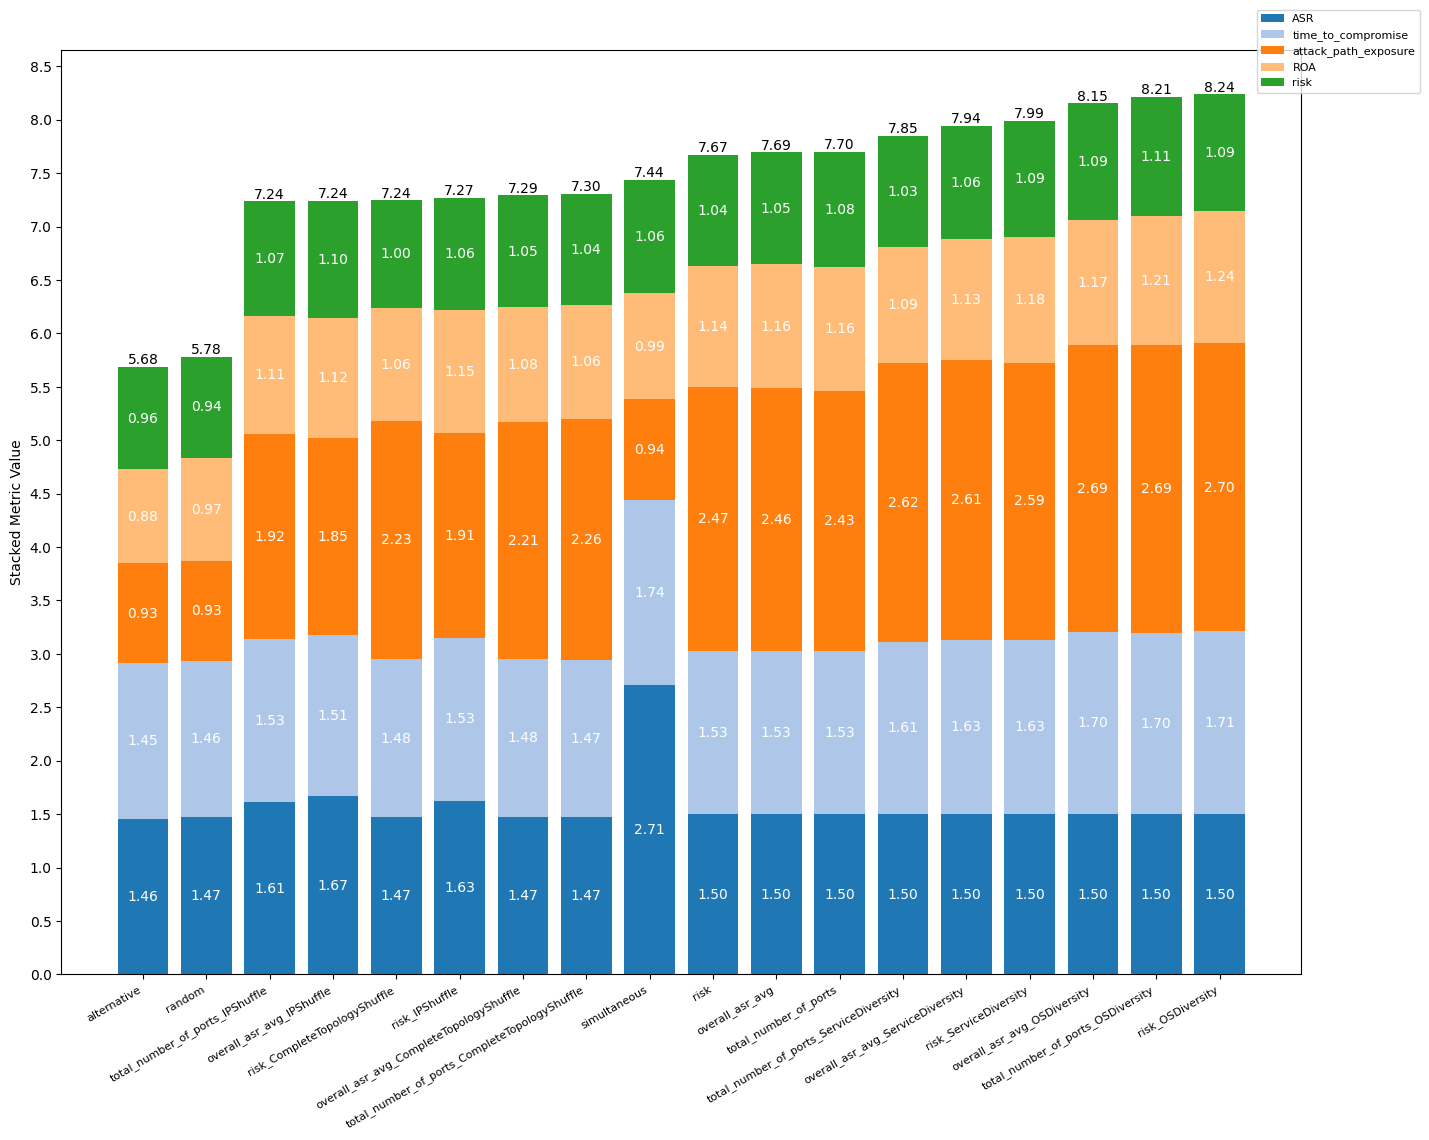

In [95]:
best_models = ['risk', "overall_asr_avg","total_number_of_ports", "random", "alternative", "simultaneous"]


# Ensure data_copy is defined before the loop
data_copy = comparison_data

# Create a regex pattern that combines all best model names
pattern = '|'.join(best_models)  # This creates a pattern like 'mtd_freq|host_compromise_ratio'


# Filter the DataFrame for columns that match any of the best models
metric_data = combined_data.filter(regex=pattern)

# Process the weighted metrics for the current metric
chart.process_weighted_metrics(metric_data)

# Create a new figure for each metric
plt.figure(figsize=(16, 12))  # Adjust the size as needed

# Plot the schemes for the current metric with a relevant title
chart.plot_n_schemes(name="Scheme_comparisons", title = None, number_font_size=10)




In [96]:
def group_columns_by_mtd(df):
    mtd_strategies = ['CompleteTopologyShuffle', 'IPShuffle', 'OSDiversity', 'ServiceDiversity']
    
    # Initialize empty groups
    groups = {
        'All MTD': [],
        'CompleteTopologyShuffle': [],
        'IPShuffle': [],
        'OSDiversity': [],
        'ServiceDiversity': []
    }

    # Iterate through each column name in the DataFrame
    for col in df.columns:
        # Check if the column contains any MTD strategy
        if any(mtd in col for mtd in mtd_strategies):
            # Group by the specific MTD strategy found in the column
            for mtd in mtd_strategies:
                if mtd in col:
                    groups[mtd].append(col)
                    break
        else:
            # If no MTD strategy is found in the column, it belongs to 'All MTD'
            groups['All MTD'].append(col)

    return groups
groups = group_columns_by_mtd(data)

In [97]:
groups

{'All MTD': ['all_features',
  'host_compromise_ratio',
  'total_number_of_ports',
  'attack_path_exposure',
  'overall_asr_avg',
  'roa',
  'shortest_path_variability',
  'risk',
  'mtd_freq',
  'overall_mttc_avg',
  'time_since_last_mtd'],
 'CompleteTopologyShuffle': ['all_features_CompleteTopologyShuffle',
  'host_compromise_ratio_CompleteTopologyShuffle',
  'total_number_of_ports_CompleteTopologyShuffle',
  'attack_path_exposure_CompleteTopologyShuffle',
  'overall_asr_avg_CompleteTopologyShuffle',
  'roa_CompleteTopologyShuffle',
  'shortest_path_variability_CompleteTopologyShuffle',
  'risk_CompleteTopologyShuffle',
  'mtd_freq_CompleteTopologyShuffle',
  'overall_mttc_avg_CompleteTopologyShuffle',
  'time_since_last_mtd_CompleteTopologyShuffle'],
 'IPShuffle': ['all_features_IPShuffle',
  'host_compromise_ratio_IPShuffle',
  'total_number_of_ports_IPShuffle',
  'attack_path_exposure_IPShuffle',
  'overall_asr_avg_IPShuffle',
  'roa_IPShuffle',
  'shortest_path_variability_IPShuf

In [98]:
all_features_metrics = ['all_features']
single_metrics = ['time_since_last_mtd', 'overall_mttc_avg', 'mtd_freq',  'total_number_of_ports', 'host_compromise_ratio', 
    'attack_path_exposure', 'roa',
     'risk', 'shortest_path_variability', 'overall_asr_avg', ]


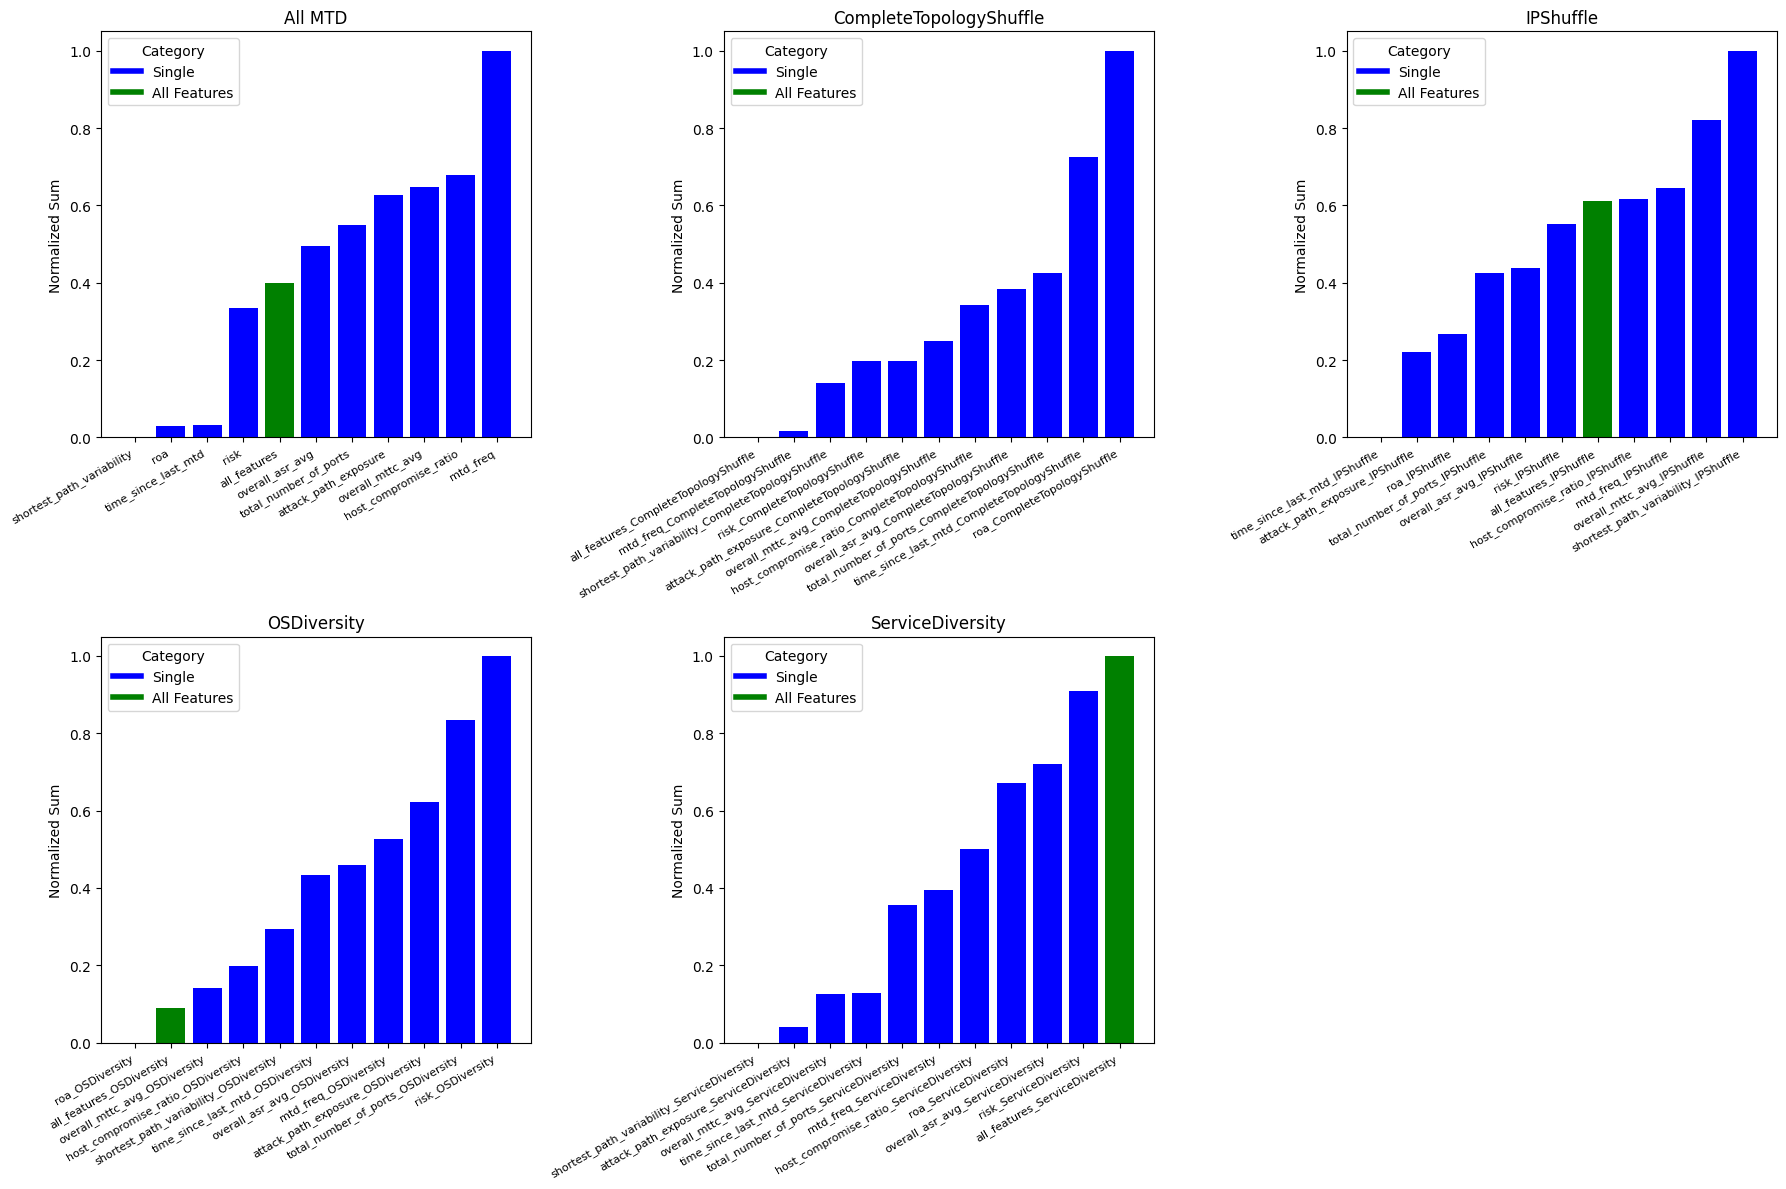

In [99]:
import matplotlib.pyplot as plt

def plot_metrics_by_category(data, groups, all_features_metrics, single_metrics):
    """
    Plot metrics with color coding based on their category (All Features or Single) using subplots.

    Parameters:
    - data (dict): Dictionary with metric data.
    - groups (dict): Dictionary where keys are MTD names and values are lists of metrics.
    - all_features_metrics (list): List of metrics considered as All Features.
    - single_metrics (list): List of metrics considered as Single.
    """
    # Create a color mapping
    colors = {'Single': 'blue', 'All Features': 'green'}

    # Create legend handles
    handles = [plt.Line2D([0], [0], color=colors['Single'], lw=4),
               plt.Line2D([0], [0], color=colors['All Features'], lw=4)]
    labels = ['Single', 'All Features']

    # Create subplots (2 rows, 3 columns)
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

    # Flatten the axes for easier indexing
    axs = axs.flatten()

    for i, mtd in enumerate(groups):
        if i >= 5:  # Limit to 5 subplots (3 on the first row, 2 on the second)
            break
        
        # Extract and sort the data
        df = data[groups[mtd]].T
        
        sorted_columns = df.sort_values(by='sum', axis=0).index
        sorted_data = data[sorted_columns].loc['sum']

        min_sum = sorted_data.min()
        max_sum = sorted_data.max()
        sorted_data = (sorted_data - min_sum) / (max_sum - min_sum)

        # Plot on the respective subplot
        ax = axs[i]  # Access the correct subplot

        # Plot bars with colors based on category
        for metric in sorted_data.index:
            # Determine category based on metric name
            if any(single_metric in metric for single_metric in single_metrics):
                category = 'Single'
            else:  # Everything else falls under 'All Features'
                category = 'All Features'

            ax.bar(metric, sorted_data[metric], color=colors[category])

        # Add labels and title to each subplot
        ax.set_ylabel('Normalized Sum')
        ax.set_title(f'{mtd}')
        ax.set_xticklabels(sorted_data.index, rotation=30, ha='right', fontsize=8)
        ax.legend(handles=handles, labels=labels, title='Category')

    # Remove the last empty subplot
    fig.delaxes(axs[5])  # Remove the last axis (empty graph)

    # Adjust the layout for centering the last two graphs
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig('single_versus_all_features.png')
    plt.show()

# Example usage:
# Assuming `data` and `groups` are defined, and the metric lists are provided
plot_metrics_by_category(data, groups, all_features_metrics, single_metrics)


In [100]:
all_features_metrics = ['all_features']
regular_metrics = [   'total_number_of_ports', 'host_compromise_ratio', 
    'attack_path_exposure', 'roa',
     'risk', 'shortest_path_variability', 'overall_asr_avg', ]
time_metrics = ['time_since_last_mtd', 'mtd_freq', 'overall_mttc_avg' ]

Index(['shortest_path_variability', 'roa', 'time_since_last_mtd', 'risk',
       'all_features', 'overall_asr_avg', 'total_number_of_ports',
       'attack_path_exposure', 'overall_mttc_avg', 'host_compromise_ratio',
       'mtd_freq'],
      dtype='object')
Index(['all_features_CompleteTopologyShuffle',
       'mtd_freq_CompleteTopologyShuffle',
       'shortest_path_variability_CompleteTopologyShuffle',
       'risk_CompleteTopologyShuffle',
       'attack_path_exposure_CompleteTopologyShuffle',
       'overall_mttc_avg_CompleteTopologyShuffle',
       'host_compromise_ratio_CompleteTopologyShuffle',
       'overall_asr_avg_CompleteTopologyShuffle',
       'total_number_of_ports_CompleteTopologyShuffle',
       'time_since_last_mtd_CompleteTopologyShuffle',
       'roa_CompleteTopologyShuffle'],
      dtype='object')
Index(['time_since_last_mtd_IPShuffle', 'attack_path_exposure_IPShuffle',
       'roa_IPShuffle', 'total_number_of_ports_IPShuffle',
       'overall_asr_avg_IPShuffle', 

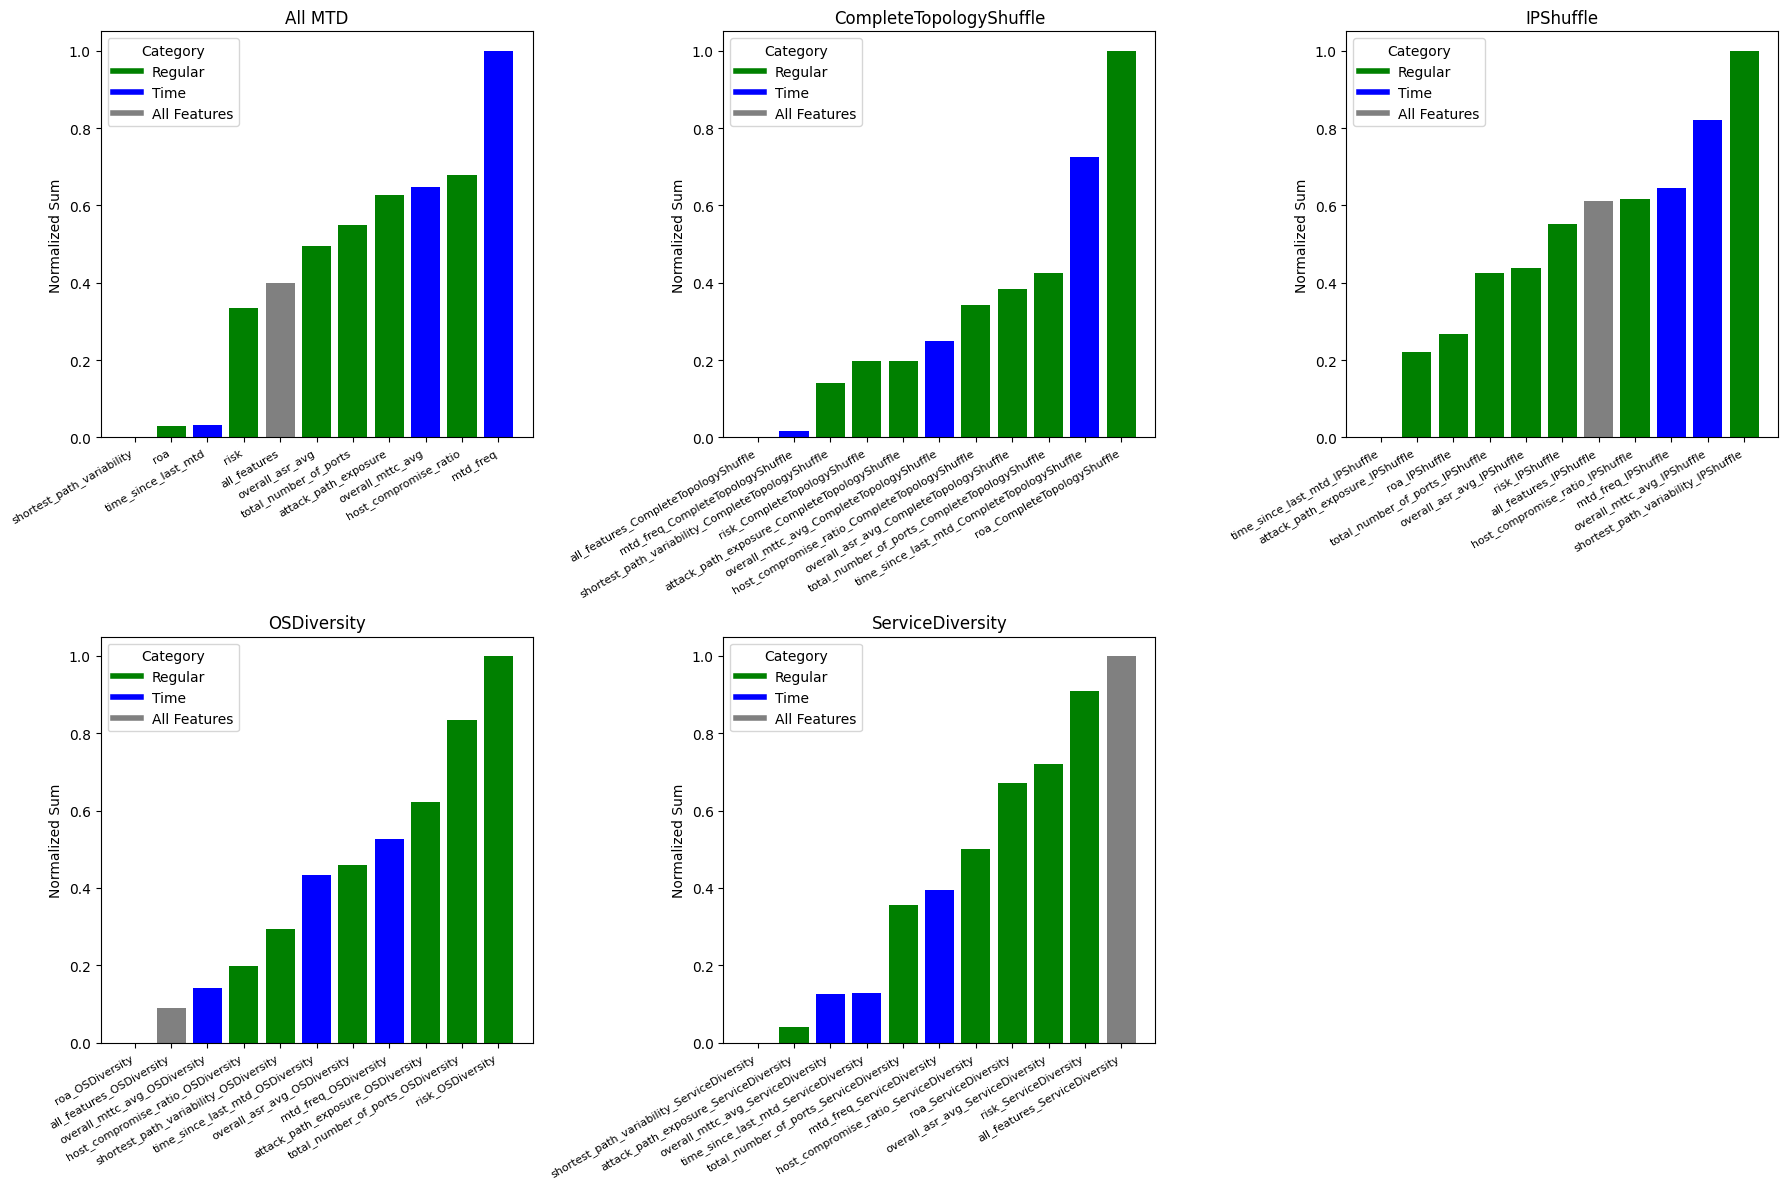

In [101]:
import matplotlib.pyplot as plt

def plot_metrics_by_category_extended(data, groups, all_features_metrics, regular_metrics, time_metrics):
    """
    Plot metrics with color coding based on their category (All Features, Regular, or Time) using subplots.

    Parameters:
    - data (dict): Dictionary with metric data.
    - groups (dict): Dictionary where keys are MTD names and values are lists of metrics.
    - all_features_metrics (list): List of metrics considered as All Features.
    - regular_metrics (list): List of metrics considered as Regular.
    - time_metrics (list): List of metrics considered as Time.
    """
    # Create a color mapping
    colors = {
        'Regular': 'green',
        'Time': 'blue',
        'All Features': 'grey'
    }

    # Create legend handles
    handles = [
        plt.Line2D([0], [0], color=colors['Regular'], lw=4),
        plt.Line2D([0], [0], color=colors['Time'], lw=4),
        plt.Line2D([0], [0], color=colors['All Features'], lw=4)
    ]
    labels = ['Regular', 'Time', 'All Features']

    # Create subplots (2 rows, 3 columns)
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

    # Flatten the axes for easier indexing
    axs = axs.flatten()

    for i, mtd in enumerate(groups):
        if i >= 5:  # Limit to 5 subplots (3 on the first row, 2 on the second)
            break
        
        # Extract and sort the data
        df = data[groups[mtd]].T
        
        sorted_columns = df.sort_values(by='sum', axis=0).index
        sorted_data = data[sorted_columns].loc['sum']

        min_sum = sorted_data.min()
        max_sum = sorted_data.max()
        sorted_data = (sorted_data - min_sum) / (max_sum - min_sum)

        # Plot on the respective subplot
        ax = axs[i]  # Access the correct subplot
        print(sorted_data.index)
        # Plot bars with colors based on category
        for metric in sorted_data.index:
            # Determine category based on metric name using substring checks
            if any(regular_metric in metric for regular_metric in regular_metrics):
                category = 'Regular'
            elif any(time_metric in metric for time_metric in time_metrics):
                category = 'Time'

            else:  # Everything else falls under 'All Features'
                category = 'All Features'


            ax.bar(metric, sorted_data[metric], color=colors[category])

        # Add labels and title to each subplot
        ax.set_ylabel('Normalized Sum')
        ax.set_title(f'{mtd}')
        ax.set_xticks(range(len(sorted_data.index)))  # Set x-ticks to match number of metrics
        ax.set_xticklabels(sorted_data.index, rotation=30, ha='right', fontsize=8)

        # Add the legend to each subplot after plotting
        ax.legend(handles=handles, labels=labels, title='Category')

    # Remove the last empty subplot if there are less than 6 plots
    if len(groups) < 6:
        fig.delaxes(axs[5])  # Remove the last axis (empty graph)

    # Adjust layout and save the figure
    plt.tight_layout()
    plt.savefig('regular_vs_time_metrics.png')
    plt.show()

# Example usage:
# Assuming `data`, `groups`, `all_features_metrics`, `regular_metrics`, and `time_metrics` are defined
plot_metrics_by_category_extended(data, groups, all_features_metrics, regular_metrics, time_metrics)
